In [2]:
import numpy as np
import json

#  Data preprocessing

In [3]:
with open("15.01/data", 'r', encoding = "cp1250") as file: #file 15.01 format cp1250 next in utf-8
    content = file.readlines()

In [4]:
with open("15.01/initData.json", 'r', encoding = "cp1250") as file: #file 15.01 encoding is equal cp1250 next in utf-8
    initContent = file.read()

In [5]:
content[0]

"{'data': {'id': 25, 'name': 'załączniki w sprawach cudzoziemców', 'operations': [{'id': '23', 'name': 'załączniki', 'enabled': True}, {'id': '85', 'name': 'załączniki ru', 'enabled': True}, {'id': '98', 'name': 'załączniki en', 'enabled': True}], 'ticket_count': 1, 'tickets_served': 0, 'workplaces': 0, 'average_wait_time': 5, 'average_service_time': None, 'registered_tickets': 1, 'max_tickets': 175, 'ticket_value': '', 'active': True, 'location': 'Wrocław', 'tickets_left': 174, 'enabled': True}, 'time': '2019-01-15 09:00:23'}\n"

In [6]:
import re

def repair(content):
    replaced = re.sub('"', '\\"', content)
    replaced = re.sub('\'', '"', replaced)
    replaced = re.sub('True', 'true', replaced)
    replaced = re.sub('False', 'false', replaced)
    replaced = re.sub('None', 'null', replaced)
    return replaced 

In [7]:
replaced = repair(initContent)

In [8]:
initJson = json.loads(replaced)

In [11]:
for i in range(len(content)):
    content[i] = json.loads(repair(content[i]))

In [9]:
cityNames = ['Wrocław', 'Jelenia Góra', 'Legnica', 'Wałbrzych']

lasts = {}

In [10]:
for city in initJson["result"].keys():
    lasts[city] = []

    for item in initJson["result"][city]:
        lasts[city].append((item["tickets_served"], item["registered_tickets"]))


In [12]:
l = [] #elem = [data; start; end; ] 
i = 0
kl = 0
ob = 0
lastVal = (0,0)

for item in content:
    if item["data"]["id"] == 14:
        print(item["time"], end=' ')
        
        if lastVal[1] != item["data"]["registered_tickets"]: #new client
            print("Nowy klient", -lastVal[1] + item["data"]["registered_tickets"])
            for j in range(-lastVal[1] + item["data"]["registered_tickets"]):
                l.append([item["data"], item["time"]]) #add [data start]
        if lastVal[0] != item["data"]["tickets_served"]: #new service
            print("Nowe obsłużenie!", -lastVal[0] + item["data"]["tickets_served"])
            for j in range(-lastVal[0] + item["data"]["tickets_served"]):
                l[i].append(item["time"]) # add [end]
                i = i + 1
                
        lastVal = (item["data"]["tickets_served"], item["data"]["registered_tickets"])
        

2019-01-15 09:10:16 Nowy klient 2
2019-01-15 09:12:18 Nowy klient 1
2019-01-15 09:17:36 Nowy klient 2
2019-01-15 09:18:36 Nowy klient 7
2019-01-15 09:19:37 Nowy klient 6
2019-01-15 09:21:04 Nowy klient 4
2019-01-15 09:21:49 Nowy klient 11
2019-01-15 09:22:50 Nowy klient 10
2019-01-15 09:23:51 Nowy klient 10
2019-01-15 09:24:51 Nowy klient 6
Nowe obsłużenie! 1
2019-01-15 09:25:52 Nowy klient 2
2019-01-15 09:26:53 Nowy klient 1
Nowe obsłużenie! 1
2019-01-15 09:29:10 Nowy klient 1
2019-01-15 09:30:10 Nowy klient 3
2019-01-15 09:32:05 Nowy klient 1
2019-01-15 09:33:06 Nowy klient 1
2019-01-15 09:34:08 Nowy klient 1
Nowe obsłużenie! 1
2019-01-15 09:36:26 Nowy klient 1
Nowe obsłużenie! 1
2019-01-15 09:37:26 Nowy klient 3
Nowe obsłużenie! 1
2019-01-15 09:38:27 Nowe obsłużenie! 2
2019-01-15 09:39:28 Nowe obsłużenie! 1
2019-01-15 09:41:30 Nowy klient 2
2019-01-15 09:42:30 Nowy klient 1
2019-01-15 09:43:32 Nowy klient 1
Nowe obsłużenie! 1
2019-01-15 09:44:48 Nowe obsłużenie! 1
2019-01-15 09:45:4

In [13]:
data = []
label = []
plotX = []
from datetime import datetime

In [15]:
for item in l:
    datetime_start = datetime.strptime(item[1], '%Y-%m-%d %H:%M:%S')
    datetime_end = datetime.strptime(item[2], '%Y-%m-%d %H:%M:%S')
    
    row = []
    
    row.append(datetime_start.year)
    row.append(datetime_start.month)
    row.append(datetime_start.day)
    row.append(datetime_start.hour)
    row.append(datetime_start.minute)
    row.append(datetime_start.second)
   
    row.append(item[0]["ticket_count"])
    row.append(item[0]["tickets_served"])
    row.append(item[0]["average_wait_time"])
    if item[0]["average_service_time"] is None or item[0]["average_service_time"] == 0:
        row.append(-1)
    else:
        row.append(item[0]["average_service_time"])
    row.append(item[0]["max_tickets"])
    row.append(item[0]["registered_tickets"])
    row.append(item[0]["tickets_left"])
    
    
    data.append(row)
    label.append((datetime_end - datetime_start).total_seconds())
    plotX.append((datetime_start-datetime(2019,1,1)).total_seconds())

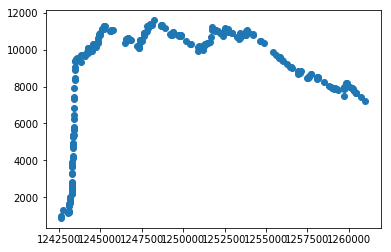

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(plotX, label)
plt.show()

In [17]:
data

[[2019, 1, 15, 9, 10, 16, 2, 0, 55, -1, 275, 2, 273],
 [2019, 1, 15, 9, 10, 16, 2, 0, 55, -1, 275, 2, 273],
 [2019, 1, 15, 9, 12, 18, 2, 0, 123, -1, 275, 3, 272],
 [2019, 1, 15, 9, 17, 36, 4, 0, 123, -1, 275, 5, 270],
 [2019, 1, 15, 9, 17, 36, 4, 0, 123, -1, 275, 5, 270],
 [2019, 1, 15, 9, 18, 36, 11, 0, 58, -1, 275, 12, 263],
 [2019, 1, 15, 9, 18, 36, 11, 0, 58, -1, 275, 12, 263],
 [2019, 1, 15, 9, 18, 36, 11, 0, 58, -1, 275, 12, 263],
 [2019, 1, 15, 9, 18, 36, 11, 0, 58, -1, 275, 12, 263],
 [2019, 1, 15, 9, 18, 36, 11, 0, 58, -1, 275, 12, 263],
 [2019, 1, 15, 9, 18, 36, 11, 0, 58, -1, 275, 12, 263],
 [2019, 1, 15, 9, 18, 36, 11, 0, 58, -1, 275, 12, 263],
 [2019, 1, 15, 9, 19, 37, 17, 0, 100, -1, 275, 18, 257],
 [2019, 1, 15, 9, 19, 37, 17, 0, 100, -1, 275, 18, 257],
 [2019, 1, 15, 9, 19, 37, 17, 0, 100, -1, 275, 18, 257],
 [2019, 1, 15, 9, 19, 37, 17, 0, 100, -1, 275, 18, 257],
 [2019, 1, 15, 9, 19, 37, 17, 0, 100, -1, 275, 18, 257],
 [2019, 1, 15, 9, 19, 37, 17, 0, 100, -1, 275, 18,

# Define model

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential([
    Dense(1, input_shape=(len(data[0]),)),
])

In [23]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [28]:
model.fit(np.asarray(data), np.asarray(label), epochs=10000, batch_size=32)

Epoch 1/10000
255/255 [==============================] - 0s 51us/step - loss: 4049840.8431 - mean_squared_error: 4049840.8431
Epoch 2/10000
255/255 [==============================] - 0s 63us/step - loss: 4046910.7422 - mean_squared_error: 4046910.7422
Epoch 3/10000
255/255 [==============================] - 0s 71us/step - loss: 4043829.5725 - mean_squared_error: 4043829.5725
Epoch 4/10000
255/255 [==============================] - 0s 71us/step - loss: 4040887.8647 - mean_squared_error: 4040887.8647
Epoch 5/10000
255/255 [==============================] - 0s 102us/step - loss: 4037776.7882 - mean_squared_error: 4037776.7882
Epoch 6/10000
255/255 [==============================] - 0s 125us/step - loss: 4034805.8725 - mean_squared_error: 4034805.8725
Epoch 7/10000
255/255 [==============================] - 0s 145us/step - loss: 4031758.9510 - mean_squared_error: 4031758.9510
Epoch 8/10000
255/255 [==============================] - 0s 204us/step - loss: 4028813.6725 - mean_squared_error: 4

255/255 [==============================] - 0s 137us/step - loss: 3868853.8804 - mean_squared_error: 3868853.8804
Epoch 64/10000
255/255 [==============================] - 0s 118us/step - loss: 3867304.8451 - mean_squared_error: 3867304.8451
Epoch 65/10000
255/255 [==============================] - 0s 71us/step - loss: 3863117.8500 - mean_squared_error: 3863117.8500
Epoch 66/10000
255/255 [==============================] - 0s 114us/step - loss: 3860384.2637 - mean_squared_error: 3860384.2637
Epoch 67/10000
255/255 [==============================] - 0s 63us/step - loss: 3857375.9235 - mean_squared_error: 3857375.9235
Epoch 68/10000
255/255 [==============================] - 0s 94us/step - loss: 3854600.5941 - mean_squared_error: 3854600.5941
Epoch 69/10000
255/255 [==============================] - 0s 90us/step - loss: 3851806.7363 - mean_squared_error: 3851806.7363
Epoch 70/10000
255/255 [==============================] - 0s 173us/step - loss: 3849319.6549 - mean_squared_error: 3849319.

255/255 [==============================] - 0s 59us/step - loss: 3692073.0363 - mean_squared_error: 3692073.0363
Epoch 128/10000
255/255 [==============================] - 0s 133us/step - loss: 3689430.0814 - mean_squared_error: 3689430.0814
Epoch 129/10000
255/255 [==============================] - 0s 271us/step - loss: 3686707.5882 - mean_squared_error: 3686707.5882
Epoch 130/10000
255/255 [==============================] - 0s 145us/step - loss: 3683842.7471 - mean_squared_error: 3683842.7471
Epoch 131/10000
255/255 [==============================] - 0s 180us/step - loss: 3681325.3873 - mean_squared_error: 3681325.3873
Epoch 132/10000
255/255 [==============================] - 0s 176us/step - loss: 3678899.7637 - mean_squared_error: 3678899.7637
Epoch 133/10000
255/255 [==============================] - 0s 122us/step - loss: 3676224.4412 - mean_squared_error: 3676224.4412
Epoch 134/10000
255/255 [==============================] - 0s 145us/step - loss: 3673307.9029 - mean_squared_error

255/255 [==============================] - 0s 94us/step - loss: 3529541.4588 - mean_squared_error: 3529541.4588
Epoch 191/10000
255/255 [==============================] - 0s 106us/step - loss: 3526555.8941 - mean_squared_error: 3526555.8941
Epoch 192/10000
255/255 [==============================] - 0s 78us/step - loss: 3524281.9392 - mean_squared_error: 3524281.9392
Epoch 193/10000
255/255 [==============================] - 0s 153us/step - loss: 3521446.0667 - mean_squared_error: 3521446.0667
Epoch 194/10000
255/255 [==============================] - 0s 216us/step - loss: 3519493.9020 - mean_squared_error: 3519493.9020
Epoch 195/10000
255/255 [==============================] - 0s 361us/step - loss: 3516567.1088 - mean_squared_error: 3516567.1088
Epoch 196/10000
255/255 [==============================] - 0s 373us/step - loss: 3514396.5539 - mean_squared_error: 3514396.5539
Epoch 197/10000
255/255 [==============================] - 0s 82us/step - loss: 3511830.1882 - mean_squared_error: 

255/255 [==============================] - 0s 71us/step - loss: 3377643.3500 - mean_squared_error: 3377643.3500
Epoch 254/10000
255/255 [==============================] - 0s 149us/step - loss: 3375753.0294 - mean_squared_error: 3375753.0294
Epoch 255/10000
255/255 [==============================] - 0s 71us/step - loss: 3373390.5539 - mean_squared_error: 3373390.5539
Epoch 256/10000
255/255 [==============================] - 0s 184us/step - loss: 3370962.6912 - mean_squared_error: 3370962.6912
Epoch 257/10000
255/255 [==============================] - 0s 231us/step - loss: 3368559.5863 - mean_squared_error: 3368559.5863
Epoch 258/10000
255/255 [==============================] - 0s 173us/step - loss: 3366152.4343 - mean_squared_error: 3366152.4343
Epoch 259/10000
255/255 [==============================] - 0s 271us/step - loss: 3363869.8833 - mean_squared_error: 3363869.8833
Epoch 260/10000
255/255 [==============================] - 0s 306us/step - loss: 3361874.3882 - mean_squared_error:

255/255 [==============================] - 0s 176us/step - loss: 3238334.0235 - mean_squared_error: 3238334.0235
Epoch 317/10000
255/255 [==============================] - 0s 67us/step - loss: 3236089.4637 - mean_squared_error: 3236089.4637
Epoch 318/10000
255/255 [==============================] - 0s 145us/step - loss: 3233793.9873 - mean_squared_error: 3233793.9873
Epoch 319/10000
255/255 [==============================] - 0s 86us/step - loss: 3231619.6961 - mean_squared_error: 3231619.6961
Epoch 320/10000
255/255 [==============================] - 0s 102us/step - loss: 3229653.0304 - mean_squared_error: 3229653.0304
Epoch 321/10000
255/255 [==============================] - 0s 102us/step - loss: 3227808.1422 - mean_squared_error: 3227808.1422
Epoch 322/10000
255/255 [==============================] - 0s 165us/step - loss: 3225388.8765 - mean_squared_error: 3225388.8765
Epoch 323/10000
255/255 [==============================] - 0s 102us/step - loss: 3224333.3402 - mean_squared_error:

255/255 [==============================] - 0s 165us/step - loss: 3111019.2980 - mean_squared_error: 3111019.2980
Epoch 380/10000
255/255 [==============================] - 0s 90us/step - loss: 3108589.3127 - mean_squared_error: 3108589.3127
Epoch 381/10000
255/255 [==============================] - 0s 114us/step - loss: 3106880.8711 - mean_squared_error: 3106880.8711
Epoch 382/10000
255/255 [==============================] - 0s 67us/step - loss: 3105060.9064 - mean_squared_error: 3105060.9064
Epoch 383/10000
255/255 [==============================] - 0s 188us/step - loss: 3103195.5147 - mean_squared_error: 3103195.5147
Epoch 384/10000
255/255 [==============================] - 0s 110us/step - loss: 3100943.7049 - mean_squared_error: 3100943.7049
Epoch 385/10000
255/255 [==============================] - 0s 86us/step - loss: 3099144.9902 - mean_squared_error: 3099144.9902
Epoch 386/10000
255/255 [==============================] - 0s 161us/step - loss: 3097269.5402 - mean_squared_error: 

255/255 [==============================] - 0s 94us/step - loss: 2995448.3127 - mean_squared_error: 2995448.3127
Epoch 443/10000
255/255 [==============================] - 0s 86us/step - loss: 2993390.9765 - mean_squared_error: 2993390.9765
Epoch 444/10000
255/255 [==============================] - 0s 55us/step - loss: 2991686.5284 - mean_squared_error: 2991686.5284
Epoch 445/10000
255/255 [==============================] - 0s 47us/step - loss: 2989824.8402 - mean_squared_error: 2989824.8402
Epoch 446/10000
255/255 [==============================] - 0s 137us/step - loss: 2988125.6922 - mean_squared_error: 2988125.6922
Epoch 447/10000
255/255 [==============================] - 0s 141us/step - loss: 2986470.6382 - mean_squared_error: 2986470.6382
Epoch 448/10000
255/255 [==============================] - 0s 122us/step - loss: 2984848.2647 - mean_squared_error: 2984848.2647
Epoch 449/10000
255/255 [==============================] - 0s 231us/step - loss: 2983043.3637 - mean_squared_error: 2

255/255 [==============================] - 0s 94us/step - loss: 2891040.0882 - mean_squared_error: 2891040.0882
Epoch 506/10000
255/255 [==============================] - 0s 149us/step - loss: 2889514.6088 - mean_squared_error: 2889514.6088
Epoch 507/10000
255/255 [==============================] - 0s 200us/step - loss: 2887797.7750 - mean_squared_error: 2887797.7750
Epoch 508/10000
255/255 [==============================] - 0s 255us/step - loss: 2886570.7745 - mean_squared_error: 2886570.7745
Epoch 509/10000
255/255 [==============================] - 0s 106us/step - loss: 2885070.4049 - mean_squared_error: 2885070.4049
Epoch 510/10000
255/255 [==============================] - 0s 110us/step - loss: 2883290.8419 - mean_squared_error: 2883290.8419
Epoch 511/10000
255/255 [==============================] - 0s 149us/step - loss: 2881550.5863 - mean_squared_error: 2881550.5863
Epoch 512/10000
255/255 [==============================] - 0s 141us/step - loss: 2879883.2814 - mean_squared_error

255/255 [==============================] - 0s 137us/step - loss: 2797892.7304 - mean_squared_error: 2797892.7304
Epoch 569/10000
255/255 [==============================] - 0s 94us/step - loss: 2796419.6647 - mean_squared_error: 2796419.6647
Epoch 570/10000
255/255 [==============================] - 0s 102us/step - loss: 2794898.7740 - mean_squared_error: 2794898.7740
Epoch 571/10000
255/255 [==============================] - 0s 71us/step - loss: 2793401.6510 - mean_squared_error: 2793401.6510
Epoch 572/10000
255/255 [==============================] - 0s 102us/step - loss: 2792133.5735 - mean_squared_error: 2792133.5735
Epoch 573/10000
255/255 [==============================] - 0s 102us/step - loss: 2791391.2431 - mean_squared_error: 2791391.2431
Epoch 574/10000
255/255 [==============================] - 0s 129us/step - loss: 2789233.1020 - mean_squared_error: 2789233.1020
Epoch 575/10000
255/255 [==============================] - 0s 153us/step - loss: 2787888.3980 - mean_squared_error:

255/255 [==============================] - 0s 141us/step - loss: 2714896.9108 - mean_squared_error: 2714896.9108
Epoch 632/10000
255/255 [==============================] - 0s 55us/step - loss: 2714046.0358 - mean_squared_error: 2714046.0358
Epoch 633/10000
255/255 [==============================] - 0s 110us/step - loss: 2712672.9167 - mean_squared_error: 2712672.9167
Epoch 634/10000
255/255 [==============================] - 0s 118us/step - loss: 2711116.0225 - mean_squared_error: 2711116.0225
Epoch 635/10000
255/255 [==============================] - 0s 71us/step - loss: 2710481.3598 - mean_squared_error: 2710481.3598
Epoch 636/10000
255/255 [==============================] - 0s 94us/step - loss: 2709001.5456 - mean_squared_error: 2709001.5456
Epoch 637/10000
255/255 [==============================] - 0s 94us/step - loss: 2707952.7206 - mean_squared_error: 2707952.7206
Epoch 638/10000
255/255 [==============================] - 0s 114us/step - loss: 2706104.6529 - mean_squared_error: 2

255/255 [==============================] - 0s 59us/step - loss: 2642004.7078 - mean_squared_error: 2642004.7078
Epoch 695/10000
255/255 [==============================] - 0s 106us/step - loss: 2640959.9931 - mean_squared_error: 2640959.9931
Epoch 696/10000
255/255 [==============================] - 0s 125us/step - loss: 2639799.5784 - mean_squared_error: 2639799.5784
Epoch 697/10000
255/255 [==============================] - 0s 90us/step - loss: 2638901.1931 - mean_squared_error: 2638901.1931
Epoch 698/10000
255/255 [==============================] - 0s 180us/step - loss: 2637790.7235 - mean_squared_error: 2637790.7235
Epoch 699/10000
255/255 [==============================] - 0s 102us/step - loss: 2636808.6990 - mean_squared_error: 2636808.6990
Epoch 700/10000
255/255 [==============================] - 0s 153us/step - loss: 2635916.5118 - mean_squared_error: 2635916.5118
Epoch 701/10000
255/255 [==============================] - 0s 196us/step - loss: 2634512.7961 - mean_squared_error:

255/255 [==============================] - 0s 145us/step - loss: 2579398.7319 - mean_squared_error: 2579398.7319
Epoch 757/10000
255/255 [==============================] - 0s 110us/step - loss: 2578631.5510 - mean_squared_error: 2578631.5510
Epoch 758/10000
255/255 [==============================] - 0s 90us/step - loss: 2577582.3961 - mean_squared_error: 2577582.3961
Epoch 759/10000
255/255 [==============================] - 0s 106us/step - loss: 2576635.1735 - mean_squared_error: 2576635.1735
Epoch 760/10000
255/255 [==============================] - 0s 137us/step - loss: 2575684.8319 - mean_squared_error: 2575684.8319
Epoch 761/10000
255/255 [==============================] - 0s 106us/step - loss: 2574818.0804 - mean_squared_error: 2574818.0804
Epoch 762/10000
255/255 [==============================] - 0s 173us/step - loss: 2573889.6265 - mean_squared_error: 2573889.6265
Epoch 763/10000
255/255 [==============================] - 0s 196us/step - loss: 2573022.0451 - mean_squared_error

255/255 [==============================] - 0s 86us/step - loss: 2524663.0299 - mean_squared_error: 2524663.0299
Epoch 820/10000
255/255 [==============================] - 0s 110us/step - loss: 2523874.1078 - mean_squared_error: 2523874.1078
Epoch 821/10000
255/255 [==============================] - 0s 106us/step - loss: 2522677.0392 - mean_squared_error: 2522677.0392
Epoch 822/10000
255/255 [==============================] - 0s 90us/step - loss: 2522013.1745 - mean_squared_error: 2522013.1745
Epoch 823/10000
255/255 [==============================] - 0s 98us/step - loss: 2521450.2216 - mean_squared_error: 2521450.2216
Epoch 824/10000
255/255 [==============================] - 0s 86us/step - loss: 2520544.8539 - mean_squared_error: 2520544.8539
Epoch 825/10000
255/255 [==============================] - 0s 165us/step - loss: 2519624.9010 - mean_squared_error: 2519624.9010
Epoch 826/10000
255/255 [==============================] - 0s 129us/step - loss: 2518723.3314 - mean_squared_error: 2

255/255 [==============================] - 0s 110us/step - loss: 2477260.3451 - mean_squared_error: 2477260.3451
Epoch 883/10000
255/255 [==============================] - 0s 122us/step - loss: 2477505.5461 - mean_squared_error: 2477505.5461
Epoch 884/10000
255/255 [==============================] - 0s 114us/step - loss: 2476015.9794 - mean_squared_error: 2476015.9794
Epoch 885/10000
255/255 [==============================] - 0s 165us/step - loss: 2475063.4044 - mean_squared_error: 2475063.4044
Epoch 886/10000
255/255 [==============================] - 0s 118us/step - loss: 2474369.1833 - mean_squared_error: 2474369.1833
Epoch 887/10000
255/255 [==============================] - 0s 196us/step - loss: 2474218.0284 - mean_squared_error: 2474218.0284
Epoch 888/10000
255/255 [==============================] - 0s 196us/step - loss: 2473029.1873 - mean_squared_error: 2473029.1873
Epoch 889/10000
255/255 [==============================] - 0s 149us/step - loss: 2472334.9853 - mean_squared_erro

255/255 [==============================] - 0s 145us/step - loss: 2436595.6824 - mean_squared_error: 2436595.6824
Epoch 946/10000
255/255 [==============================] - 0s 75us/step - loss: 2435807.4294 - mean_squared_error: 2435807.4294
Epoch 947/10000
255/255 [==============================] - 0s 75us/step - loss: 2435151.3039 - mean_squared_error: 2435151.3039
Epoch 948/10000
255/255 [==============================] - 0s 149us/step - loss: 2434763.2480 - mean_squared_error: 2434763.2480
Epoch 949/10000
255/255 [==============================] - 0s 59us/step - loss: 2434033.5931 - mean_squared_error: 2434033.5931
Epoch 950/10000
255/255 [==============================] - 0s 122us/step - loss: 2433518.4990 - mean_squared_error: 2433518.4990
Epoch 951/10000
255/255 [==============================] - 0s 90us/step - loss: 2432966.6598 - mean_squared_error: 2432966.6598
Epoch 952/10000
255/255 [==============================] - 0s 169us/step - loss: 2432842.7245 - mean_squared_error: 2

255/255 [==============================] - 0s 94us/step - loss: 2401948.8206 - mean_squared_error: 2401948.8206
Epoch 1009/10000
255/255 [==============================] - 0s 224us/step - loss: 2400686.5814 - mean_squared_error: 2400686.5814
Epoch 1010/10000
255/255 [==============================] - 0s 259us/step - loss: 2400118.9118 - mean_squared_error: 2400118.9118
Epoch 1011/10000
255/255 [==============================] - 0s 216us/step - loss: 2399808.4789 - mean_squared_error: 2399808.4789
Epoch 1012/10000
255/255 [==============================] - 0s 184us/step - loss: 2399124.5971 - mean_squared_error: 2399124.5971
Epoch 1013/10000
255/255 [==============================] - 0s 196us/step - loss: 2398694.1667 - mean_squared_error: 2398694.1667
Epoch 1014/10000
255/255 [==============================] - 0s 196us/step - loss: 2398201.2897 - mean_squared_error: 2398201.2897
Epoch 1015/10000
255/255 [==============================] - 0s 75us/step - loss: 2397349.7176 - mean_squared

255/255 [==============================] - 0s 102us/step - loss: 2370624.5422 - mean_squared_error: 2370624.5422
Epoch 1071/10000
255/255 [==============================] - 0s 196us/step - loss: 2370083.2922 - mean_squared_error: 2370083.2922
Epoch 1072/10000
255/255 [==============================] - 0s 125us/step - loss: 2369458.5118 - mean_squared_error: 2369458.5118
Epoch 1073/10000
255/255 [==============================] - 0s 51us/step - loss: 2368979.9235 - mean_squared_error: 2368979.9235
Epoch 1074/10000
255/255 [==============================] - 0s 114us/step - loss: 2368607.8902 - mean_squared_error: 2368607.8902
Epoch 1075/10000
255/255 [==============================] - 0s 114us/step - loss: 2368062.0667 - mean_squared_error: 2368062.0667
Epoch 1076/10000
255/255 [==============================] - 0s 82us/step - loss: 2367517.0461 - mean_squared_error: 2367517.0461
Epoch 1077/10000
255/255 [==============================] - 0s 71us/step - loss: 2367165.8520 - mean_squared_

255/255 [==============================] - 0s 106us/step - loss: 2342338.8049 - mean_squared_error: 2342338.8049
Epoch 1134/10000
255/255 [==============================] - 0s 118us/step - loss: 2341834.5931 - mean_squared_error: 2341834.5931
Epoch 1135/10000
255/255 [==============================] - 0s 102us/step - loss: 2341275.0137 - mean_squared_error: 2341275.0137
Epoch 1136/10000
255/255 [==============================] - 0s 55us/step - loss: 2340927.9608 - mean_squared_error: 2340927.9608
Epoch 1137/10000
255/255 [==============================] - 0s 122us/step - loss: 2340496.4216 - mean_squared_error: 2340496.4216
Epoch 1138/10000
255/255 [==============================] - 0s 149us/step - loss: 2340104.6265 - mean_squared_error: 2340104.6265
Epoch 1139/10000
255/255 [==============================] - 0s 137us/step - loss: 2339749.6196 - mean_squared_error: 2339749.6196
Epoch 1140/10000
255/255 [==============================] - 0s 145us/step - loss: 2339292.8676 - mean_square

255/255 [==============================] - 0s 98us/step - loss: 2316104.3863 - mean_squared_error: 2316104.3863
Epoch 1197/10000
255/255 [==============================] - 0s 86us/step - loss: 2315819.2995 - mean_squared_error: 2315819.2995
Epoch 1198/10000
255/255 [==============================] - 0s 122us/step - loss: 2315364.5029 - mean_squared_error: 2315364.5029
Epoch 1199/10000
255/255 [==============================] - 0s 67us/step - loss: 2315161.8451 - mean_squared_error: 2315161.8451
Epoch 1200/10000
255/255 [==============================] - 0s 106us/step - loss: 2314766.3088 - mean_squared_error: 2314766.3088
Epoch 1201/10000
255/255 [==============================] - 0s 94us/step - loss: 2314227.0049 - mean_squared_error: 2314227.0049
Epoch 1202/10000
255/255 [==============================] - 0s 141us/step - loss: 2313815.7971 - mean_squared_error: 2313815.7971
Epoch 1203/10000
255/255 [==============================] - 0s 141us/step - loss: 2313441.3176 - mean_squared_e

255/255 [==============================] - 0s 67us/step - loss: 2291796.0912 - mean_squared_error: 2291796.0912
Epoch 1259/10000
255/255 [==============================] - 0s 161us/step - loss: 2291597.1647 - mean_squared_error: 2291597.1647
Epoch 1260/10000
255/255 [==============================] - 0s 59us/step - loss: 2291204.1647 - mean_squared_error: 2291204.1647
Epoch 1261/10000
255/255 [==============================] - 0s 129us/step - loss: 2290750.7059 - mean_squared_error: 2290750.7059
Epoch 1262/10000
255/255 [==============================] - 0s 98us/step - loss: 2290936.7814 - mean_squared_error: 2290936.7814
Epoch 1263/10000
255/255 [==============================] - 0s 110us/step - loss: 2290156.4382 - mean_squared_error: 2290156.4382
Epoch 1264/10000
255/255 [==============================] - 0s 125us/step - loss: 2289711.6529 - mean_squared_error: 2289711.6529
Epoch 1265/10000
255/255 [==============================] - ETA: 0s - loss: 2654285.0000 - mean_squared_error:

255/255 [==============================] - 0s 102us/step - loss: 2268912.6765 - mean_squared_error: 2268912.6765
Epoch 1320/10000
255/255 [==============================] - 0s 86us/step - loss: 2268538.8466 - mean_squared_error: 2268538.8466
Epoch 1321/10000
255/255 [==============================] - 0s 86us/step - loss: 2268444.9618 - mean_squared_error: 2268444.9618
Epoch 1322/10000
255/255 [==============================] - 0s 67us/step - loss: 2267815.4922 - mean_squared_error: 2267815.4922
Epoch 1323/10000
255/255 [==============================] - 0s 67us/step - loss: 2267625.4990 - mean_squared_error: 2267625.4990
Epoch 1324/10000
255/255 [==============================] - 0s 125us/step - loss: 2267223.5118 - mean_squared_error: 2267223.5118
Epoch 1325/10000
255/255 [==============================] - 0s 86us/step - loss: 2266669.5157 - mean_squared_error: 2266669.5157
Epoch 1326/10000
255/255 [==============================] - 0s 137us/step - loss: 2266290.9515 - mean_squared_er

255/255 [==============================] - 0s 51us/step - loss: 2245932.6314 - mean_squared_error: 2245932.6314
Epoch 1383/10000
255/255 [==============================] - 0s 106us/step - loss: 2245323.6397 - mean_squared_error: 2245323.6397
Epoch 1384/10000
255/255 [==============================] - 0s 51us/step - loss: 2245113.1667 - mean_squared_error: 2245113.1667
Epoch 1385/10000
255/255 [==============================] - 0s 118us/step - loss: 2245061.0809 - mean_squared_error: 2245061.0809
Epoch 1386/10000
255/255 [==============================] - 0s 129us/step - loss: 2244502.9843 - mean_squared_error: 2244502.9843
Epoch 1387/10000
255/255 [==============================] - 0s 153us/step - loss: 2244086.8451 - mean_squared_error: 2244086.8451
Epoch 1388/10000
255/255 [==============================] - 0s 165us/step - loss: 2243559.4922 - mean_squared_error: 2243559.4922
Epoch 1389/10000
255/255 [==============================] - 0s 55us/step - loss: 2243290.6520 - mean_squared_

255/255 [==============================] - 0s 86us/step - loss: 2223081.2446 - mean_squared_error: 2223081.2446
Epoch 1446/10000
255/255 [==============================] - 0s 114us/step - loss: 2222915.5015 - mean_squared_error: 2222915.5015
Epoch 1447/10000
255/255 [==============================] - 0s 145us/step - loss: 2222309.2794 - mean_squared_error: 2222309.2794
Epoch 1448/10000
255/255 [==============================] - 0s 141us/step - loss: 2222134.2706 - mean_squared_error: 2222134.2706
Epoch 1449/10000
255/255 [==============================] - 0s 165us/step - loss: 2221659.9498 - mean_squared_error: 2221659.9498
Epoch 1450/10000
255/255 [==============================] - 0s 114us/step - loss: 2221254.6245 - mean_squared_error: 2221254.6245
Epoch 1451/10000
255/255 [==============================] - 0s 204us/step - loss: 2220792.4098 - mean_squared_error: 2220792.4098
Epoch 1452/10000
255/255 [==============================] - 0s 192us/step - loss: 2220581.5554 - mean_square

255/255 [==============================] - 0s 118us/step - loss: 2200576.9270 - mean_squared_error: 2200576.9270
Epoch 1509/10000
255/255 [==============================] - 0s 63us/step - loss: 2200534.5020 - mean_squared_error: 2200534.5020
Epoch 1510/10000
255/255 [==============================] - 0s 59us/step - loss: 2200227.9147 - mean_squared_error: 2200227.9147
Epoch 1511/10000
255/255 [==============================] - 0s 165us/step - loss: 2199551.0260 - mean_squared_error: 2199551.0260
Epoch 1512/10000
255/255 [==============================] - 0s 59us/step - loss: 2199163.9853 - mean_squared_error: 2199163.9853
Epoch 1513/10000
255/255 [==============================] - 0s 125us/step - loss: 2198719.1475 - mean_squared_error: 2198719.1475
Epoch 1514/10000
255/255 [==============================] - 0s 161us/step - loss: 2198322.9980 - mean_squared_error: 2198322.9980
Epoch 1515/10000
255/255 [==============================] - 0s 165us/step - loss: 2198073.0971 - mean_squared_

255/255 [==============================] - 0s 102us/step - loss: 2178750.9343 - mean_squared_error: 2178750.9343
Epoch 1572/10000
255/255 [==============================] - 0s 125us/step - loss: 2177950.5294 - mean_squared_error: 2177950.5294
Epoch 1573/10000
255/255 [==============================] - 0s 75us/step - loss: 2177558.4270 - mean_squared_error: 2177558.4270
Epoch 1574/10000
255/255 [==============================] - 0s 71us/step - loss: 2177268.9480 - mean_squared_error: 2177268.9480
Epoch 1575/10000
255/255 [==============================] - 0s 165us/step - loss: 2177036.0980 - mean_squared_error: 2177036.0980
Epoch 1576/10000
255/255 [==============================] - 0s 82us/step - loss: 2176759.3422 - mean_squared_error: 2176759.3422
Epoch 1577/10000
255/255 [==============================] - 0s 180us/step - loss: 2176192.7147 - mean_squared_error: 2176192.7147
Epoch 1578/10000
255/255 [==============================] - 0s 137us/step - loss: 2175910.1054 - mean_squared_

255/255 [==============================] - 0s 102us/step - loss: 2156994.7520 - mean_squared_error: 2156994.7520
Epoch 1634/10000
255/255 [==============================] - 0s 122us/step - loss: 2156684.3265 - mean_squared_error: 2156684.3265
Epoch 1635/10000
255/255 [==============================] - 0s 47us/step - loss: 2156104.5926 - mean_squared_error: 2156104.5926
Epoch 1636/10000
255/255 [==============================] - 0s 94us/step - loss: 2155735.6132 - mean_squared_error: 2155735.6132
Epoch 1637/10000
255/255 [==============================] - 0s 94us/step - loss: 2155606.4647 - mean_squared_error: 2155606.4647
Epoch 1638/10000
255/255 [==============================] - 0s 161us/step - loss: 2155528.9382 - mean_squared_error: 2155528.9382
Epoch 1639/10000
255/255 [==============================] - ETA: 0s - loss: 2116380.1667 - mean_squared_error: 2116380.16 - 0s 302us/step - loss: 2154818.2054 - mean_squared_error: 2154818.2054
Epoch 1640/10000
255/255 [====================

255/255 [==============================] - 0s 122us/step - loss: 2136214.2304 - mean_squared_error: 2136214.2304
Epoch 1696/10000
255/255 [==============================] - 0s 118us/step - loss: 2135644.6686 - mean_squared_error: 2135644.6686
Epoch 1697/10000
255/255 [==============================] - 0s 118us/step - loss: 2135192.0922 - mean_squared_error: 2135192.0922
Epoch 1698/10000
255/255 [==============================] - 0s 98us/step - loss: 2134883.7863 - mean_squared_error: 2134883.7863
Epoch 1699/10000
255/255 [==============================] - 0s 173us/step - loss: 2134411.4907 - mean_squared_error: 2134411.4907
Epoch 1700/10000
255/255 [==============================] - 0s 157us/step - loss: 2134273.2333 - mean_squared_error: 2134273.2333
Epoch 1701/10000
255/255 [==============================] - 0s 169us/step - loss: 2133949.2181 - mean_squared_error: 2133949.2181
Epoch 1702/10000
255/255 [==============================] - 0s 122us/step - loss: 2133457.2941 - mean_square

255/255 [==============================] - 0s 133us/step - loss: 2114825.5098 - mean_squared_error: 2114825.5098
Epoch 1759/10000
255/255 [==============================] - 0s 75us/step - loss: 2114342.3039 - mean_squared_error: 2114342.3039
Epoch 1760/10000
255/255 [==============================] - 0s 106us/step - loss: 2114029.1157 - mean_squared_error: 2114029.1157
Epoch 1761/10000
255/255 [==============================] - 0s 86us/step - loss: 2113947.2547 - mean_squared_error: 2113947.2547
Epoch 1762/10000
255/255 [==============================] - 0s 78us/step - loss: 2113554.3765 - mean_squared_error: 2113554.3765
Epoch 1763/10000
255/255 [==============================] - 0s 63us/step - loss: 2113042.9520 - mean_squared_error: 2113042.9520
Epoch 1764/10000
255/255 [==============================] - 0s 133us/step - loss: 2112806.8083 - mean_squared_error: 2112806.8083
Epoch 1765/10000
255/255 [==============================] - 0s 102us/step - loss: 2112378.0412 - mean_squared_e

255/255 [==============================] - 0s 71us/step - loss: 2093767.2676 - mean_squared_error: 2093767.2676
Epoch 1822/10000
255/255 [==============================] - 0s 180us/step - loss: 2093455.8049 - mean_squared_error: 2093455.8049
Epoch 1823/10000
255/255 [==============================] - 0s 47us/step - loss: 2092981.5529 - mean_squared_error: 2092981.5529
Epoch 1824/10000
255/255 [==============================] - 0s 98us/step - loss: 2092758.3853 - mean_squared_error: 2092758.3853
Epoch 1825/10000
255/255 [==============================] - 0s 78us/step - loss: 2092481.4176 - mean_squared_error: 2092481.4176
Epoch 1826/10000
255/255 [==============================] - 0s 110us/step - loss: 2092068.3456 - mean_squared_error: 2092068.3456
Epoch 1827/10000
255/255 [==============================] - 0s 447us/step - loss: 2091684.9676 - mean_squared_error: 2091684.9676
Epoch 1828/10000
255/255 [==============================] - 0s 145us/step - loss: 2091337.0441 - mean_squared_e

255/255 [==============================] - 0s 94us/step - loss: 2073273.5588 - mean_squared_error: 2073273.5588
Epoch 1884/10000
255/255 [==============================] - 0s 118us/step - loss: 2073007.8108 - mean_squared_error: 2073007.8108
Epoch 1885/10000
255/255 [==============================] - 0s 118us/step - loss: 2072814.7760 - mean_squared_error: 2072814.7760
Epoch 1886/10000
255/255 [==============================] - 0s 78us/step - loss: 2072426.6833 - mean_squared_error: 2072426.6833
Epoch 1887/10000
255/255 [==============================] - 0s 114us/step - loss: 2072026.9137 - mean_squared_error: 2072026.9137
Epoch 1888/10000
255/255 [==============================] - 0s 122us/step - loss: 2071592.8265 - mean_squared_error: 2071592.8265
Epoch 1889/10000
255/255 [==============================] - 0s 157us/step - loss: 2071270.0319 - mean_squared_error: 2071270.0319
Epoch 1890/10000
255/255 [==============================] - 0s 184us/step - loss: 2071354.1157 - mean_squared

255/255 [==============================] - 0s 129us/step - loss: 2052902.0490 - mean_squared_error: 2052902.0490
Epoch 1947/10000
255/255 [==============================] - 0s 47us/step - loss: 2052692.3931 - mean_squared_error: 2052692.3931
Epoch 1948/10000
255/255 [==============================] - 0s 122us/step - loss: 2052260.7348 - mean_squared_error: 2052260.7348
Epoch 1949/10000
255/255 [==============================] - 0s 102us/step - loss: 2052002.9441 - mean_squared_error: 2052002.9441
Epoch 1950/10000
255/255 [==============================] - 0s 141us/step - loss: 2051423.2314 - mean_squared_error: 2051423.2314
Epoch 1951/10000
255/255 [==============================] - 0s 133us/step - loss: 2051268.9559 - mean_squared_error: 2051268.9559
Epoch 1952/10000
255/255 [==============================] - 0s 141us/step - loss: 2050911.7382 - mean_squared_error: 2050911.7382
Epoch 1953/10000
255/255 [==============================] - 0s 188us/step - loss: 2050695.4245 - mean_square

255/255 [==============================] - 0s 129us/step - loss: 2032648.2093 - mean_squared_error: 2032648.2093
Epoch 2010/10000
255/255 [==============================] - 0s 106us/step - loss: 2032071.0882 - mean_squared_error: 2032071.0882
Epoch 2011/10000
255/255 [==============================] - 0s 94us/step - loss: 2031902.0054 - mean_squared_error: 2031902.0054
Epoch 2012/10000
255/255 [==============================] - 0s 90us/step - loss: 2032047.8882 - mean_squared_error: 2032047.8882
Epoch 2013/10000
255/255 [==============================] - 0s 47us/step - loss: 2031544.2632 - mean_squared_error: 2031544.2632
Epoch 2014/10000
255/255 [==============================] - 0s 86us/step - loss: 2030820.6118 - mean_squared_error: 2030820.6118
Epoch 2015/10000
255/255 [==============================] - 0s 102us/step - loss: 2030595.4314 - mean_squared_error: 2030595.4314
Epoch 2016/10000
255/255 [==============================] - 0s 180us/step - loss: 2030259.2284 - mean_squared_e

255/255 [==============================] - 0s 67us/step - loss: 2013093.1882 - mean_squared_error: 2013093.1882
Epoch 2071/10000
255/255 [==============================] - 0s 71us/step - loss: 2012834.7745 - mean_squared_error: 2012834.7745
Epoch 2072/10000
255/255 [==============================] - 0s 133us/step - loss: 2012652.5270 - mean_squared_error: 2012652.5270
Epoch 2073/10000
255/255 [==============================] - 0s 71us/step - loss: 2012348.2922 - mean_squared_error: 2012348.2922
Epoch 2074/10000
255/255 [==============================] - 0s 78us/step - loss: 2011754.6892 - mean_squared_error: 2011754.6892
Epoch 2075/10000
255/255 [==============================] - 0s 106us/step - loss: 2011398.8034 - mean_squared_error: 2011398.8034
Epoch 2076/10000
255/255 [==============================] - 0s 196us/step - loss: 2011139.2775 - mean_squared_error: 2011139.2775
Epoch 2077/10000
255/255 [==============================] - 0s 94us/step - loss: 2010772.8588 - mean_squared_er

255/255 [==============================] - 0s 149us/step - loss: 1993709.1922 - mean_squared_error: 1993709.1922
Epoch 2133/10000
255/255 [==============================] - 0s 75us/step - loss: 1993436.5304 - mean_squared_error: 1993436.5304
Epoch 2134/10000
255/255 [==============================] - 0s 67us/step - loss: 1993129.3353 - mean_squared_error: 1993129.3353
Epoch 2135/10000
255/255 [==============================] - 0s 98us/step - loss: 1992775.5838 - mean_squared_error: 1992775.5838
Epoch 2136/10000
255/255 [==============================] - 0s 125us/step - loss: 1992391.5657 - mean_squared_error: 1992391.5657
Epoch 2137/10000
255/255 [==============================] - 0s 184us/step - loss: 1992165.4647 - mean_squared_error: 1992165.4647
Epoch 2138/10000
255/255 [==============================] - 0s 102us/step - loss: 1991874.2196 - mean_squared_error: 1991874.2196
Epoch 2139/10000
255/255 [==============================] - 0s 157us/step - loss: 1991450.8162 - mean_squared_

255/255 [==============================] - 0s 63us/step - loss: 1975195.8873 - mean_squared_error: 1975195.8873
Epoch 2194/10000
255/255 [==============================] - 0s 86us/step - loss: 1974661.4892 - mean_squared_error: 1974661.4892
Epoch 2195/10000
255/255 [==============================] - 0s 71us/step - loss: 1974375.2500 - mean_squared_error: 1974375.2500
Epoch 2196/10000
255/255 [==============================] - 0s 63us/step - loss: 1974167.2966 - mean_squared_error: 1974167.2966
Epoch 2197/10000
255/255 [==============================] - 0s 141us/step - loss: 1973864.6843 - mean_squared_error: 1973864.6843
Epoch 2198/10000
255/255 [==============================] - 0s 94us/step - loss: 1973471.3520 - mean_squared_error: 1973471.3520
Epoch 2199/10000
255/255 [==============================] - 0s 94us/step - loss: 1973231.9490 - mean_squared_error: 1973231.9490
Epoch 2200/10000
255/255 [==============================] - 0s 98us/step - loss: 1972903.9059 - mean_squared_erro

255/255 [==============================] - 0s 78us/step - loss: 1955985.1299 - mean_squared_error: 1955985.1299
Epoch 2257/10000
255/255 [==============================] - 0s 67us/step - loss: 1955785.1755 - mean_squared_error: 1955785.1755
Epoch 2258/10000
255/255 [==============================] - 0s 71us/step - loss: 1955339.0941 - mean_squared_error: 1955339.0941
Epoch 2259/10000
255/255 [==============================] - 0s 67us/step - loss: 1955250.2078 - mean_squared_error: 1955250.2078
Epoch 2260/10000
255/255 [==============================] - 0s 75us/step - loss: 1954854.6897 - mean_squared_error: 1954854.6897
Epoch 2261/10000
255/255 [==============================] - 0s 106us/step - loss: 1954624.8137 - mean_squared_error: 1954624.8137
Epoch 2262/10000
255/255 [==============================] - 0s 106us/step - loss: 1954204.8294 - mean_squared_error: 1954204.8294
Epoch 2263/10000
255/255 [==============================] - 0s 235us/step - loss: 1953890.9255 - mean_squared_er

255/255 [==============================] - 0s 63us/step - loss: 1937169.0922 - mean_squared_error: 1937169.0922
Epoch 2320/10000
255/255 [==============================] - 0s 71us/step - loss: 1936930.3235 - mean_squared_error: 1936930.3235
Epoch 2321/10000
255/255 [==============================] - 0s 86us/step - loss: 1936495.2353 - mean_squared_error: 1936495.2353
Epoch 2322/10000
255/255 [==============================] - 0s 86us/step - loss: 1936237.5147 - mean_squared_error: 1936237.5147
Epoch 2323/10000
255/255 [==============================] - 0s 71us/step - loss: 1936240.6529 - mean_squared_error: 1936240.6529
Epoch 2324/10000
255/255 [==============================] - 0s 110us/step - loss: 1935827.9025 - mean_squared_error: 1935827.9025
Epoch 2325/10000
255/255 [==============================] - 0s 94us/step - loss: 1935395.7343 - mean_squared_error: 1935395.7343
Epoch 2326/10000
255/255 [==============================] - 0s 71us/step - loss: 1935081.4365 - mean_squared_erro

255/255 [==============================] - 0s 67us/step - loss: 1918729.2500 - mean_squared_error: 1918729.2500
Epoch 2382/10000
255/255 [==============================] - 0s 98us/step - loss: 1918574.3882 - mean_squared_error: 1918574.3882
Epoch 2383/10000
255/255 [==============================] - 0s 63us/step - loss: 1918332.1539 - mean_squared_error: 1918332.1539
Epoch 2384/10000
255/255 [==============================] - 0s 86us/step - loss: 1918163.9902 - mean_squared_error: 1918163.9902
Epoch 2385/10000
255/255 [==============================] - 0s 157us/step - loss: 1917648.3392 - mean_squared_error: 1917648.3392
Epoch 2386/10000
255/255 [==============================] - 0s 94us/step - loss: 1917324.3564 - mean_squared_error: 1917324.3564
Epoch 2387/10000
255/255 [==============================] - 0s 39us/step - loss: 1916950.1304 - mean_squared_error: 1916950.1304
Epoch 2388/10000
255/255 [==============================] - 0s 75us/step - loss: 1916857.3635 - mean_squared_erro

255/255 [==============================] - 0s 47us/step - loss: 1900127.4745 - mean_squared_error: 1900127.4745
Epoch 2445/10000
255/255 [==============================] - 0s 43us/step - loss: 1900104.8382 - mean_squared_error: 1900104.8382
Epoch 2446/10000
255/255 [==============================] - 0s 82us/step - loss: 1899531.8775 - mean_squared_error: 1899531.8775
Epoch 2447/10000
255/255 [==============================] - 0s 67us/step - loss: 1899339.2951 - mean_squared_error: 1899339.2951
Epoch 2448/10000
255/255 [==============================] - 0s 59us/step - loss: 1899212.2652 - mean_squared_error: 1899212.2652
Epoch 2449/10000
255/255 [==============================] - 0s 78us/step - loss: 1898813.5667 - mean_squared_error: 1898813.5667
Epoch 2450/10000
255/255 [==============================] - 0s 67us/step - loss: 1898345.5461 - mean_squared_error: 1898345.5461
Epoch 2451/10000
255/255 [==============================] - 0s 82us/step - loss: 1898394.8461 - mean_squared_error

255/255 [==============================] - 0s 63us/step - loss: 1881665.5775 - mean_squared_error: 1881665.5775
Epoch 2508/10000
255/255 [==============================] - 0s 75us/step - loss: 1881516.2588 - mean_squared_error: 1881516.2588
Epoch 2509/10000
255/255 [==============================] - 0s 59us/step - loss: 1881275.6824 - mean_squared_error: 1881275.6824
Epoch 2510/10000
255/255 [==============================] - 0s 59us/step - loss: 1880851.7520 - mean_squared_error: 1880851.7520
Epoch 2511/10000
255/255 [==============================] - 0s 82us/step - loss: 1880632.8230 - mean_squared_error: 1880632.8230
Epoch 2512/10000
255/255 [==============================] - ETA: 0s - loss: 2162236.7500 - mean_squared_error: 2162236.75 - 0s 63us/step - loss: 1880270.0814 - mean_squared_error: 1880270.0814
Epoch 2513/10000
255/255 [==============================] - 0s 63us/step - loss: 1880115.7461 - mean_squared_error: 1880115.7461
Epoch 2514/10000
255/255 [========================

255/255 [==============================] - 0s 82us/step - loss: 1863978.7108 - mean_squared_error: 1863978.7108
Epoch 2570/10000
255/255 [==============================] - 0s 78us/step - loss: 1863729.5873 - mean_squared_error: 1863729.5873
Epoch 2571/10000
255/255 [==============================] - 0s 118us/step - loss: 1863383.1319 - mean_squared_error: 1863383.1319
Epoch 2572/10000
255/255 [==============================] - 0s 63us/step - loss: 1863227.9941 - mean_squared_error: 1863227.9941
Epoch 2573/10000
255/255 [==============================] - 0s 180us/step - loss: 1862796.7627 - mean_squared_error: 1862796.7627
Epoch 2574/10000
255/255 [==============================] - 0s 302us/step - loss: 1862594.6912 - mean_squared_error: 1862594.6912
Epoch 2575/10000
255/255 [==============================] - 0s 86us/step - loss: 1862362.9887 - mean_squared_error: 1862362.9887
Epoch 2576/10000
255/255 [==============================] - 0s 149us/step - loss: 1862085.2417 - mean_squared_e

255/255 [==============================] - 0s 55us/step - loss: 1846479.8863 - mean_squared_error: 1846479.8863
Epoch 2632/10000
255/255 [==============================] - 0s 98us/step - loss: 1846303.5490 - mean_squared_error: 1846303.5490
Epoch 2633/10000
255/255 [==============================] - 0s 78us/step - loss: 1845854.2333 - mean_squared_error: 1845854.2333
Epoch 2634/10000
255/255 [==============================] - 0s 98us/step - loss: 1845695.0324 - mean_squared_error: 1845695.0324
Epoch 2635/10000
255/255 [==============================] - 0s 71us/step - loss: 1845492.4049 - mean_squared_error: 1845492.4049
Epoch 2636/10000
255/255 [==============================] - 0s 125us/step - loss: 1845439.9975 - mean_squared_error: 1845439.9975
Epoch 2637/10000
255/255 [==============================] - 0s 102us/step - loss: 1844954.1662 - mean_squared_error: 1844954.1662
Epoch 2638/10000
255/255 [==============================] - 0s 184us/step - loss: 1844505.1451 - mean_squared_er

255/255 [==============================] - 0s 122us/step - loss: 1829549.3402 - mean_squared_error: 1829549.3402
Epoch 2694/10000
255/255 [==============================] - 0s 71us/step - loss: 1829163.3794 - mean_squared_error: 1829163.3794
Epoch 2695/10000
255/255 [==============================] - 0s 141us/step - loss: 1829025.5088 - mean_squared_error: 1829025.5088
Epoch 2696/10000
255/255 [==============================] - 0s 55us/step - loss: 1829079.6578 - mean_squared_error: 1829079.6578
Epoch 2697/10000
255/255 [==============================] - 0s 67us/step - loss: 1828305.7922 - mean_squared_error: 1828305.7922
Epoch 2698/10000
255/255 [==============================] - 0s 176us/step - loss: 1828437.3799 - mean_squared_error: 1828437.3799
Epoch 2699/10000
255/255 [==============================] - 0s 141us/step - loss: 1827764.2475 - mean_squared_error: 1827764.2475
Epoch 2700/10000
255/255 [==============================] - 0s 157us/step - loss: 1827620.6260 - mean_squared_

255/255 [==============================] - 0s 71us/step - loss: 1812710.0529 - mean_squared_error: 1812710.0529
Epoch 2756/10000
255/255 [==============================] - 0s 82us/step - loss: 1812957.3275 - mean_squared_error: 1812957.3275
Epoch 2757/10000
255/255 [==============================] - 0s 137us/step - loss: 1812117.1270 - mean_squared_error: 1812117.1270
Epoch 2758/10000
255/255 [==============================] - 0s 71us/step - loss: 1811973.5975 - mean_squared_error: 1811973.5975
Epoch 2759/10000
255/255 [==============================] - 0s 114us/step - loss: 1811720.8770 - mean_squared_error: 1811720.8770
Epoch 2760/10000
255/255 [==============================] - 0s 98us/step - loss: 1811434.8907 - mean_squared_error: 1811434.8907
Epoch 2761/10000
255/255 [==============================] - 0s 145us/step - loss: 1811356.3539 - mean_squared_error: 1811356.3539
Epoch 2762/10000
255/255 [==============================] - 0s 184us/step - loss: 1810987.7387 - mean_squared_e

255/255 [==============================] - 0s 118us/step - loss: 1796141.1397 - mean_squared_error: 1796141.1397
Epoch 2819/10000
255/255 [==============================] - 0s 110us/step - loss: 1796077.5833 - mean_squared_error: 1796077.5833
Epoch 2820/10000
255/255 [==============================] - 0s 98us/step - loss: 1795638.7907 - mean_squared_error: 1795638.7907
Epoch 2821/10000
255/255 [==============================] - 0s 78us/step - loss: 1795392.1892 - mean_squared_error: 1795392.1892
Epoch 2822/10000
255/255 [==============================] - 0s 82us/step - loss: 1795121.1098 - mean_squared_error: 1795121.1098
Epoch 2823/10000
255/255 [==============================] - 0s 133us/step - loss: 1794787.5363 - mean_squared_error: 1794787.5363
Epoch 2824/10000
255/255 [==============================] - 0s 176us/step - loss: 1794690.0029 - mean_squared_error: 1794690.0029
Epoch 2825/10000
255/255 [==============================] - 0s 86us/step - loss: 1794238.5931 - mean_squared_e

255/255 [==============================] - 0s 75us/step - loss: 1779786.3760 - mean_squared_error: 1779786.3760
Epoch 2882/10000
255/255 [==============================] - 0s 322us/step - loss: 1779442.0216 - mean_squared_error: 1779442.0216
Epoch 2883/10000
255/255 [==============================] - 0s 529us/step - loss: 1779646.1490 - mean_squared_error: 1779646.1490
Epoch 2884/10000
255/255 [==============================] - 0s 55us/step - loss: 1778857.2456 - mean_squared_error: 1778857.2456
Epoch 2885/10000
255/255 [==============================] - 0s 208us/step - loss: 1778771.9748 - mean_squared_error: 1778771.9748
Epoch 2886/10000
255/255 [==============================] - 0s 141us/step - loss: 1778275.6157 - mean_squared_error: 1778275.6157
Epoch 2887/10000
255/255 [==============================] - 0s 98us/step - loss: 1779093.0691 - mean_squared_error: 1779093.0691
Epoch 2888/10000
255/255 [==============================] - 0s 180us/step - loss: 1777962.5010 - mean_squared_

255/255 [==============================] - 0s 90us/step - loss: 1763907.2498 - mean_squared_error: 1763907.2498
Epoch 2944/10000
255/255 [==============================] - 0s 114us/step - loss: 1763567.5902 - mean_squared_error: 1763567.5902
Epoch 2945/10000
255/255 [==============================] - 0s 90us/step - loss: 1763632.7564 - mean_squared_error: 1763632.7564
Epoch 2946/10000
255/255 [==============================] - 0s 165us/step - loss: 1763034.2490 - mean_squared_error: 1763034.2490
Epoch 2947/10000
255/255 [==============================] - 0s 173us/step - loss: 1763074.9123 - mean_squared_error: 1763074.9123
Epoch 2948/10000
255/255 [==============================] - 0s 212us/step - loss: 1762661.1279 - mean_squared_error: 1762661.1279
Epoch 2949/10000
255/255 [==============================] - 0s 106us/step - loss: 1762625.4760 - mean_squared_error: 1762625.4760
Epoch 2950/10000
255/255 [==============================] - 0s 102us/step - loss: 1762221.3235 - mean_squared

255/255 [==============================] - 0s 153us/step - loss: 1747803.3260 - mean_squared_error: 1747803.3260
Epoch 3007/10000
255/255 [==============================] - 0s 165us/step - loss: 1747596.0980 - mean_squared_error: 1747596.0980
Epoch 3008/10000
255/255 [==============================] - 0s 51us/step - loss: 1748018.9588 - mean_squared_error: 1748018.9588
Epoch 3009/10000
255/255 [==============================] - 0s 63us/step - loss: 1747053.4779 - mean_squared_error: 1747053.4779
Epoch 3010/10000
255/255 [==============================] - 0s 94us/step - loss: 1746803.5882 - mean_squared_error: 1746803.5882
Epoch 3011/10000
255/255 [==============================] - 0s 75us/step - loss: 1746637.5917 - mean_squared_error: 1746637.5917
Epoch 3012/10000
255/255 [==============================] - 0s 145us/step - loss: 1746450.0319 - mean_squared_error: 1746450.0319
Epoch 3013/10000
255/255 [==============================] - 0s 110us/step - loss: 1746135.5225 - mean_squared_e

255/255 [==============================] - 0s 110us/step - loss: 1733006.0882 - mean_squared_error: 1733006.0882
Epoch 3069/10000
255/255 [==============================] - 0s 94us/step - loss: 1732304.2328 - mean_squared_error: 1732304.2328
Epoch 3070/10000
255/255 [==============================] - 0s 110us/step - loss: 1731755.9750 - mean_squared_error: 1731755.9750
Epoch 3071/10000
255/255 [==============================] - 0s 106us/step - loss: 1732001.5951 - mean_squared_error: 1732001.5951
Epoch 3072/10000
255/255 [==============================] - 0s 200us/step - loss: 1731372.0510 - mean_squared_error: 1731372.0510
Epoch 3073/10000
255/255 [==============================] - 0s 184us/step - loss: 1731116.7353 - mean_squared_error: 1731116.7353
Epoch 3074/10000
255/255 [==============================] - 0s 165us/step - loss: 1730842.7314 - mean_squared_error: 1730842.7314
Epoch 3075/10000
255/255 [==============================] - 0s 169us/step - loss: 1730832.4076 - mean_square

255/255 [==============================] - 0s 106us/step - loss: 1717236.5471 - mean_squared_error: 1717236.5471
Epoch 3131/10000
255/255 [==============================] - 0s 94us/step - loss: 1716981.9338 - mean_squared_error: 1716981.9338
Epoch 3132/10000
255/255 [==============================] - 0s 90us/step - loss: 1716722.9873 - mean_squared_error: 1716722.9873
Epoch 3133/10000
255/255 [==============================] - 0s 75us/step - loss: 1716427.8725 - mean_squared_error: 1716427.8725
Epoch 3134/10000
255/255 [==============================] - 0s 90us/step - loss: 1716400.9377 - mean_squared_error: 1716400.9377
Epoch 3135/10000
255/255 [==============================] - 0s 184us/step - loss: 1716056.1598 - mean_squared_error: 1716056.1598
Epoch 3136/10000
255/255 [==============================] - 0s 82us/step - loss: 1715877.2142 - mean_squared_error: 1715877.2142
Epoch 3137/10000
255/255 [==============================] - 0s 196us/step - loss: 1715519.8892 - mean_squared_er

255/255 [==============================] - 0s 82us/step - loss: 1702572.4157 - mean_squared_error: 1702572.4157
Epoch 3193/10000
255/255 [==============================] - 0s 114us/step - loss: 1702263.2912 - mean_squared_error: 1702263.2912
Epoch 3194/10000
255/255 [==============================] - 0s 86us/step - loss: 1701933.9289 - mean_squared_error: 1701933.9289
Epoch 3195/10000
255/255 [==============================] - 0s 110us/step - loss: 1701686.7946 - mean_squared_error: 1701686.7946
Epoch 3196/10000
255/255 [==============================] - 0s 125us/step - loss: 1701388.4422 - mean_squared_error: 1701388.4422
Epoch 3197/10000
255/255 [==============================] - 0s 106us/step - loss: 1701243.1466 - mean_squared_error: 1701243.1466
Epoch 3198/10000
255/255 [==============================] - 0s 145us/step - loss: 1701136.9088 - mean_squared_error: 1701136.9088
Epoch 3199/10000
255/255 [==============================] - 0s 86us/step - loss: 1700856.7755 - mean_squared_

255/255 [==============================] - 0s 78us/step - loss: 1687382.2725 - mean_squared_error: 1687382.2725
Epoch 3256/10000
255/255 [==============================] - 0s 94us/step - loss: 1687058.4108 - mean_squared_error: 1687058.4108
Epoch 3257/10000
255/255 [==============================] - 0s 82us/step - loss: 1686842.1667 - mean_squared_error: 1686842.1667
Epoch 3258/10000
255/255 [==============================] - 0s 55us/step - loss: 1686720.0863 - mean_squared_error: 1686720.0863
Epoch 3259/10000
255/255 [==============================] - 0s 118us/step - loss: 1686607.7912 - mean_squared_error: 1686607.7912
Epoch 3260/10000
255/255 [==============================] - 0s 71us/step - loss: 1686223.3412 - mean_squared_error: 1686223.3412
Epoch 3261/10000
255/255 [==============================] - 0s 157us/step - loss: 1686037.3338 - mean_squared_error: 1686037.3338
Epoch 3262/10000
255/255 [==============================] - 0s 122us/step - loss: 1685853.5647 - mean_squared_er

255/255 [==============================] - 0s 110us/step - loss: 1672526.5093 - mean_squared_error: 1672526.5093
Epoch 3319/10000
255/255 [==============================] - 0s 82us/step - loss: 1672463.7765 - mean_squared_error: 1672463.7765
Epoch 3320/10000
255/255 [==============================] - 0s 122us/step - loss: 1671977.8603 - mean_squared_error: 1671977.8603
Epoch 3321/10000
255/255 [==============================] - 0s 63us/step - loss: 1671770.0194 - mean_squared_error: 1671770.0194
Epoch 3322/10000
255/255 [==============================] - 0s 78us/step - loss: 1671568.1402 - mean_squared_error: 1671568.1402
Epoch 3323/10000
255/255 [==============================] - 0s 165us/step - loss: 1671300.1402 - mean_squared_error: 1671300.1402
Epoch 3324/10000
255/255 [==============================] - 0s 98us/step - loss: 1671127.2380 - mean_squared_error: 1671127.2380
Epoch 3325/10000
255/255 [==============================] - 0s 153us/step - loss: 1671077.2436 - mean_squared_e

255/255 [==============================] - 0s 59us/step - loss: 1657858.9730 - mean_squared_error: 1657858.9730
Epoch 3382/10000
255/255 [==============================] - 0s 129us/step - loss: 1657567.3098 - mean_squared_error: 1657567.3098
Epoch 3383/10000
255/255 [==============================] - 0s 157us/step - loss: 1657519.2123 - mean_squared_error: 1657519.2123
Epoch 3384/10000
255/255 [==============================] - 0s 122us/step - loss: 1657213.9103 - mean_squared_error: 1657213.9103
Epoch 3385/10000
255/255 [==============================] - 0s 137us/step - loss: 1656938.2314 - mean_squared_error: 1656938.2314
Epoch 3386/10000
255/255 [==============================] - 0s 435us/step - loss: 1656747.7402 - mean_squared_error: 1656747.7402
Epoch 3387/10000
255/255 [==============================] - 0s 82us/step - loss: 1656439.5701 - mean_squared_error: 1656439.5701
Epoch 3388/10000
255/255 [==============================] - 0s 478us/step - loss: 1656224.9319 - mean_squared

255/255 [==============================] - 0s 251us/step - loss: 1643551.9348 - mean_squared_error: 1643551.9348
Epoch 3445/10000
255/255 [==============================] - 0s 78us/step - loss: 1643336.2716 - mean_squared_error: 1643336.2716
Epoch 3446/10000
255/255 [==============================] - 0s 467us/step - loss: 1643045.0221 - mean_squared_error: 1643045.0221
Epoch 3447/10000
255/255 [==============================] - 0s 341us/step - loss: 1642910.7961 - mean_squared_error: 1642910.7961
Epoch 3448/10000
255/255 [==============================] - 0s 326us/step - loss: 1642742.9539 - mean_squared_error: 1642742.9539
Epoch 3449/10000
255/255 [==============================] - 0s 137us/step - loss: 1642349.7176 - mean_squared_error: 1642349.7176
Epoch 3450/10000
255/255 [==============================] - 0s 447us/step - loss: 1642261.8402 - mean_squared_error: 1642261.8402
Epoch 3451/10000
255/255 [==============================] - 0s 165us/step - loss: 1642035.9108 - mean_square

255/255 [==============================] - 0s 122us/step - loss: 1629733.8059 - mean_squared_error: 1629733.8059
Epoch 3508/10000
255/255 [==============================] - 0s 59us/step - loss: 1629309.9814 - mean_squared_error: 1629309.9814
Epoch 3509/10000
255/255 [==============================] - 0s 118us/step - loss: 1629052.3029 - mean_squared_error: 1629052.3029
Epoch 3510/10000
255/255 [==============================] - 0s 98us/step - loss: 1629136.7657 - mean_squared_error: 1629136.7657
Epoch 3511/10000
255/255 [==============================] - 0s 114us/step - loss: 1628637.9441 - mean_squared_error: 1628637.9441
Epoch 3512/10000
255/255 [==============================] - 0s 188us/step - loss: 1628387.9843 - mean_squared_error: 1628387.9843
Epoch 3513/10000
255/255 [==============================] - 0s 145us/step - loss: 1628191.2074 - mean_squared_error: 1628191.2074
Epoch 3514/10000
255/255 [==============================] - 0s 196us/step - loss: 1628051.8858 - mean_squared

255/255 [==============================] - 0s 165us/step - loss: 1616809.3049 - mean_squared_error: 1616809.3049
Epoch 3570/10000
255/255 [==============================] - ETA: 0s - loss: 2976988.5000 - mean_squared_error: 2976988.50 - 0s 106us/step - loss: 1615947.3456 - mean_squared_error: 1615947.3456
Epoch 3571/10000
255/255 [==============================] - 0s 82us/step - loss: 1615861.7873 - mean_squared_error: 1615861.7873
Epoch 3572/10000
255/255 [==============================] - 0s 157us/step - loss: 1615548.7451 - mean_squared_error: 1615548.7451
Epoch 3573/10000
255/255 [==============================] - 0s 145us/step - loss: 1615314.2618 - mean_squared_error: 1615314.2618
Epoch 3574/10000
255/255 [==============================] - 0s 424us/step - loss: 1615313.4029 - mean_squared_error: 1615313.4029
Epoch 3575/10000
255/255 [==============================] - 0s 388us/step - loss: 1614833.6882 - mean_squared_error: 1614833.68820s - loss: 1663702.4464 - mean_squared_error:

255/255 [==============================] - 0s 129us/step - loss: 1603330.2946 - mean_squared_error: 1603330.2946
Epoch 3631/10000
255/255 [==============================] - 0s 169us/step - loss: 1603238.7363 - mean_squared_error: 1603238.7363
Epoch 3632/10000
255/255 [==============================] - 0s 114us/step - loss: 1603247.4225 - mean_squared_error: 1603247.4225
Epoch 3633/10000
255/255 [==============================] - 0s 75us/step - loss: 1602599.2275 - mean_squared_error: 1602599.2275
Epoch 3634/10000
255/255 [==============================] - 0s 114us/step - loss: 1602429.3598 - mean_squared_error: 1602429.3598
Epoch 3635/10000
255/255 [==============================] - 0s 78us/step - loss: 1602319.4358 - mean_squared_error: 1602319.4358
Epoch 3636/10000
255/255 [==============================] - 0s 78us/step - loss: 1602053.2228 - mean_squared_error: 1602053.2228
Epoch 3637/10000
255/255 [==============================] - 0s 141us/step - loss: 1601928.2716 - mean_squared_

255/255 [==============================] - 0s 82us/step - loss: 1590425.3569 - mean_squared_error: 1590425.3569
Epoch 3693/10000
255/255 [==============================] - 0s 106us/step - loss: 1590339.5331 - mean_squared_error: 1590339.5331
Epoch 3694/10000
255/255 [==============================] - 0s 114us/step - loss: 1589995.3228 - mean_squared_error: 1589995.3228
Epoch 3695/10000
255/255 [==============================] - 0s 137us/step - loss: 1589798.3789 - mean_squared_error: 1589798.3789
Epoch 3696/10000
255/255 [==============================] - 0s 75us/step - loss: 1589634.7412 - mean_squared_error: 1589634.7412
Epoch 3697/10000
255/255 [==============================] - 0s 114us/step - loss: 1589435.6931 - mean_squared_error: 1589435.6931
Epoch 3698/10000
255/255 [==============================] - 0s 137us/step - loss: 1589250.7578 - mean_squared_error: 1589250.7578
Epoch 3699/10000
255/255 [==============================] - 0s 145us/step - loss: 1588978.5417 - mean_squared

255/255 [==============================] - 0s 106us/step - loss: 1577889.4922 - mean_squared_error: 1577889.4922
Epoch 3755/10000
255/255 [==============================] - 0s 114us/step - loss: 1577663.0500 - mean_squared_error: 1577663.0500
Epoch 3756/10000
255/255 [==============================] - 0s 169us/step - loss: 1577571.6216 - mean_squared_error: 1577571.6216
Epoch 3757/10000
255/255 [==============================] - 0s 82us/step - loss: 1577177.4945 - mean_squared_error: 1577177.4945
Epoch 3758/10000
255/255 [==============================] - 0s 310us/step - loss: 1576986.9615 - mean_squared_error: 1576986.9615
Epoch 3759/10000
255/255 [==============================] - 0s 204us/step - loss: 1577063.7520 - mean_squared_error: 1577063.7520
Epoch 3760/10000
255/255 [==============================] - 0s 169us/step - loss: 1576525.8431 - mean_squared_error: 1576525.8431
Epoch 3761/10000
255/255 [==============================] - 0s 78us/step - loss: 1576338.3176 - mean_squared

255/255 [==============================] - 0s 180us/step - loss: 1565316.5529 - mean_squared_error: 1565316.5529
Epoch 3817/10000
255/255 [==============================] - 0s 75us/step - loss: 1565442.1647 - mean_squared_error: 1565442.1647
Epoch 3818/10000
255/255 [==============================] - 0s 114us/step - loss: 1565047.8167 - mean_squared_error: 1565047.8167
Epoch 3819/10000
255/255 [==============================] - 0s 78us/step - loss: 1564870.4892 - mean_squared_error: 1564870.4892
Epoch 3820/10000
255/255 [==============================] - 0s 196us/step - loss: 1564586.0402 - mean_squared_error: 1564586.0402
Epoch 3821/10000
255/255 [==============================] - 0s 204us/step - loss: 1564386.5230 - mean_squared_error: 1564386.5230
Epoch 3822/10000
255/255 [==============================] - 0s 86us/step - loss: 1564155.3181 - mean_squared_error: 1564155.3181
Epoch 3823/10000
255/255 [==============================] - 0s 624us/step - loss: 1564178.7206 - mean_squared_

255/255 [==============================] - 0s 153us/step - loss: 1553317.0716 - mean_squared_error: 1553317.0716
Epoch 3878/10000
255/255 [==============================] - 0s 59us/step - loss: 1553101.8451 - mean_squared_error: 1553101.8451
Epoch 3879/10000
255/255 [==============================] - 0s 204us/step - loss: 1552936.6123 - mean_squared_error: 1552936.6123
Epoch 3880/10000
255/255 [==============================] - 0s 149us/step - loss: 1552860.7051 - mean_squared_error: 1552860.7051
Epoch 3881/10000
255/255 [==============================] - 0s 173us/step - loss: 1552536.8797 - mean_squared_error: 1552536.8797
Epoch 3882/10000
255/255 [==============================] - 0s 302us/step - loss: 1552436.5941 - mean_squared_error: 1552436.5941
Epoch 3883/10000
255/255 [==============================] - 0s 145us/step - loss: 1552288.9103 - mean_squared_error: 1552288.9103
Epoch 3884/10000
255/255 [==============================] - 0s 196us/step - loss: 1551961.3608 - mean_square

255/255 [==============================] - 0s 157us/step - loss: 1541283.0265 - mean_squared_error: 1541283.0265
Epoch 3940/10000
255/255 [==============================] - 0s 149us/step - loss: 1541301.8990 - mean_squared_error: 1541301.8990
Epoch 3941/10000
255/255 [==============================] - 0s 118us/step - loss: 1540925.2466 - mean_squared_error: 1540925.2466
Epoch 3942/10000
255/255 [==============================] - 0s 180us/step - loss: 1540597.0922 - mean_squared_error: 1540597.0922
Epoch 3943/10000
255/255 [==============================] - 0s 282us/step - loss: 1540620.1368 - mean_squared_error: 1540620.1368
Epoch 3944/10000
255/255 [==============================] - 0s 102us/step - loss: 1540280.9922 - mean_squared_error: 1540280.9922
Epoch 3945/10000
255/255 [==============================] - 0s 200us/step - loss: 1540093.2176 - mean_squared_error: 1540093.2176
Epoch 3946/10000
255/255 [==============================] - 0s 82us/step - loss: 1539927.9314 - mean_square

255/255 [==============================] - 0s 125us/step - loss: 1529090.9569 - mean_squared_error: 1529090.9569
Epoch 4003/10000
255/255 [==============================] - 0s 106us/step - loss: 1529053.9108 - mean_squared_error: 1529053.9108
Epoch 4004/10000
255/255 [==============================] - 0s 114us/step - loss: 1528839.4368 - mean_squared_error: 1528839.4368
Epoch 4005/10000
255/255 [==============================] - 0s 67us/step - loss: 1528571.7966 - mean_squared_error: 1528571.7966
Epoch 4006/10000
255/255 [==============================] - 0s 133us/step - loss: 1528474.8696 - mean_squared_error: 1528474.8696
Epoch 4007/10000
255/255 [==============================] - 0s 129us/step - loss: 1528371.3632 - mean_squared_error: 1528371.3632
Epoch 4008/10000
255/255 [==============================] - 0s 55us/step - loss: 1528010.0691 - mean_squared_error: 1528010.0691
Epoch 4009/10000
255/255 [==============================] - 0s 176us/step - loss: 1527923.6632 - mean_squared

255/255 [==============================] - 0s 71us/step - loss: 1517545.1480 - mean_squared_error: 1517545.1480
Epoch 4066/10000
255/255 [==============================] - 0s 59us/step - loss: 1517149.7525 - mean_squared_error: 1517149.7525
Epoch 4067/10000
255/255 [==============================] - 0s 59us/step - loss: 1516845.5353 - mean_squared_error: 1516845.5353
Epoch 4068/10000
255/255 [==============================] - 0s 55us/step - loss: 1516846.1779 - mean_squared_error: 1516846.1779
Epoch 4069/10000
255/255 [==============================] - 0s 47us/step - loss: 1516568.0186 - mean_squared_error: 1516568.0186
Epoch 4070/10000
255/255 [==============================] - 0s 51us/step - loss: 1516412.0975 - mean_squared_error: 1516412.0975
Epoch 4071/10000
255/255 [==============================] - 0s 47us/step - loss: 1516245.7132 - mean_squared_error: 1516245.7132
Epoch 4072/10000
255/255 [==============================] - 0s 47us/step - loss: 1516084.4184 - mean_squared_error

255/255 [==============================] - 0s 149us/step - loss: 1505946.5515 - mean_squared_error: 1505946.5515
Epoch 4128/10000
255/255 [==============================] - 0s 118us/step - loss: 1505686.9574 - mean_squared_error: 1505686.9574
Epoch 4129/10000
255/255 [==============================] - 0s 129us/step - loss: 1505462.4098 - mean_squared_error: 1505462.4098
Epoch 4130/10000
255/255 [==============================] - 0s 78us/step - loss: 1505347.3461 - mean_squared_error: 1505347.3461
Epoch 4131/10000
255/255 [==============================] - 0s 161us/step - loss: 1505362.2941 - mean_squared_error: 1505362.2941
Epoch 4132/10000
255/255 [==============================] - 0s 129us/step - loss: 1505075.7054 - mean_squared_error: 1505075.7054
Epoch 4133/10000
255/255 [==============================] - 0s 318us/step - loss: 1504746.8679 - mean_squared_error: 1504746.8679
Epoch 4134/10000
255/255 [==============================] - 0s 204us/step - loss: 1504580.5711 - mean_square

255/255 [==============================] - 0s 114us/step - loss: 1494819.9436 - mean_squared_error: 1494819.9436
Epoch 4190/10000
255/255 [==============================] - ETA: 0s - loss: 771544.5625 - mean_squared_error: 771544.56 - 0s 114us/step - loss: 1494951.1039 - mean_squared_error: 1494951.1039
Epoch 4191/10000
255/255 [==============================] - 0s 86us/step - loss: 1494386.6164 - mean_squared_error: 1494386.6164
Epoch 4192/10000
255/255 [==============================] - 0s 82us/step - loss: 1494264.5623 - mean_squared_error: 1494264.5623
Epoch 4193/10000
255/255 [==============================] - 0s 78us/step - loss: 1493977.4613 - mean_squared_error: 1493977.4613
Epoch 4194/10000
255/255 [==============================] - 0s 82us/step - loss: 1493859.8750 - mean_squared_error: 1493859.8750
Epoch 4195/10000
255/255 [==============================] - 0s 145us/step - loss: 1493658.9206 - mean_squared_error: 1493658.9206
Epoch 4196/10000
255/255 [=======================

255/255 [==============================] - 0s 90us/step - loss: 1484108.1779 - mean_squared_error: 1484108.1779
Epoch 4251/10000
255/255 [==============================] - 0s 114us/step - loss: 1483732.8716 - mean_squared_error: 1483732.8716
Epoch 4252/10000
255/255 [==============================] - 0s 94us/step - loss: 1484001.3520 - mean_squared_error: 1484001.3520
Epoch 4253/10000
255/255 [==============================] - 0s 86us/step - loss: 1483395.8025 - mean_squared_error: 1483395.8025
Epoch 4254/10000
255/255 [==============================] - 0s 129us/step - loss: 1483176.5681 - mean_squared_error: 1483176.5681
Epoch 4255/10000
255/255 [==============================] - 0s 137us/step - loss: 1483447.7206 - mean_squared_error: 1483447.7206
Epoch 4256/10000
255/255 [==============================] - 0s 200us/step - loss: 1482925.3983 - mean_squared_error: 1482925.3983
Epoch 4257/10000
255/255 [==============================] - 0s 188us/step - loss: 1482661.7520 - mean_squared_

255/255 [==============================] - 0s 149us/step - loss: 1473325.3819 - mean_squared_error: 1473325.3819
Epoch 4314/10000
255/255 [==============================] - 0s 86us/step - loss: 1472912.4882 - mean_squared_error: 1472912.4882
Epoch 4315/10000
255/255 [==============================] - 0s 208us/step - loss: 1472986.9431 - mean_squared_error: 1472986.9431
Epoch 4316/10000
255/255 [==============================] - 0s 98us/step - loss: 1472469.7814 - mean_squared_error: 1472469.7814
Epoch 4317/10000
255/255 [==============================] - 0s 102us/step - loss: 1472290.4554 - mean_squared_error: 1472290.4554
Epoch 4318/10000
255/255 [==============================] - 0s 71us/step - loss: 1472141.3912 - mean_squared_error: 1472141.3912
Epoch 4319/10000
255/255 [==============================] - 0s 157us/step - loss: 1472367.6730 - mean_squared_error: 1472367.6730
Epoch 4320/10000
255/255 [==============================] - 0s 122us/step - loss: 1472079.8706 - mean_squared_

255/255 [==============================] - 0s 67us/step - loss: 1462539.7578 - mean_squared_error: 1462539.7578
Epoch 4376/10000
255/255 [==============================] - 0s 145us/step - loss: 1462308.7137 - mean_squared_error: 1462308.7137
Epoch 4377/10000
255/255 [==============================] - 0s 67us/step - loss: 1462188.0529 - mean_squared_error: 1462188.0529
Epoch 4378/10000
255/255 [==============================] - 0s 98us/step - loss: 1461915.2230 - mean_squared_error: 1461915.2230
Epoch 4379/10000
255/255 [==============================] - 0s 90us/step - loss: 1461833.4819 - mean_squared_error: 1461833.4819
Epoch 4380/10000
255/255 [==============================] - 0s 90us/step - loss: 1461700.4505 - mean_squared_error: 1461700.4505
Epoch 4381/10000
255/255 [==============================] - 0s 67us/step - loss: 1461383.9887 - mean_squared_error: 1461383.9887
Epoch 4382/10000
255/255 [==============================] - 0s 114us/step - loss: 1461436.7657 - mean_squared_err

255/255 [==============================] - 0s 145us/step - loss: 1452329.4740 - mean_squared_error: 1452329.4740
Epoch 4438/10000
255/255 [==============================] - 0s 106us/step - loss: 1452477.8924 - mean_squared_error: 1452477.8924
Epoch 4439/10000
255/255 [==============================] - 0s 133us/step - loss: 1451862.1784 - mean_squared_error: 1451862.1784
Epoch 4440/10000
255/255 [==============================] - 0s 133us/step - loss: 1451590.1233 - mean_squared_error: 1451590.1233
Epoch 4441/10000
255/255 [==============================] - 0s 110us/step - loss: 1451536.0686 - mean_squared_error: 1451536.0686
Epoch 4442/10000
255/255 [==============================] - 0s 114us/step - loss: 1451666.8510 - mean_squared_error: 1451666.8510
Epoch 4443/10000
255/255 [==============================] - 0s 145us/step - loss: 1451657.0108 - mean_squared_error: 1451657.0108
Epoch 4444/10000
255/255 [==============================] - 0s 337us/step - loss: 1450953.2387 - mean_squar

255/255 [==============================] - 0s 161us/step - loss: 1442024.8762 - mean_squared_error: 1442024.8762
Epoch 4501/10000
255/255 [==============================] - 0s 129us/step - loss: 1441898.6176 - mean_squared_error: 1441898.6176
Epoch 4502/10000
255/255 [==============================] - 0s 145us/step - loss: 1441667.4686 - mean_squared_error: 1441667.4686
Epoch 4503/10000
255/255 [==============================] - 0s 67us/step - loss: 1441558.1103 - mean_squared_error: 1441558.1103
Epoch 4504/10000
255/255 [==============================] - 0s 122us/step - loss: 1441374.8814 - mean_squared_error: 1441374.8814
Epoch 4505/10000
255/255 [==============================] - 0s 118us/step - loss: 1441355.4265 - mean_squared_error: 1441355.4265
Epoch 4506/10000
255/255 [==============================] - 0s 145us/step - loss: 1441287.2593 - mean_squared_error: 1441287.2593
Epoch 4507/10000
255/255 [==============================] - 0s 169us/step - loss: 1441086.0559 - mean_square

255/255 [==============================] - 0s 75us/step - loss: 1432111.5863 - mean_squared_error: 1432111.5863
Epoch 4564/10000
255/255 [==============================] - 0s 180us/step - loss: 1431925.8681 - mean_squared_error: 1431925.8681
Epoch 4565/10000
255/255 [==============================] - 0s 75us/step - loss: 1431798.6681 - mean_squared_error: 1431798.6681
Epoch 4566/10000
255/255 [==============================] - 0s 118us/step - loss: 1431523.6201 - mean_squared_error: 1431523.6201
Epoch 4567/10000
255/255 [==============================] - 0s 208us/step - loss: 1431513.7132 - mean_squared_error: 1431513.7132
Epoch 4568/10000
255/255 [==============================] - 0s 157us/step - loss: 1431282.1179 - mean_squared_error: 1431282.1179
Epoch 4569/10000
255/255 [==============================] - 0s 165us/step - loss: 1431242.9951 - mean_squared_error: 1431242.9951
Epoch 4570/10000
255/255 [==============================] - 0s 161us/step - loss: 1431080.5789 - mean_squared

255/255 [==============================] - 0s 153us/step - loss: 1422397.9172 - mean_squared_error: 1422397.9172
Epoch 4626/10000
255/255 [==============================] - 0s 98us/step - loss: 1422241.3946 - mean_squared_error: 1422241.3946
Epoch 4627/10000
255/255 [==============================] - 0s 231us/step - loss: 1422177.7162 - mean_squared_error: 1422177.7162
Epoch 4628/10000
255/255 [==============================] - 0s 98us/step - loss: 1421943.3699 - mean_squared_error: 1421943.3699
Epoch 4629/10000
255/255 [==============================] - 0s 212us/step - loss: 1421773.8221 - mean_squared_error: 1421773.8221
Epoch 4630/10000
255/255 [==============================] - 0s 82us/step - loss: 1421903.7020 - mean_squared_error: 1421903.7020
Epoch 4631/10000
255/255 [==============================] - 0s 51us/step - loss: 1421576.3833 - mean_squared_error: 1421576.3833
Epoch 4632/10000
255/255 [==============================] - 0s 106us/step - loss: 1421336.1466 - mean_squared_e

255/255 [==============================] - 0s 90us/step - loss: 1413098.4098 - mean_squared_error: 1413098.4098
Epoch 4689/10000
255/255 [==============================] - 0s 67us/step - loss: 1412778.6208 - mean_squared_error: 1412778.6208
Epoch 4690/10000
255/255 [==============================] - 0s 94us/step - loss: 1412600.8539 - mean_squared_error: 1412600.8539
Epoch 4691/10000
255/255 [==============================] - 0s 82us/step - loss: 1412496.1725 - mean_squared_error: 1412496.1725
Epoch 4692/10000
255/255 [==============================] - 0s 71us/step - loss: 1412550.1941 - mean_squared_error: 1412550.1941
Epoch 4693/10000
255/255 [==============================] - 0s 255us/step - loss: 1412157.8843 - mean_squared_error: 1412157.8843
Epoch 4694/10000
255/255 [==============================] - 0s 86us/step - loss: 1412112.3608 - mean_squared_error: 1412112.3608
Epoch 4695/10000
255/255 [==============================] - 0s 153us/step - loss: 1411823.0466 - mean_squared_err

255/255 [==============================] - 0s 733us/step - loss: 1403868.1640 - mean_squared_error: 1403868.1640
Epoch 4751/10000
255/255 [==============================] - 0s 129us/step - loss: 1403710.2201 - mean_squared_error: 1403710.2201
Epoch 4752/10000
255/255 [==============================] - 0s 282us/step - loss: 1403791.5260 - mean_squared_error: 1403791.5260
Epoch 4753/10000
255/255 [==============================] - 0s 188us/step - loss: 1403425.2441 - mean_squared_error: 1403425.2441
Epoch 4754/10000
255/255 [==============================] - 0s 149us/step - loss: 1403498.1113 - mean_squared_error: 1403498.1113
Epoch 4755/10000
255/255 [==============================] - 0s 196us/step - loss: 1403183.6868 - mean_squared_error: 1403183.6868
Epoch 4756/10000
255/255 [==============================] - 0s 133us/step - loss: 1403035.0887 - mean_squared_error: 1403035.0887
Epoch 4757/10000
255/255 [==============================] - 0s 59us/step - loss: 1403268.9299 - mean_square

255/255 [==============================] - 0s 200us/step - loss: 1394885.7681 - mean_squared_error: 1394885.7681
Epoch 4813/10000
255/255 [==============================] - 0s 196us/step - loss: 1394805.3966 - mean_squared_error: 1394805.3966
Epoch 4814/10000
255/255 [==============================] - 0s 337us/step - loss: 1394687.0397 - mean_squared_error: 1394687.0397
Epoch 4815/10000
255/255 [==============================] - 0s 82us/step - loss: 1394568.6211 - mean_squared_error: 1394568.6211
Epoch 4816/10000
255/255 [==============================] - 0s 67us/step - loss: 1394213.3054 - mean_squared_error: 1394213.3054
Epoch 4817/10000
255/255 [==============================] - 0s 290us/step - loss: 1394366.5184 - mean_squared_error: 1394366.5184
Epoch 4818/10000
255/255 [==============================] - 0s 326us/step - loss: 1393976.4819 - mean_squared_error: 1393976.4819
Epoch 4819/10000
255/255 [==============================] - 0s 443us/step - loss: 1393971.1647 - mean_squared

C:\Users\Krzysztof.Krzysztof-PC.001\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.102006). Check your callbacks.
  % delta_t_median)


Epoch 4838/10000
255/255 [==============================] - 0s 82us/step - loss: 1391413.7265 - mean_squared_error: 1391413.7265
Epoch 4839/10000
255/255 [==============================] - 0s 694us/step - loss: 1391688.3946 - mean_squared_error: 1391688.3946
Epoch 4840/10000
255/255 [==============================] - 0s 133us/step - loss: 1390863.7882 - mean_squared_error: 1390863.7882
Epoch 4841/10000
255/255 [==============================] - 0s 290us/step - loss: 1390732.7578 - mean_squared_error: 1390732.7578
Epoch 4842/10000
255/255 [==============================] - 0s 957us/step - loss: 1390585.0559 - mean_squared_error: 1390585.0559
Epoch 4843/10000
255/255 [==============================] - 0s 149us/step - loss: 1390450.6127 - mean_squared_error: 1390450.6127
Epoch 4844/10000
255/255 [==============================] - 0s 82us/step - loss: 1390436.6103 - mean_squared_error: 1390436.6103
Epoch 4845/10000
255/255 [==============================] - 0s 777us/step - loss: 1390269.02

255/255 [==============================] - 0s 118us/step - loss: 1382442.8598 - mean_squared_error: 1382442.8598
Epoch 4901/10000
255/255 [==============================] - 0s 98us/step - loss: 1382170.0676 - mean_squared_error: 1382170.0676
Epoch 4902/10000
255/255 [==============================] - 0s 75us/step - loss: 1382224.0108 - mean_squared_error: 1382224.0108
Epoch 4903/10000
255/255 [==============================] - 0s 71us/step - loss: 1382779.9941 - mean_squared_error: 1382779.9941
Epoch 4904/10000
255/255 [==============================] - 0s 67us/step - loss: 1381852.8784 - mean_squared_error: 1381852.8784
Epoch 4905/10000
255/255 [==============================] - 0s 78us/step - loss: 1381880.5877 - mean_squared_error: 1381880.5877
Epoch 4906/10000
255/255 [==============================] - 0s 90us/step - loss: 1382054.5642 - mean_squared_error: 1382054.5642
Epoch 4907/10000
255/255 [==============================] - 0s 94us/step - loss: 1381295.9471 - mean_squared_erro

255/255 [==============================] - 0s 63us/step - loss: 1373847.4748 - mean_squared_error: 1373847.4748
Epoch 4963/10000
255/255 [==============================] - 0s 235us/step - loss: 1373694.0534 - mean_squared_error: 1373694.0534
Epoch 4964/10000
255/255 [==============================] - 0s 149us/step - loss: 1373839.8706 - mean_squared_error: 1373839.8706
Epoch 4965/10000
255/255 [==============================] - 0s 122us/step - loss: 1373424.0010 - mean_squared_error: 1373424.0010
Epoch 4966/10000
255/255 [==============================] - 0s 141us/step - loss: 1373413.4020 - mean_squared_error: 1373413.4020
Epoch 4967/10000
255/255 [==============================] - 0s 188us/step - loss: 1373088.8480 - mean_squared_error: 1373088.8480
Epoch 4968/10000
255/255 [==============================] - 0s 188us/step - loss: 1373167.3108 - mean_squared_error: 1373167.3108
Epoch 4969/10000
255/255 [==============================] - 0s 173us/step - loss: 1372712.0142 - mean_square

255/255 [==============================] - 0s 133us/step - loss: 1365565.6265 - mean_squared_error: 1365565.6265
Epoch 5026/10000
255/255 [==============================] - 0s 133us/step - loss: 1365499.9221 - mean_squared_error: 1365499.9221
Epoch 5027/10000
255/255 [==============================] - 0s 71us/step - loss: 1364895.8333 - mean_squared_error: 1364895.8333
Epoch 5028/10000
255/255 [==============================] - 0s 82us/step - loss: 1365356.5083 - mean_squared_error: 1365356.5083
Epoch 5029/10000
255/255 [==============================] - 0s 145us/step - loss: 1364725.7936 - mean_squared_error: 1364725.7936
Epoch 5030/10000
255/255 [==============================] - 0s 106us/step - loss: 1364709.5926 - mean_squared_error: 1364709.5926
Epoch 5031/10000
255/255 [==============================] - 0s 125us/step - loss: 1364395.6951 - mean_squared_error: 1364395.6951
Epoch 5032/10000
255/255 [==============================] - 0s 176us/step - loss: 1364344.3711 - mean_squared

255/255 [==============================] - 0s 161us/step - loss: 1357118.3353 - mean_squared_error: 1357118.3353
Epoch 5089/10000
255/255 [==============================] - 0s 51us/step - loss: 1357236.9147 - mean_squared_error: 1357236.9147
Epoch 5090/10000
255/255 [==============================] - 0s 102us/step - loss: 1357061.4858 - mean_squared_error: 1357061.4858
Epoch 5091/10000
255/255 [==============================] - 0s 67us/step - loss: 1356484.0598 - mean_squared_error: 1356484.0598
Epoch 5092/10000
255/255 [==============================] - 0s 102us/step - loss: 1356381.1387 - mean_squared_error: 1356381.1387
Epoch 5093/10000
255/255 [==============================] - 0s 106us/step - loss: 1356289.6789 - mean_squared_error: 1356289.6789
Epoch 5094/10000
255/255 [==============================] - 0s 106us/step - loss: 1356379.5113 - mean_squared_error: 1356379.5113
Epoch 5095/10000
255/255 [==============================] - 0s 122us/step - loss: 1356040.4412 - mean_squared

Epoch 5150/10000
255/255 [==============================] - 0s 86us/step - loss: 1348884.3882 - mean_squared_error: 1348884.3882
Epoch 5151/10000
255/255 [==============================] - 0s 102us/step - loss: 1349551.3412 - mean_squared_error: 1349551.3412
Epoch 5152/10000
255/255 [==============================] - 0s 78us/step - loss: 1348783.8500 - mean_squared_error: 1348783.8500
Epoch 5153/10000
255/255 [==============================] - 0s 165us/step - loss: 1348605.6407 - mean_squared_error: 1348605.6407
Epoch 5154/10000
255/255 [==============================] - 0s 388us/step - loss: 1348580.5902 - mean_squared_error: 1348580.5902
Epoch 5155/10000
255/255 [==============================] - 0s 90us/step - loss: 1348303.0711 - mean_squared_error: 1348303.0711
Epoch 5156/10000
255/255 [==============================] - 0s 494us/step - loss: 1348301.1196 - mean_squared_error: 1348301.1196
Epoch 5157/10000
255/255 [==============================] - 0s 235us/step - loss: 1348083.557

255/255 [==============================] - 0s 110us/step - loss: 1341191.9998 - mean_squared_error: 1341191.9998
Epoch 5214/10000
255/255 [==============================] - 0s 75us/step - loss: 1341075.7613 - mean_squared_error: 1341075.7613
Epoch 5215/10000
255/255 [==============================] - 0s 51us/step - loss: 1341002.9917 - mean_squared_error: 1341002.9917
Epoch 5216/10000
255/255 [==============================] - 0s 94us/step - loss: 1340785.0956 - mean_squared_error: 1340785.0956
Epoch 5217/10000
255/255 [==============================] - 0s 90us/step - loss: 1340695.8172 - mean_squared_error: 1340695.8172
Epoch 5218/10000
255/255 [==============================] - 0s 118us/step - loss: 1340572.3250 - mean_squared_error: 1340572.3250
Epoch 5219/10000
255/255 [==============================] - 0s 90us/step - loss: 1340520.3431 - mean_squared_error: 1340520.3431
Epoch 5220/10000
255/255 [==============================] - 0s 192us/step - loss: 1340432.8657 - mean_squared_er

255/255 [==============================] - 0s 86us/step - loss: 1333729.8623 - mean_squared_error: 1333729.8623
Epoch 5276/10000
255/255 [==============================] - 0s 102us/step - loss: 1333840.3701 - mean_squared_error: 1333840.3701
Epoch 5277/10000
255/255 [==============================] - 0s 75us/step - loss: 1333529.2262 - mean_squared_error: 1333529.2262
Epoch 5278/10000
255/255 [==============================] - 0s 102us/step - loss: 1333431.0108 - mean_squared_error: 1333431.0108
Epoch 5279/10000
255/255 [==============================] - 0s 110us/step - loss: 1333430.6127 - mean_squared_error: 1333430.6127
Epoch 5280/10000
255/255 [==============================] - 0s 102us/step - loss: 1333199.6211 - mean_squared_error: 1333199.6211
Epoch 5281/10000
255/255 [==============================] - 0s 90us/step - loss: 1333190.5784 - mean_squared_error: 1333190.5784
Epoch 5282/10000
255/255 [==============================] - 0s 106us/step - loss: 1332875.9039 - mean_squared_

255/255 [==============================] - 0s 90us/step - loss: 1326478.5814 - mean_squared_error: 1326478.5814
Epoch 5339/10000
255/255 [==============================] - 0s 106us/step - loss: 1326211.4725 - mean_squared_error: 1326211.4725
Epoch 5340/10000
255/255 [==============================] - 0s 59us/step - loss: 1326333.7461 - mean_squared_error: 1326333.7461
Epoch 5341/10000
255/255 [==============================] - 0s 67us/step - loss: 1325862.0882 - mean_squared_error: 1325862.0882
Epoch 5342/10000
255/255 [==============================] - 0s 169us/step - loss: 1325970.2850 - mean_squared_error: 1325970.2850
Epoch 5343/10000
255/255 [==============================] - 0s 110us/step - loss: 1325707.2505 - mean_squared_error: 1325707.2505
Epoch 5344/10000
255/255 [==============================] - 0s 180us/step - loss: 1325788.8583 - mean_squared_error: 1325788.8583
Epoch 5345/10000
255/255 [==============================] - 0s 71us/step - loss: 1325577.7875 - mean_squared_e

255/255 [==============================] - 0s 106us/step - loss: 1319036.3618 - mean_squared_error: 1319036.3618
Epoch 5402/10000
255/255 [==============================] - 0s 122us/step - loss: 1319198.4152 - mean_squared_error: 1319198.4152
Epoch 5403/10000
255/255 [==============================] - 0s 86us/step - loss: 1318809.7172 - mean_squared_error: 1318809.7172
Epoch 5404/10000
255/255 [==============================] - 0s 71us/step - loss: 1318804.7145 - mean_squared_error: 1318804.7145
Epoch 5405/10000
255/255 [==============================] - 0s 75us/step - loss: 1318637.6735 - mean_squared_error: 1318637.6735
Epoch 5406/10000
255/255 [==============================] - 0s 161us/step - loss: 1318363.1838 - mean_squared_error: 1318363.1838
Epoch 5407/10000
255/255 [==============================] - 0s 137us/step - loss: 1318347.8100 - mean_squared_error: 1318347.8100
Epoch 5408/10000
255/255 [==============================] - 0s 86us/step - loss: 1318312.1245 - mean_squared_e

255/255 [==============================] - 0s 55us/step - loss: 1311891.5387 - mean_squared_error: 1311891.5387
Epoch 5465/10000
255/255 [==============================] - 0s 165us/step - loss: 1311799.7576 - mean_squared_error: 1311799.7576
Epoch 5466/10000
255/255 [==============================] - 0s 78us/step - loss: 1311967.7897 - mean_squared_error: 1311967.7897
Epoch 5467/10000
255/255 [==============================] - 0s 98us/step - loss: 1312630.1260 - mean_squared_error: 1312630.1260
Epoch 5468/10000
255/255 [==============================] - 0s 129us/step - loss: 1311569.6152 - mean_squared_error: 1311569.6152
Epoch 5469/10000
255/255 [==============================] - 0s 149us/step - loss: 1311355.9059 - mean_squared_error: 1311355.9059
Epoch 5470/10000
255/255 [==============================] - 0s 220us/step - loss: 1311381.0534 - mean_squared_error: 1311381.0534
Epoch 5471/10000
255/255 [==============================] - 0s 141us/step - loss: 1311234.8735 - mean_squared_

255/255 [==============================] - 0s 71us/step - loss: 1305064.9527 - mean_squared_error: 1305064.9527
Epoch 5528/10000
255/255 [==============================] - 0s 110us/step - loss: 1304968.4725 - mean_squared_error: 1304968.4725
Epoch 5529/10000
255/255 [==============================] - 0s 55us/step - loss: 1304725.9691 - mean_squared_error: 1304725.9691
Epoch 5530/10000
255/255 [==============================] - 0s 59us/step - loss: 1304802.3407 - mean_squared_error: 1304802.3407
Epoch 5531/10000
255/255 [==============================] - 0s 169us/step - loss: 1304770.1279 - mean_squared_error: 1304770.1279
Epoch 5532/10000
255/255 [==============================] - 0s 110us/step - loss: 1304393.2674 - mean_squared_error: 1304393.2674
Epoch 5533/10000
255/255 [==============================] - 0s 125us/step - loss: 1304728.2696 - mean_squared_error: 1304728.2696
Epoch 5534/10000
255/255 [==============================] - 0s 149us/step - loss: 1304434.1598 - mean_squared_

255/255 [==============================] - 0s 59us/step - loss: 1298576.3537 - mean_squared_error: 1298576.3537
Epoch 5590/10000
255/255 [==============================] - 0s 55us/step - loss: 1298347.8449 - mean_squared_error: 1298347.8449
Epoch 5591/10000
255/255 [==============================] - 0s 125us/step - loss: 1298160.2059 - mean_squared_error: 1298160.2059
Epoch 5592/10000
255/255 [==============================] - 0s 71us/step - loss: 1298068.3103 - mean_squared_error: 1298068.3103
Epoch 5593/10000
255/255 [==============================] - 0s 110us/step - loss: 1297926.4529 - mean_squared_error: 1297926.4529
Epoch 5594/10000
255/255 [==============================] - 0s 67us/step - loss: 1297995.7279 - mean_squared_error: 1297995.7279
Epoch 5595/10000
255/255 [==============================] - 0s 145us/step - loss: 1297813.8826 - mean_squared_error: 1297813.8826
Epoch 5596/10000
255/255 [==============================] - 0s 224us/step - loss: 1297567.2461 - mean_squared_e

255/255 [==============================] - 0s 98us/step - loss: 1292006.2480 - mean_squared_error: 1292006.2480
Epoch 5653/10000
255/255 [==============================] - 0s 63us/step - loss: 1291736.8088 - mean_squared_error: 1291736.8088
Epoch 5654/10000
255/255 [==============================] - 0s 63us/step - loss: 1291510.2819 - mean_squared_error: 1291510.2819
Epoch 5655/10000
255/255 [==============================] - 0s 55us/step - loss: 1291484.1020 - mean_squared_error: 1291484.1020
Epoch 5656/10000
255/255 [==============================] - 0s 51us/step - loss: 1291336.1201 - mean_squared_error: 1291336.1201
Epoch 5657/10000
255/255 [==============================] - 0s 161us/step - loss: 1291365.2230 - mean_squared_error: 1291365.2230
Epoch 5658/10000
255/255 [==============================] - 0s 102us/step - loss: 1291452.6975 - mean_squared_error: 1291452.6975
Epoch 5659/10000
255/255 [==============================] - 0s 247us/step - loss: 1291021.5142 - mean_squared_er

255/255 [==============================] - 0s 129us/step - loss: 1285631.8105 - mean_squared_error: 1285631.8105
Epoch 5715/10000
255/255 [==============================] - 0s 63us/step - loss: 1285459.6735 - mean_squared_error: 1285459.6735
Epoch 5716/10000
255/255 [==============================] - 0s 114us/step - loss: 1285173.8417 - mean_squared_error: 1285173.8417
Epoch 5717/10000
255/255 [==============================] - 0s 133us/step - loss: 1285208.3059 - mean_squared_error: 1285208.3059
Epoch 5718/10000
255/255 [==============================] - 0s 106us/step - loss: 1285024.7721 - mean_squared_error: 1285024.7721
Epoch 5719/10000
255/255 [==============================] - ETA: 0s - loss: 1312324.0000 - mean_squared_error: 1312324.00 - 0s 82us/step - loss: 1284988.0635 - mean_squared_error: 1284988.0635
Epoch 5720/10000
255/255 [==============================] - 0s 63us/step - loss: 1285702.7657 - mean_squared_error: 1285702.7657
Epoch 5721/10000
255/255 [====================

255/255 [==============================] - 0s 129us/step - loss: 1279226.8706 - mean_squared_error: 1279226.8706
Epoch 5777/10000
255/255 [==============================] - 0s 98us/step - loss: 1279722.7608 - mean_squared_error: 1279722.7608
Epoch 5778/10000
255/255 [==============================] - 0s 75us/step - loss: 1279354.8657 - mean_squared_error: 1279354.8657
Epoch 5779/10000
255/255 [==============================] - 0s 86us/step - loss: 1278979.7422 - mean_squared_error: 1278979.7422
Epoch 5780/10000
255/255 [==============================] - 0s 71us/step - loss: 1278898.4365 - mean_squared_error: 1278898.4365
Epoch 5781/10000
255/255 [==============================] - 0s 125us/step - loss: 1278721.1118 - mean_squared_error: 1278721.1118
Epoch 5782/10000
255/255 [==============================] - 0s 114us/step - loss: 1278713.2265 - mean_squared_error: 1278713.2265
Epoch 5783/10000
255/255 [==============================] - 0s 129us/step - loss: 1278470.6507 - mean_squared_e

255/255 [==============================] - 0s 114us/step - loss: 1273158.9809 - mean_squared_error: 1273158.9809
Epoch 5840/10000
255/255 [==============================] - 0s 90us/step - loss: 1272995.9088 - mean_squared_error: 1272995.9088
Epoch 5841/10000
255/255 [==============================] - 0s 102us/step - loss: 1273008.9044 - mean_squared_error: 1273008.9044
Epoch 5842/10000
255/255 [==============================] - 0s 145us/step - loss: 1272768.0725 - mean_squared_error: 1272768.0725
Epoch 5843/10000
255/255 [==============================] - 0s 165us/step - loss: 1272762.2167 - mean_squared_error: 1272762.2167
Epoch 5844/10000
255/255 [==============================] - 0s 141us/step - loss: 1272699.5441 - mean_squared_error: 1272699.5441
Epoch 5845/10000
255/255 [==============================] - 0s 188us/step - loss: 1272721.1417 - mean_squared_error: 1272721.1417
Epoch 5846/10000
255/255 [==============================] - 0s 114us/step - loss: 1273042.6103 - mean_square

255/255 [==============================] - 0s 192us/step - loss: 1267317.4608 - mean_squared_error: 1267317.4608
Epoch 5902/10000
255/255 [==============================] - 0s 75us/step - loss: 1267406.8738 - mean_squared_error: 1267406.8738
Epoch 5903/10000
255/255 [==============================] - 0s 165us/step - loss: 1267401.9623 - mean_squared_error: 1267401.9623
Epoch 5904/10000
255/255 [==============================] - 0s 59us/step - loss: 1267006.1436 - mean_squared_error: 1267006.1436
Epoch 5905/10000
255/255 [==============================] - 0s 145us/step - loss: 1266975.5064 - mean_squared_error: 1266975.5064
Epoch 5906/10000
255/255 [==============================] - 0s 94us/step - loss: 1266894.9260 - mean_squared_error: 1266894.9260
Epoch 5907/10000
255/255 [==============================] - 0s 133us/step - loss: 1267305.7811 - mean_squared_error: 1267305.7811
Epoch 5908/10000
255/255 [==============================] - 0s 145us/step - loss: 1266683.1564 - mean_squared_

255/255 [==============================] - 0s 59us/step - loss: 1261572.6142 - mean_squared_error: 1261572.6142
Epoch 5964/10000
255/255 [==============================] - 0s 90us/step - loss: 1261742.4279 - mean_squared_error: 1261742.4279
Epoch 5965/10000
255/255 [==============================] - 0s 51us/step - loss: 1261415.9360 - mean_squared_error: 1261415.9360
Epoch 5966/10000
255/255 [==============================] - 0s 102us/step - loss: 1261257.8846 - mean_squared_error: 1261257.8846
Epoch 5967/10000
255/255 [==============================] - 0s 82us/step - loss: 1261212.4431 - mean_squared_error: 1261212.4431
Epoch 5968/10000
255/255 [==============================] - 0s 67us/step - loss: 1261069.4662 - mean_squared_error: 1261069.4662
Epoch 5969/10000
255/255 [==============================] - 0s 106us/step - loss: 1260990.1475 - mean_squared_error: 1260990.1475
Epoch 5970/10000
255/255 [==============================] - 0s 82us/step - loss: 1261143.9240 - mean_squared_err

255/255 [==============================] - 0s 118us/step - loss: 1255843.7495 - mean_squared_error: 1255843.7495
Epoch 6027/10000
255/255 [==============================] - 0s 153us/step - loss: 1255702.4696 - mean_squared_error: 1255702.4696
Epoch 6028/10000
255/255 [==============================] - 0s 153us/step - loss: 1256008.3625 - mean_squared_error: 1256008.3625
Epoch 6029/10000
255/255 [==============================] - 0s 98us/step - loss: 1255746.8091 - mean_squared_error: 1255746.8091
Epoch 6030/10000
255/255 [==============================] - 0s 125us/step - loss: 1255480.2500 - mean_squared_error: 1255480.2500
Epoch 6031/10000
255/255 [==============================] - 0s 133us/step - loss: 1255400.7848 - mean_squared_error: 1255400.7848
Epoch 6032/10000
255/255 [==============================] - 0s 145us/step - loss: 1255478.3922 - mean_squared_error: 1255478.3922
Epoch 6033/10000
255/255 [==============================] - 0s 169us/step - loss: 1255261.2309 - mean_square

255/255 [==============================] - 0s 94us/step - loss: 1250456.8331 - mean_squared_error: 1250456.8331
Epoch 6090/10000
255/255 [==============================] - 0s 149us/step - loss: 1250244.1216 - mean_squared_error: 1250244.1216
Epoch 6091/10000
255/255 [==============================] - 0s 47us/step - loss: 1250501.2034 - mean_squared_error: 1250501.2034
Epoch 6092/10000
255/255 [==============================] - 0s 102us/step - loss: 1250328.2341 - mean_squared_error: 1250328.2341
Epoch 6093/10000
255/255 [==============================] - 0s 71us/step - loss: 1249985.0201 - mean_squared_error: 1249985.0201
Epoch 6094/10000
255/255 [==============================] - 0s 176us/step - loss: 1249855.7848 - mean_squared_error: 1249855.7848
Epoch 6095/10000
255/255 [==============================] - 0s 137us/step - loss: 1249962.9853 - mean_squared_error: 1249962.9853
Epoch 6096/10000
255/255 [==============================] - 0s 118us/step - loss: 1249794.8721 - mean_squared_

255/255 [==============================] - 0s 78us/step - loss: 1245025.2600 - mean_squared_error: 1245025.2600
Epoch 6152/10000
255/255 [==============================] - 0s 86us/step - loss: 1245003.1701 - mean_squared_error: 1245003.1701
Epoch 6153/10000
255/255 [==============================] - 0s 98us/step - loss: 1244971.7814 - mean_squared_error: 1244971.7814
Epoch 6154/10000
255/255 [==============================] - 0s 67us/step - loss: 1244846.0407 - mean_squared_error: 1244846.0407
Epoch 6155/10000
255/255 [==============================] - 0s 404us/step - loss: 1244696.7696 - mean_squared_error: 1244696.7696
Epoch 6156/10000
255/255 [==============================] - 0s 267us/step - loss: 1244721.6544 - mean_squared_error: 1244721.6544
Epoch 6157/10000
255/255 [==============================] - 0s 286us/step - loss: 1244457.6627 - mean_squared_error: 1244457.6627
Epoch 6158/10000
255/255 [==============================] - 0s 165us/step - loss: 1244525.2363 - mean_squared_e

255/255 [==============================] - 0s 129us/step - loss: 1239688.2098 - mean_squared_error: 1239688.2098
Epoch 6215/10000
255/255 [==============================] - 0s 114us/step - loss: 1239522.2586 - mean_squared_error: 1239522.2586
Epoch 6216/10000
255/255 [==============================] - 0s 129us/step - loss: 1239748.5240 - mean_squared_error: 1239748.5240
Epoch 6217/10000
255/255 [==============================] - 0s 114us/step - loss: 1239347.8304 - mean_squared_error: 1239347.8304
Epoch 6218/10000
255/255 [==============================] - 0s 145us/step - loss: 1239411.4966 - mean_squared_error: 1239411.4966
Epoch 6219/10000
255/255 [==============================] - 0s 63us/step - loss: 1239341.3936 - mean_squared_error: 1239341.3936
Epoch 6220/10000
255/255 [==============================] - 0s 98us/step - loss: 1239124.3958 - mean_squared_error: 1239124.3958
Epoch 6221/10000
255/255 [==============================] - 0s 216us/step - loss: 1239285.7390 - mean_squared

255/255 [==============================] - 0s 59us/step - loss: 1234484.7093 - mean_squared_error: 1234484.7093
Epoch 6278/10000
255/255 [==============================] - 0s 71us/step - loss: 1234473.4794 - mean_squared_error: 1234473.4794
Epoch 6279/10000
255/255 [==============================] - 0s 106us/step - loss: 1234283.0270 - mean_squared_error: 1234283.0270
Epoch 6280/10000
255/255 [==============================] - 0s 94us/step - loss: 1234444.1966 - mean_squared_error: 1234444.1966
Epoch 6281/10000
255/255 [==============================] - 0s 224us/step - loss: 1234264.8069 - mean_squared_error: 1234264.8069
Epoch 6282/10000
255/255 [==============================] - 0s 220us/step - loss: 1234600.5980 - mean_squared_error: 1234600.5980
Epoch 6283/10000
255/255 [==============================] - 0s 259us/step - loss: 1234119.8118 - mean_squared_error: 1234119.8118
Epoch 6284/10000
255/255 [==============================] - 0s 118us/step - loss: 1234096.4828 - mean_squared_

255/255 [==============================] - 0s 137us/step - loss: 1229434.0299 - mean_squared_error: 1229434.0299
Epoch 6341/10000
255/255 [==============================] - 0s 271us/step - loss: 1229341.5505 - mean_squared_error: 1229341.5505
Epoch 6342/10000
255/255 [==============================] - 0s 141us/step - loss: 1229508.8449 - mean_squared_error: 1229508.8449
Epoch 6343/10000
255/255 [==============================] - 0s 149us/step - loss: 1229350.0211 - mean_squared_error: 1229350.0211
Epoch 6344/10000
255/255 [==============================] - 0s 82us/step - loss: 1229121.3676 - mean_squared_error: 1229121.3676
Epoch 6345/10000
255/255 [==============================] - 0s 200us/step - loss: 1228982.0760 - mean_squared_error: 1228982.0760
Epoch 6346/10000
255/255 [==============================] - 0s 200us/step - loss: 1228933.0221 - mean_squared_error: 1228933.0221
Epoch 6347/10000
255/255 [==============================] - 0s 78us/step - loss: 1228795.7225 - mean_squared

255/255 [==============================] - 0s 90us/step - loss: 1224486.2848 - mean_squared_error: 1224486.2848
Epoch 6403/10000
255/255 [==============================] - 0s 98us/step - loss: 1224628.4880 - mean_squared_error: 1224628.4880
Epoch 6404/10000
255/255 [==============================] - 0s 176us/step - loss: 1224444.5230 - mean_squared_error: 1224444.5230
Epoch 6405/10000
255/255 [==============================] - 0s 59us/step - loss: 1224327.9431 - mean_squared_error: 1224327.9431
Epoch 6406/10000
255/255 [==============================] - 0s 145us/step - loss: 1224468.5657 - mean_squared_error: 1224468.5657
Epoch 6407/10000
255/255 [==============================] - 0s 145us/step - loss: 1224270.3689 - mean_squared_error: 1224270.3689
Epoch 6408/10000
255/255 [==============================] - 0s 141us/step - loss: 1223996.8975 - mean_squared_error: 1223996.8975
Epoch 6409/10000
255/255 [==============================] - 0s 110us/step - loss: 1223981.6978 - mean_squared_

255/255 [==============================] - 0s 67us/step - loss: 1220175.1115 - mean_squared_error: 1220175.1115
Epoch 6466/10000
255/255 [==============================] - 0s 94us/step - loss: 1219765.9745 - mean_squared_error: 1219765.9745
Epoch 6467/10000
255/255 [==============================] - 0s 129us/step - loss: 1219665.8324 - mean_squared_error: 1219665.8324
Epoch 6468/10000
255/255 [==============================] - 0s 243us/step - loss: 1219625.6480 - mean_squared_error: 1219625.6480
Epoch 6469/10000
255/255 [==============================] - 0s 188us/step - loss: 1219733.5551 - mean_squared_error: 1219733.5551
Epoch 6470/10000
255/255 [==============================] - 0s 161us/step - loss: 1219329.0554 - mean_squared_error: 1219329.0554
Epoch 6471/10000
255/255 [==============================] - 0s 204us/step - loss: 1219277.5880 - mean_squared_error: 1219277.5880
Epoch 6472/10000
255/255 [==============================] - 0s 192us/step - loss: 1220128.8998 - mean_squared

255/255 [==============================] - 0s 98us/step - loss: 1215021.4647 - mean_squared_error: 1215021.4647
Epoch 6529/10000
255/255 [==============================] - 0s 47us/step - loss: 1215042.8760 - mean_squared_error: 1215042.8760
Epoch 6530/10000
255/255 [==============================] - 0s 118us/step - loss: 1215148.0952 - mean_squared_error: 1215148.0952
Epoch 6531/10000
255/255 [==============================] - 0s 137us/step - loss: 1215486.6583 - mean_squared_error: 1215486.6583
Epoch 6532/10000
255/255 [==============================] - 0s 71us/step - loss: 1214785.3054 - mean_squared_error: 1214785.3054
Epoch 6533/10000
255/255 [==============================] - 0s 102us/step - loss: 1214686.1980 - mean_squared_error: 1214686.1980
Epoch 6534/10000
255/255 [==============================] - 0s 114us/step - loss: 1214744.8632 - mean_squared_error: 1214744.8632
Epoch 6535/10000
255/255 [==============================] - 0s 298us/step - loss: 1214775.3191 - mean_squared_

255/255 [==============================] - 0s 114us/step - loss: 1210602.9010 - mean_squared_error: 1210602.9010
Epoch 6592/10000
255/255 [==============================] - 0s 141us/step - loss: 1210477.3015 - mean_squared_error: 1210477.3015
Epoch 6593/10000
255/255 [==============================] - 0s 51us/step - loss: 1210440.8020 - mean_squared_error: 1210440.8020
Epoch 6594/10000
255/255 [==============================] - 0s 71us/step - loss: 1210348.3858 - mean_squared_error: 1210348.3858
Epoch 6595/10000
255/255 [==============================] - 0s 129us/step - loss: 1210293.6843 - mean_squared_error: 1210293.6843
Epoch 6596/10000
255/255 [==============================] - 0s 173us/step - loss: 1210111.6672 - mean_squared_error: 1210111.6672
Epoch 6597/10000
255/255 [==============================] - 0s 153us/step - loss: 1210127.7814 - mean_squared_error: 1210127.7814
Epoch 6598/10000
255/255 [==============================] - 0s 192us/step - loss: 1209928.2417 - mean_squared

255/255 [==============================] - 0s 63us/step - loss: 1206408.5471 - mean_squared_error: 1206408.5471
Epoch 6654/10000
255/255 [==============================] - 0s 145us/step - loss: 1206075.7593 - mean_squared_error: 1206075.7593
Epoch 6655/10000
255/255 [==============================] - 0s 122us/step - loss: 1206609.5971 - mean_squared_error: 1206609.5971
Epoch 6656/10000
255/255 [==============================] - 0s 165us/step - loss: 1205929.3123 - mean_squared_error: 1205929.3123
Epoch 6657/10000
255/255 [==============================] - 0s 98us/step - loss: 1205834.5716 - mean_squared_error: 1205834.5716
Epoch 6658/10000
255/255 [==============================] - 0s 94us/step - loss: 1205893.2358 - mean_squared_error: 1205893.2358
Epoch 6659/10000
255/255 [==============================] - 0s 133us/step - loss: 1205732.3208 - mean_squared_error: 1205732.3208
Epoch 6660/10000
255/255 [==============================] - 0s 153us/step - loss: 1205666.3164 - mean_squared_

255/255 [==============================] - 0s 196us/step - loss: 1201969.8635 - mean_squared_error: 1201969.8635
Epoch 6715/10000
255/255 [==============================] - 0s 180us/step - loss: 1201877.9461 - mean_squared_error: 1201877.9461
Epoch 6716/10000
255/255 [==============================] - 0s 67us/step - loss: 1201704.8672 - mean_squared_error: 1201704.8672
Epoch 6717/10000
255/255 [==============================] - 0s 184us/step - loss: 1201647.3510 - mean_squared_error: 1201647.3510
Epoch 6718/10000
255/255 [==============================] - 0s 275us/step - loss: 1201740.6936 - mean_squared_error: 1201740.6936
Epoch 6719/10000
255/255 [==============================] - 0s 122us/step - loss: 1201576.3554 - mean_squared_error: 1201576.3554
Epoch 6720/10000
255/255 [==============================] - 0s 129us/step - loss: 1201612.9936 - mean_squared_error: 1201612.9936
Epoch 6721/10000
255/255 [==============================] - 0s 149us/step - loss: 1201490.3377 - mean_square

255/255 [==============================] - 0s 129us/step - loss: 1197897.7142 - mean_squared_error: 1197897.7142
Epoch 6778/10000
255/255 [==============================] - 0s 71us/step - loss: 1197491.3603 - mean_squared_error: 1197491.3603
Epoch 6779/10000
255/255 [==============================] - 0s 129us/step - loss: 1197348.1275 - mean_squared_error: 1197348.1275
Epoch 6780/10000
255/255 [==============================] - 0s 67us/step - loss: 1197371.1566 - mean_squared_error: 1197371.1566
Epoch 6781/10000
255/255 [==============================] - 0s 55us/step - loss: 1197616.9804 - mean_squared_error: 1197616.9804
Epoch 6782/10000
255/255 [==============================] - 0s 141us/step - loss: 1197322.2517 - mean_squared_error: 1197322.2517
Epoch 6783/10000
255/255 [==============================] - 0s 122us/step - loss: 1197195.2167 - mean_squared_error: 1197195.2167
Epoch 6784/10000
255/255 [==============================] - 0s 176us/step - loss: 1197182.7294 - mean_squared_

255/255 [==============================] - 0s 161us/step - loss: 1193630.4272 - mean_squared_error: 1193630.4272
Epoch 6840/10000
255/255 [==============================] - 0s 63us/step - loss: 1193395.7907 - mean_squared_error: 1193395.7907
Epoch 6841/10000
255/255 [==============================] - 0s 71us/step - loss: 1193508.0471 - mean_squared_error: 1193508.0471
Epoch 6842/10000
255/255 [==============================] - 0s 59us/step - loss: 1193550.9833 - mean_squared_error: 1193550.9833
Epoch 6843/10000
255/255 [==============================] - 0s 67us/step - loss: 1193278.6331 - mean_squared_error: 1193278.6331
Epoch 6844/10000
255/255 [==============================] - 0s 133us/step - loss: 1193206.8745 - mean_squared_error: 1193206.8745
Epoch 6845/10000
255/255 [==============================] - 0s 55us/step - loss: 1193276.8250 - mean_squared_error: 1193276.8250
Epoch 6846/10000
255/255 [==============================] - 0s 75us/step - loss: 1193106.7270 - mean_squared_err

Epoch 6902/10000
255/255 [==============================] - 0s 118us/step - loss: 1189534.5316 - mean_squared_error: 1189534.5316
Epoch 6903/10000
255/255 [==============================] - 0s 71us/step - loss: 1189606.4162 - mean_squared_error: 1189606.4162
Epoch 6904/10000
255/255 [==============================] - 0s 145us/step - loss: 1189404.1779 - mean_squared_error: 1189404.1779
Epoch 6905/10000
255/255 [==============================] - 0s 153us/step - loss: 1189512.2284 - mean_squared_error: 1189512.2284
Epoch 6906/10000
255/255 [==============================] - 0s 51us/step - loss: 1189287.8333 - mean_squared_error: 1189287.8333
Epoch 6907/10000
255/255 [==============================] - 0s 235us/step - loss: 1189534.4993 - mean_squared_error: 1189534.4993
Epoch 6908/10000
255/255 [==============================] - 0s 208us/step - loss: 1189111.0436 - mean_squared_error: 1189111.0436
Epoch 6909/10000
255/255 [==============================] - 0s 220us/step - loss: 1189348.14

255/255 [==============================] - 0s 86us/step - loss: 1185768.8858 - mean_squared_error: 1185768.8858
Epoch 6965/10000
255/255 [==============================] - 0s 114us/step - loss: 1185799.1534 - mean_squared_error: 1185799.1534
Epoch 6966/10000
255/255 [==============================] - 0s 106us/step - loss: 1185659.9902 - mean_squared_error: 1185659.9902
Epoch 6967/10000
255/255 [==============================] - 0s 149us/step - loss: 1185497.1713 - mean_squared_error: 1185497.1713
Epoch 6968/10000
255/255 [==============================] - 0s 94us/step - loss: 1185686.2098 - mean_squared_error: 1185686.2098
Epoch 6969/10000
255/255 [==============================] - 0s 165us/step - loss: 1185356.7559 - mean_squared_error: 1185356.7559
Epoch 6970/10000
255/255 [==============================] - 0s 149us/step - loss: 1185353.2868 - mean_squared_error: 1185353.2868
Epoch 6971/10000
255/255 [==============================] - 0s 118us/step - loss: 1185210.4578 - mean_squared

255/255 [==============================] - 0s 122us/step - loss: 1181881.5897 - mean_squared_error: 1181881.5897
Epoch 7027/10000
255/255 [==============================] - 0s 129us/step - loss: 1181979.2152 - mean_squared_error: 1181979.2152
Epoch 7028/10000
255/255 [==============================] - 0s 118us/step - loss: 1181838.1118 - mean_squared_error: 1181838.1118
Epoch 7029/10000
255/255 [==============================] - 0s 90us/step - loss: 1181699.0613 - mean_squared_error: 1181699.0613
Epoch 7030/10000
255/255 [==============================] - 0s 118us/step - loss: 1181621.6100 - mean_squared_error: 1181621.6100
Epoch 7031/10000
255/255 [==============================] - 0s 153us/step - loss: 1181604.7566 - mean_squared_error: 1181604.7566
Epoch 7032/10000
255/255 [==============================] - 0s 212us/step - loss: 1181529.0760 - mean_squared_error: 1181529.0760
Epoch 7033/10000
255/255 [==============================] - 0s 114us/step - loss: 1181551.7123 - mean_square

255/255 [==============================] - 0s 78us/step - loss: 1178253.1529 - mean_squared_error: 1178253.1529
Epoch 7090/10000
255/255 [==============================] - 0s 235us/step - loss: 1178315.1858 - mean_squared_error: 1178315.1858
Epoch 7091/10000
255/255 [==============================] - 0s 141us/step - loss: 1178044.0873 - mean_squared_error: 1178044.0873
Epoch 7092/10000
255/255 [==============================] - 0s 165us/step - loss: 1178305.8676 - mean_squared_error: 1178305.8676
Epoch 7093/10000
255/255 [==============================] - 0s 133us/step - loss: 1178262.6691 - mean_squared_error: 1178262.6691
Epoch 7094/10000
255/255 [==============================] - 0s 122us/step - loss: 1177873.3848 - mean_squared_error: 1177873.3848
Epoch 7095/10000
255/255 [==============================] - 0s 220us/step - loss: 1177845.8461 - mean_squared_error: 1177845.8461
Epoch 7096/10000
255/255 [==============================] - 0s 106us/step - loss: 1178132.6512 - mean_square

255/255 [==============================] - 0s 114us/step - loss: 1174909.5103 - mean_squared_error: 1174909.5103
Epoch 7152/10000
255/255 [==============================] - 0s 102us/step - loss: 1174512.6877 - mean_squared_error: 1174512.6877
Epoch 7153/10000
255/255 [==============================] - 0s 59us/step - loss: 1174532.6265 - mean_squared_error: 1174532.6265
Epoch 7154/10000
255/255 [==============================] - 0s 188us/step - loss: 1174593.2750 - mean_squared_error: 1174593.2750
Epoch 7155/10000
255/255 [==============================] - 0s 55us/step - loss: 1174364.5167 - mean_squared_error: 1174364.5167
Epoch 7156/10000
255/255 [==============================] - 0s 169us/step - loss: 1175245.1373 - mean_squared_error: 1175245.1373
Epoch 7157/10000
255/255 [==============================] - ETA: 0s - loss: 854076.0000 - mean_squared_error: 854076.00 - 0s 220us/step - loss: 1174331.4998 - mean_squared_error: 1174331.4998
Epoch 7158/10000
255/255 [=====================

255/255 [==============================] - 0s 125us/step - loss: 1171242.2132 - mean_squared_error: 1171242.2132
Epoch 7214/10000
255/255 [==============================] - 0s 86us/step - loss: 1171092.9341 - mean_squared_error: 1171092.9341
Epoch 7215/10000
255/255 [==============================] - 0s 145us/step - loss: 1170974.5657 - mean_squared_error: 1170974.5657
Epoch 7216/10000
255/255 [==============================] - 0s 122us/step - loss: 1171690.3412 - mean_squared_error: 1171690.3412
Epoch 7217/10000
255/255 [==============================] - 0s 173us/step - loss: 1170853.9750 - mean_squared_error: 1170853.9750
Epoch 7218/10000
255/255 [==============================] - 0s 118us/step - loss: 1170870.1311 - mean_squared_error: 1170870.1311
Epoch 7219/10000
255/255 [==============================] - 0s 216us/step - loss: 1170803.1020 - mean_squared_error: 1170803.1020
Epoch 7220/10000
255/255 [==============================] - 0s 267us/step - loss: 1170748.3892 - mean_square

255/255 [==============================] - 0s 137us/step - loss: 1167881.6243 - mean_squared_error: 1167881.6243
Epoch 7277/10000
255/255 [==============================] - 0s 114us/step - loss: 1167672.9539 - mean_squared_error: 1167672.9539
Epoch 7278/10000
255/255 [==============================] - 0s 141us/step - loss: 1167913.9882 - mean_squared_error: 1167913.9882
Epoch 7279/10000
255/255 [==============================] - 0s 102us/step - loss: 1167676.0990 - mean_squared_error: 1167676.0990
Epoch 7280/10000
255/255 [==============================] - 0s 71us/step - loss: 1167600.4294 - mean_squared_error: 1167600.4294
Epoch 7281/10000
255/255 [==============================] - 0s 94us/step - loss: 1167564.9809 - mean_squared_error: 1167564.9809
Epoch 7282/10000
255/255 [==============================] - 0s 161us/step - loss: 1167452.4230 - mean_squared_error: 1167452.4230
Epoch 7283/10000
255/255 [==============================] - 0s 137us/step - loss: 1167392.0623 - mean_squared

255/255 [==============================] - 0s 192us/step - loss: 1164459.8505 - mean_squared_error: 1164459.8505
Epoch 7339/10000
255/255 [==============================] - 0s 75us/step - loss: 1164500.4971 - mean_squared_error: 1164500.4971
Epoch 7340/10000
255/255 [==============================] - 0s 149us/step - loss: 1164597.7137 - mean_squared_error: 1164597.7137
Epoch 7341/10000
255/255 [==============================] - 0s 184us/step - loss: 1164292.9397 - mean_squared_error: 1164292.9397
Epoch 7342/10000
255/255 [==============================] - 0s 98us/step - loss: 1164297.6926 - mean_squared_error: 1164297.6926
Epoch 7343/10000
255/255 [==============================] - 0s 204us/step - loss: 1164474.7382 - mean_squared_error: 1164474.7382
Epoch 7344/10000
255/255 [==============================] - 0s 149us/step - loss: 1164351.6020 - mean_squared_error: 1164351.6020
Epoch 7345/10000
255/255 [==============================] - 0s 161us/step - loss: 1164397.3569 - mean_squared

255/255 [==============================] - 0s 59us/step - loss: 1161159.4272 - mean_squared_error: 1161159.4272
Epoch 7401/10000
255/255 [==============================] - 0s 125us/step - loss: 1161097.0919 - mean_squared_error: 1161097.0919
Epoch 7402/10000
255/255 [==============================] - 0s 110us/step - loss: 1161338.7103 - mean_squared_error: 1161338.7103
Epoch 7403/10000
255/255 [==============================] - 0s 90us/step - loss: 1161280.4539 - mean_squared_error: 1161280.4539
Epoch 7404/10000
255/255 [==============================] - 0s 90us/step - loss: 1161054.8826 - mean_squared_error: 1161054.8826
Epoch 7405/10000
255/255 [==============================] - 0s 263us/step - loss: 1160938.1784 - mean_squared_error: 1160938.1784
Epoch 7406/10000
255/255 [==============================] - 0s 125us/step - loss: 1161268.3449 - mean_squared_error: 1161268.3449
Epoch 7407/10000
255/255 [==============================] - 0s 200us/step - loss: 1160846.3328 - mean_squared_

255/255 [==============================] - 0s 71us/step - loss: 1158066.3159 - mean_squared_error: 1158066.3159
Epoch 7463/10000
255/255 [==============================] - 0s 125us/step - loss: 1158173.7814 - mean_squared_error: 1158173.7814
Epoch 7464/10000
255/255 [==============================] - 0s 75us/step - loss: 1158243.6064 - mean_squared_error: 1158243.6064
Epoch 7465/10000
255/255 [==============================] - 0s 82us/step - loss: 1157999.8441 - mean_squared_error: 1157999.8441
Epoch 7466/10000
255/255 [==============================] - 0s 90us/step - loss: 1157933.8525 - mean_squared_error: 1157933.8525
Epoch 7467/10000
255/255 [==============================] - 0s 118us/step - loss: 1157989.6324 - mean_squared_error: 1157989.6324
Epoch 7468/10000
255/255 [==============================] - 0s 227us/step - loss: 1157782.2985 - mean_squared_error: 1157782.2985
Epoch 7469/10000
255/255 [==============================] - 0s 204us/step - loss: 1157868.6495 - mean_squared_e

255/255 [==============================] - 0s 137us/step - loss: 1155142.7689 - mean_squared_error: 1155142.7689
Epoch 7525/10000
255/255 [==============================] - 0s 227us/step - loss: 1155148.5110 - mean_squared_error: 1155148.5110
Epoch 7526/10000
255/255 [==============================] - 0s 94us/step - loss: 1155245.7853 - mean_squared_error: 1155245.7853
Epoch 7527/10000
255/255 [==============================] - 0s 141us/step - loss: 1155041.5020 - mean_squared_error: 1155041.5020
Epoch 7528/10000
255/255 [==============================] - 0s 106us/step - loss: 1155018.9284 - mean_squared_error: 1155018.9284
Epoch 7529/10000
255/255 [==============================] - 0s 196us/step - loss: 1155255.3299 - mean_squared_error: 1155255.3299
Epoch 7530/10000
255/255 [==============================] - 0s 86us/step - loss: 1154689.3772 - mean_squared_error: 1154689.3772
Epoch 7531/10000
255/255 [==============================] - 0s 357us/step - loss: 1154892.5387 - mean_squared

255/255 [==============================] - 0s 94us/step - loss: 1152550.8804 - mean_squared_error: 1152550.8804
Epoch 7587/10000
255/255 [==============================] - 0s 114us/step - loss: 1152264.6603 - mean_squared_error: 1152264.6603
Epoch 7588/10000
255/255 [==============================] - 0s 125us/step - loss: 1151963.7966 - mean_squared_error: 1151963.7966
Epoch 7589/10000
255/255 [==============================] - 0s 51us/step - loss: 1152109.5500 - mean_squared_error: 1152109.5500
Epoch 7590/10000
255/255 [==============================] - 0s 263us/step - loss: 1151865.7426 - mean_squared_error: 1151865.7426
Epoch 7591/10000
255/255 [==============================] - 0s 86us/step - loss: 1151821.1490 - mean_squared_error: 1151821.1490
Epoch 7592/10000
255/255 [==============================] - 0s 235us/step - loss: 1152035.1819 - mean_squared_error: 1152035.1819
Epoch 7593/10000
255/255 [==============================] - 0s 122us/step - loss: 1151750.1272 - mean_squared_

255/255 [==============================] - 0s 125us/step - loss: 1149161.9186 - mean_squared_error: 1149161.9186
Epoch 7650/10000
255/255 [==============================] - 0s 133us/step - loss: 1149140.3373 - mean_squared_error: 1149140.3373
Epoch 7651/10000
255/255 [==============================] - 0s 122us/step - loss: 1149105.4230 - mean_squared_error: 1149105.4230
Epoch 7652/10000
255/255 [==============================] - 0s 78us/step - loss: 1149123.3233 - mean_squared_error: 1149123.3233
Epoch 7653/10000
255/255 [==============================] - 0s 75us/step - loss: 1149009.4245 - mean_squared_error: 1149009.4245
Epoch 7654/10000
255/255 [==============================] - 0s 63us/step - loss: 1148888.9574 - mean_squared_error: 1148888.9574
Epoch 7655/10000
255/255 [==============================] - 0s 67us/step - loss: 1149254.4735 - mean_squared_error: 1149254.4735
Epoch 7656/10000
255/255 [==============================] - 0s 71us/step - loss: 1148852.1711 - mean_squared_er

255/255 [==============================] - 0s 63us/step - loss: 1146237.1797 - mean_squared_error: 1146237.1797
Epoch 7713/10000
255/255 [==============================] - 0s 71us/step - loss: 1146230.0010 - mean_squared_error: 1146230.0010
Epoch 7714/10000
255/255 [==============================] - 0s 59us/step - loss: 1146335.4338 - mean_squared_error: 1146335.4338
Epoch 7715/10000
255/255 [==============================] - 0s 55us/step - loss: 1146442.1348 - mean_squared_error: 1146442.1348
Epoch 7716/10000
255/255 [==============================] - 0s 71us/step - loss: 1146167.5850 - mean_squared_error: 1146167.5850
Epoch 7717/10000
255/255 [==============================] - 0s 71us/step - loss: 1146161.8966 - mean_squared_error: 1146161.8966
Epoch 7718/10000
255/255 [==============================] - 0s 63us/step - loss: 1146078.3892 - mean_squared_error: 1146078.3892
Epoch 7719/10000
255/255 [==============================] - 0s 71us/step - loss: 1145879.1032 - mean_squared_error

255/255 [==============================] - 0s 55us/step - loss: 1143746.8814 - mean_squared_error: 1143746.8814
Epoch 7776/10000
255/255 [==============================] - 0s 75us/step - loss: 1143404.6569 - mean_squared_error: 1143404.6569
Epoch 7777/10000
255/255 [==============================] - 0s 75us/step - loss: 1143656.9873 - mean_squared_error: 1143656.9873
Epoch 7778/10000
255/255 [==============================] - 0s 86us/step - loss: 1143283.6676 - mean_squared_error: 1143283.6676
Epoch 7779/10000
255/255 [==============================] - 0s 188us/step - loss: 1143347.8387 - mean_squared_error: 1143347.8387
Epoch 7780/10000
255/255 [==============================] - 0s 306us/step - loss: 1143336.1123 - mean_squared_error: 1143336.1123
Epoch 7781/10000
255/255 [==============================] - 0s 180us/step - loss: 1143188.8990 - mean_squared_error: 1143188.8990
Epoch 7782/10000
255/255 [==============================] - 0s 243us/step - loss: 1143212.8244 - mean_squared_e

255/255 [==============================] - 0s 149us/step - loss: 1140925.9027 - mean_squared_error: 1140925.9027
Epoch 7839/10000
255/255 [==============================] - 0s 94us/step - loss: 1140780.7811 - mean_squared_error: 1140780.7811
Epoch 7840/10000
255/255 [==============================] - 0s 176us/step - loss: 1141586.4422 - mean_squared_error: 1141586.4422
Epoch 7841/10000
255/255 [==============================] - 0s 94us/step - loss: 1140643.3838 - mean_squared_error: 1140643.3838
Epoch 7842/10000
255/255 [==============================] - 0s 129us/step - loss: 1140450.2983 - mean_squared_error: 1140450.2983
Epoch 7843/10000
255/255 [==============================] - 0s 122us/step - loss: 1140514.6007 - mean_squared_error: 1140514.6007
Epoch 7844/10000
255/255 [==============================] - 0s 192us/step - loss: 1140462.8811 - mean_squared_error: 1140462.8811
Epoch 7845/10000
255/255 [==============================] - 0s 169us/step - loss: 1140412.7189 - mean_squared

255/255 [==============================] - 0s 129us/step - loss: 1138139.5039 - mean_squared_error: 1138139.5039
Epoch 7901/10000
255/255 [==============================] - 0s 90us/step - loss: 1138154.1044 - mean_squared_error: 1138154.1044
Epoch 7902/10000
255/255 [==============================] - 0s 184us/step - loss: 1138043.9819 - mean_squared_error: 1138043.9819
Epoch 7903/10000
255/255 [==============================] - 0s 114us/step - loss: 1138018.9083 - mean_squared_error: 1138018.9083
Epoch 7904/10000
255/255 [==============================] - 0s 106us/step - loss: 1137925.7294 - mean_squared_error: 1137925.7294
Epoch 7905/10000
255/255 [==============================] - 0s 106us/step - loss: 1138052.8233 - mean_squared_error: 1138052.8233
Epoch 7906/10000
255/255 [==============================] - 0s 82us/step - loss: 1138071.5902 - mean_squared_error: 1138071.5902
Epoch 7907/10000
255/255 [==============================] - 0s 133us/step - loss: 1138607.2922 - mean_squared

255/255 [==============================] - 0s 94us/step - loss: 1135626.2819 - mean_squared_error: 1135626.2819
Epoch 7964/10000
255/255 [==============================] - 0s 98us/step - loss: 1135635.9539 - mean_squared_error: 1135635.9539
Epoch 7965/10000
255/255 [==============================] - 0s 90us/step - loss: 1135484.0529 - mean_squared_error: 1135484.0529
Epoch 7966/10000
255/255 [==============================] - 0s 90us/step - loss: 1135567.6123 - mean_squared_error: 1135567.6123
Epoch 7967/10000
255/255 [==============================] - 0s 157us/step - loss: 1135631.3169 - mean_squared_error: 1135631.3169
Epoch 7968/10000
255/255 [==============================] - 0s 98us/step - loss: 1135526.4206 - mean_squared_error: 1135526.4206
Epoch 7969/10000
255/255 [==============================] - 0s 75us/step - loss: 1135271.5637 - mean_squared_error: 1135271.5637
Epoch 7970/10000
255/255 [==============================] - 0s 129us/step - loss: 1135275.3789 - mean_squared_err

C:\Users\Krzysztof.Krzysztof-PC.001\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104006). Check your callbacks.
  % delta_t_median)


255/255 [==============================] - 0s 137us/step - loss: 1133774.2613 - mean_squared_error: 1133774.2613
Epoch 8015/10000
255/255 [==============================] - 0s 263us/step - loss: 1133997.7142 - mean_squared_error: 1133997.7142
Epoch 8016/10000
255/255 [==============================] - 0s 90us/step - loss: 1133461.7338 - mean_squared_error: 1133461.7338
Epoch 8017/10000
255/255 [==============================] - 0s 71us/step - loss: 1133780.6196 - mean_squared_error: 1133780.6196
Epoch 8018/10000
255/255 [==============================] - 0s 2ms/step - loss: 1133694.1706 - mean_squared_error: 1133694.1706
Epoch 8019/10000
255/255 [==============================] - 0s 1ms/step - loss: 1133374.6157 - mean_squared_error: 1133374.6157
Epoch 8020/10000
255/255 [==============================] - 0s 894us/step - loss: 1133588.6647 - mean_squared_error: 1133588.6647
Epoch 8021/10000
255/255 [==============================] - 0s 149us/step - loss: 1133245.8507 - mean_squared_err

Epoch 8076/10000
255/255 [==============================] - 0s 141us/step - loss: 1131212.5333 - mean_squared_error: 1131212.5333
Epoch 8077/10000
255/255 [==============================] - 0s 110us/step - loss: 1131253.6186 - mean_squared_error: 1131253.6186
Epoch 8078/10000
255/255 [==============================] - 0s 55us/step - loss: 1131135.1125 - mean_squared_error: 1131135.1125
Epoch 8079/10000
255/255 [==============================] - 0s 63us/step - loss: 1131385.6189 - mean_squared_error: 1131385.6189
Epoch 8080/10000
255/255 [==============================] - 0s 106us/step - loss: 1131473.1706 - mean_squared_error: 1131473.1706
Epoch 8081/10000
255/255 [==============================] - 0s 345us/step - loss: 1130970.1765 - mean_squared_error: 1130970.1765
Epoch 8082/10000
255/255 [==============================] - 0s 98us/step - loss: 1130897.7221 - mean_squared_error: 1130897.7221
Epoch 8083/10000
255/255 [==============================] - 0s 247us/step - loss: 1130881.112

255/255 [==============================] - 0s 141us/step - loss: 1128751.0760 - mean_squared_error: 1128751.0760
Epoch 8139/10000
255/255 [==============================] - 0s 102us/step - loss: 1128812.9951 - mean_squared_error: 1128812.9951
Epoch 8140/10000
255/255 [==============================] - 0s 63us/step - loss: 1128876.8054 - mean_squared_error: 1128876.8054
Epoch 8141/10000
255/255 [==============================] - 0s 141us/step - loss: 1128963.1863 - mean_squared_error: 1128963.1863
Epoch 8142/10000
255/255 [==============================] - 0s 82us/step - loss: 1128623.1081 - mean_squared_error: 1128623.1081
Epoch 8143/10000
255/255 [==============================] - 0s 145us/step - loss: 1128896.0662 - mean_squared_error: 1128896.0662
Epoch 8144/10000
255/255 [==============================] - 0s 149us/step - loss: 1128622.7167 - mean_squared_error: 1128622.7167
Epoch 8145/10000
255/255 [==============================] - 0s 157us/step - loss: 1128580.5505 - mean_squared

255/255 [==============================] - 0s 102us/step - loss: 1126558.6875 - mean_squared_error: 1126558.6875
Epoch 8202/10000
255/255 [==============================] - 0s 110us/step - loss: 1126602.0804 - mean_squared_error: 1126602.0804
Epoch 8203/10000
255/255 [==============================] - 0s 114us/step - loss: 1126518.5770 - mean_squared_error: 1126518.5770
Epoch 8204/10000
255/255 [==============================] - 0s 114us/step - loss: 1126430.2206 - mean_squared_error: 1126430.2206
Epoch 8205/10000
255/255 [==============================] - 0s 86us/step - loss: 1126475.9051 - mean_squared_error: 1126475.9051
Epoch 8206/10000
255/255 [==============================] - 0s 98us/step - loss: 1126463.6735 - mean_squared_error: 1126463.6735
Epoch 8207/10000
255/255 [==============================] - 0s 55us/step - loss: 1126690.7407 - mean_squared_error: 1126690.7407
Epoch 8208/10000
255/255 [==============================] - 0s 86us/step - loss: 1126429.7412 - mean_squared_e

255/255 [==============================] - 0s 51us/step - loss: 1124411.1510 - mean_squared_error: 1124411.1510
Epoch 8265/10000
255/255 [==============================] - 0s 78us/step - loss: 1124194.6216 - mean_squared_error: 1124194.6216
Epoch 8266/10000
255/255 [==============================] - 0s 106us/step - loss: 1124464.4147 - mean_squared_error: 1124464.4147
Epoch 8267/10000
255/255 [==============================] - 0s 94us/step - loss: 1124256.8632 - mean_squared_error: 1124256.8632
Epoch 8268/10000
255/255 [==============================] - 0s 106us/step - loss: 1124538.8505 - mean_squared_error: 1124538.8505
Epoch 8269/10000
255/255 [==============================] - 0s 94us/step - loss: 1124366.2868 - mean_squared_error: 1124366.2868
Epoch 8270/10000
255/255 [==============================] - 0s 114us/step - loss: 1124323.0120 - mean_squared_error: 1124323.0120
Epoch 8271/10000
255/255 [==============================] - 0s 141us/step - loss: 1123946.1441 - mean_squared_e

255/255 [==============================] - 0s 67us/step - loss: 1122224.9397 - mean_squared_error: 1122224.9397
Epoch 8328/10000
255/255 [==============================] - 0s 145us/step - loss: 1122214.4081 - mean_squared_error: 1122214.4081
Epoch 8329/10000
255/255 [==============================] - 0s 59us/step - loss: 1122315.2265 - mean_squared_error: 1122315.2265
Epoch 8330/10000
255/255 [==============================] - 0s 118us/step - loss: 1122354.1956 - mean_squared_error: 1122354.1956
Epoch 8331/10000
255/255 [==============================] - 0s 82us/step - loss: 1121919.4444 - mean_squared_error: 1121919.4444
Epoch 8332/10000
255/255 [==============================] - 0s 118us/step - loss: 1121910.0510 - mean_squared_error: 1121910.0510
Epoch 8333/10000
255/255 [==============================] - 0s 255us/step - loss: 1121794.0583 - mean_squared_error: 1121794.0583
Epoch 8334/10000
255/255 [==============================] - 0s 192us/step - loss: 1122003.1245 - mean_squared_

255/255 [==============================] - 0s 75us/step - loss: 1120900.1520 - mean_squared_error: 1120900.1520
Epoch 8390/10000
255/255 [==============================] - 0s 141us/step - loss: 1120200.8740 - mean_squared_error: 1120200.8740
Epoch 8391/10000
255/255 [==============================] - 0s 71us/step - loss: 1120436.0618 - mean_squared_error: 1120436.0618
Epoch 8392/10000
255/255 [==============================] - 0s 78us/step - loss: 1120060.0897 - mean_squared_error: 1120060.0897
Epoch 8393/10000
255/255 [==============================] - 0s 161us/step - loss: 1120167.3390 - mean_squared_error: 1120167.3390
Epoch 8394/10000
255/255 [==============================] - 0s 94us/step - loss: 1119802.0961 - mean_squared_error: 1119802.0961
Epoch 8395/10000
255/255 [==============================] - 0s 141us/step - loss: 1119669.3972 - mean_squared_error: 1119669.3972
Epoch 8396/10000
255/255 [==============================] - 0s 176us/step - loss: 1119787.6289 - mean_squared_e

255/255 [==============================] - 0s 67us/step - loss: 1117829.8833 - mean_squared_error: 1117829.8833
Epoch 8452/10000
255/255 [==============================] - 0s 110us/step - loss: 1117899.9049 - mean_squared_error: 1117899.9049
Epoch 8453/10000
255/255 [==============================] - 0s 82us/step - loss: 1118046.2522 - mean_squared_error: 1118046.2522
Epoch 8454/10000
255/255 [==============================] - 0s 118us/step - loss: 1117831.6250 - mean_squared_error: 1117831.6250
Epoch 8455/10000
255/255 [==============================] - 0s 129us/step - loss: 1117707.6789 - mean_squared_error: 1117707.6789
Epoch 8456/10000
255/255 [==============================] - 0s 75us/step - loss: 1117892.4777 - mean_squared_error: 1117892.4777
Epoch 8457/10000
255/255 [==============================] - 0s 216us/step - loss: 1117722.0040 - mean_squared_error: 1117722.0040
Epoch 8458/10000
255/255 [==============================] - 0s 290us/step - loss: 1117606.8919 - mean_squared_

255/255 [==============================] - 0s 71us/step - loss: 1115889.2912 - mean_squared_error: 1115889.2912
Epoch 8515/10000
255/255 [==============================] - 0s 67us/step - loss: 1115732.5181 - mean_squared_error: 1115732.5181
Epoch 8516/10000
255/255 [==============================] - 0s 165us/step - loss: 1115652.2667 - mean_squared_error: 1115652.2667
Epoch 8517/10000
255/255 [==============================] - 0s 55us/step - loss: 1115872.7686 - mean_squared_error: 1115872.7686
Epoch 8518/10000
255/255 [==============================] - 0s 161us/step - loss: 1115672.7873 - mean_squared_error: 1115672.7873
Epoch 8519/10000
255/255 [==============================] - 0s 102us/step - loss: 1115649.0694 - mean_squared_error: 1115649.0694
Epoch 8520/10000
255/255 [==============================] - 0s 208us/step - loss: 1115868.7556 - mean_squared_error: 1115868.7556
Epoch 8521/10000
255/255 [==============================] - 0s 106us/step - loss: 1115675.5078 - mean_squared_

255/255 [==============================] - 0s 55us/step - loss: 1114084.2441 - mean_squared_error: 1114084.2441
Epoch 8577/10000
255/255 [==============================] - 0s 75us/step - loss: 1114101.1848 - mean_squared_error: 1114101.1848
Epoch 8578/10000
255/255 [==============================] - 0s 110us/step - loss: 1113797.2113 - mean_squared_error: 1113797.2113
Epoch 8579/10000
255/255 [==============================] - 0s 114us/step - loss: 1113666.1757 - mean_squared_error: 1113666.1757
Epoch 8580/10000
255/255 [==============================] - 0s 94us/step - loss: 1113818.5140 - mean_squared_error: 1113818.5140
Epoch 8581/10000
255/255 [==============================] - 0s 78us/step - loss: 1113588.3012 - mean_squared_error: 1113588.3012
Epoch 8582/10000
255/255 [==============================] - 0s 118us/step - loss: 1113574.6956 - mean_squared_error: 1113574.6956
Epoch 8583/10000
255/255 [==============================] - 0s 188us/step - loss: 1113776.0151 - mean_squared_e

255/255 [==============================] - 0s 114us/step - loss: 1111800.6446 - mean_squared_error: 1111800.6446
Epoch 8640/10000
255/255 [==============================] - 0s 102us/step - loss: 1111753.3735 - mean_squared_error: 1111753.3735
Epoch 8641/10000
255/255 [==============================] - 0s 122us/step - loss: 1111773.3142 - mean_squared_error: 1111773.3142
Epoch 8642/10000
255/255 [==============================] - 0s 157us/step - loss: 1111837.0574 - mean_squared_error: 1111837.0574
Epoch 8643/10000
255/255 [==============================] - 0s 55us/step - loss: 1111611.5578 - mean_squared_error: 1111611.5578
Epoch 8644/10000
255/255 [==============================] - 0s 82us/step - loss: 1111532.2868 - mean_squared_error: 1111532.2868
Epoch 8645/10000
255/255 [==============================] - 0s 122us/step - loss: 1111651.5392 - mean_squared_error: 1111651.5392
Epoch 8646/10000
255/255 [==============================] - 0s 98us/step - loss: 1111615.6775 - mean_squared_

255/255 [==============================] - 0s 106us/step - loss: 1110141.8289 - mean_squared_error: 1110141.8289
Epoch 8702/10000
255/255 [==============================] - 0s 129us/step - loss: 1109760.2966 - mean_squared_error: 1109760.2966
Epoch 8703/10000
255/255 [==============================] - 0s 75us/step - loss: 1109797.6598 - mean_squared_error: 1109797.6598
Epoch 8704/10000
255/255 [==============================] - 0s 59us/step - loss: 1109735.0441 - mean_squared_error: 1109735.0441
Epoch 8705/10000
255/255 [==============================] - 0s 153us/step - loss: 1109819.9275 - mean_squared_error: 1109819.9275
Epoch 8706/10000
255/255 [==============================] - 0s 153us/step - loss: 1109876.8493 - mean_squared_error: 1109876.8493
Epoch 8707/10000
255/255 [==============================] - 0s 86us/step - loss: 1109759.1426 - mean_squared_error: 1109759.1426
Epoch 8708/10000
255/255 [==============================] - 0s 169us/step - loss: 1109772.2000 - mean_squared_

255/255 [==============================] - 0s 106us/step - loss: 1108137.8216 - mean_squared_error: 1108137.8216
Epoch 8764/10000
255/255 [==============================] - 0s 196us/step - loss: 1108244.9456 - mean_squared_error: 1108244.9456
Epoch 8765/10000
255/255 [==============================] - 0s 63us/step - loss: 1107925.8299 - mean_squared_error: 1107925.8299
Epoch 8766/10000
255/255 [==============================] - 0s 137us/step - loss: 1107837.8532 - mean_squared_error: 1107837.8532
Epoch 8767/10000
255/255 [==============================] - 0s 114us/step - loss: 1107822.9934 - mean_squared_error: 1107822.9934
Epoch 8768/10000
255/255 [==============================] - 0s 94us/step - loss: 1107751.6787 - mean_squared_error: 1107751.6787
Epoch 8769/10000
255/255 [==============================] - 0s 122us/step - loss: 1107787.6321 - mean_squared_error: 1107787.6321
Epoch 8770/10000
255/255 [==============================] - 0s 180us/step - loss: 1107904.7794 - mean_squared

255/255 [==============================] - 0s 90us/step - loss: 1106099.1103 - mean_squared_error: 1106099.1103
Epoch 8826/10000
255/255 [==============================] - 0s 86us/step - loss: 1106293.1838 - mean_squared_error: 1106293.1838
Epoch 8827/10000
255/255 [==============================] - 0s 118us/step - loss: 1106169.4799 - mean_squared_error: 1106169.4799
Epoch 8828/10000
255/255 [==============================] - 0s 161us/step - loss: 1106731.7093 - mean_squared_error: 1106731.7093
Epoch 8829/10000
255/255 [==============================] - 0s 67us/step - loss: 1106647.6686 - mean_squared_error: 1106647.6686
Epoch 8830/10000
255/255 [==============================] - 0s 67us/step - loss: 1105996.4333 - mean_squared_error: 1105996.4333
Epoch 8831/10000
255/255 [==============================] - 0s 114us/step - loss: 1105977.8179 - mean_squared_error: 1105977.8179
Epoch 8832/10000
255/255 [==============================] - 0s 137us/step - loss: 1106023.4877 - mean_squared_e

255/255 [==============================] - 0s 106us/step - loss: 1104481.3304 - mean_squared_error: 1104481.3304
Epoch 8889/10000
255/255 [==============================] - 0s 59us/step - loss: 1104582.7230 - mean_squared_error: 1104582.7230
Epoch 8890/10000
255/255 [==============================] - 0s 63us/step - loss: 1104296.0995 - mean_squared_error: 1104296.0995
Epoch 8891/10000
255/255 [==============================] - 0s 63us/step - loss: 1104344.8863 - mean_squared_error: 1104344.8863
Epoch 8892/10000
255/255 [==============================] - 0s 63us/step - loss: 1104532.2319 - mean_squared_error: 1104532.2319
Epoch 8893/10000
255/255 [==============================] - 0s 86us/step - loss: 1104205.0819 - mean_squared_error: 1104205.0819
Epoch 8894/10000
255/255 [==============================] - 0s 43us/step - loss: 1104148.5539 - mean_squared_error: 1104148.5539
Epoch 8895/10000
255/255 [==============================] - 0s 78us/step - loss: 1104754.7593 - mean_squared_erro

255/255 [==============================] - 0s 235us/step - loss: 1102631.8944 - mean_squared_error: 1102631.8944
Epoch 8952/10000
255/255 [==============================] - 0s 212us/step - loss: 1102751.7806 - mean_squared_error: 1102751.7806
Epoch 8953/10000
255/255 [==============================] - 0s 94us/step - loss: 1102660.3493 - mean_squared_error: 1102660.3493
Epoch 8954/10000
255/255 [==============================] - 0s 176us/step - loss: 1102479.7245 - mean_squared_error: 1102479.7245
Epoch 8955/10000
255/255 [==============================] - 0s 192us/step - loss: 1102931.1208 - mean_squared_error: 1102931.1208
Epoch 8956/10000
255/255 [==============================] - 0s 90us/step - loss: 1102607.4605 - mean_squared_error: 1102607.4605
Epoch 8957/10000
255/255 [==============================] - 0s 125us/step - loss: 1102523.9833 - mean_squared_error: 1102523.9833
Epoch 8958/10000
255/255 [==============================] - 0s 133us/step - loss: 1102338.4020 - mean_squared

255/255 [==============================] - 0s 55us/step - loss: 1100936.2985 - mean_squared_error: 1100936.2985
Epoch 9015/10000
255/255 [==============================] - 0s 59us/step - loss: 1100803.3642 - mean_squared_error: 1100803.3642
Epoch 9016/10000
255/255 [==============================] - 0s 59us/step - loss: 1100808.7417 - mean_squared_error: 1100808.7417
Epoch 9017/10000
255/255 [==============================] - 0s 55us/step - loss: 1101611.2936 - mean_squared_error: 1101611.2936
Epoch 9018/10000
255/255 [==============================] - 0s 55us/step - loss: 1100899.4931 - mean_squared_error: 1100899.4931
Epoch 9019/10000
255/255 [==============================] - 0s 43us/step - loss: 1100652.9402 - mean_squared_error: 1100652.9402
Epoch 9020/10000
255/255 [==============================] - 0s 39us/step - loss: 1100803.9684 - mean_squared_error: 1100803.9684
Epoch 9021/10000
255/255 [==============================] - 0s 63us/step - loss: 1100694.4936 - mean_squared_error

255/255 [==============================] - 0s 102us/step - loss: 1099282.4701 - mean_squared_error: 1099282.4701
Epoch 9078/10000
255/255 [==============================] - 0s 67us/step - loss: 1099849.9853 - mean_squared_error: 1099849.9853
Epoch 9079/10000
255/255 [==============================] - 0s 55us/step - loss: 1099156.8358 - mean_squared_error: 1099156.8358
Epoch 9080/10000
255/255 [==============================] - 0s 82us/step - loss: 1099036.9059 - mean_squared_error: 1099036.9059
Epoch 9081/10000
255/255 [==============================] - 0s 51us/step - loss: 1099230.6603 - mean_squared_error: 1099230.6603
Epoch 9082/10000
255/255 [==============================] - 0s 78us/step - loss: 1099085.2446 - mean_squared_error: 1099085.2446
Epoch 9083/10000
255/255 [==============================] - 0s 39us/step - loss: 1099004.1561 - mean_squared_error: 1099004.1561
Epoch 9084/10000
255/255 [==============================] - 0s 78us/step - loss: 1099115.0789 - mean_squared_erro

255/255 [==============================] - 0s 153us/step - loss: 1098235.5529 - mean_squared_error: 1098235.5529
Epoch 9140/10000
255/255 [==============================] - 0s 267us/step - loss: 1097805.3201 - mean_squared_error: 1097805.3201
Epoch 9141/10000
255/255 [==============================] - 0s 306us/step - loss: 1097579.6676 - mean_squared_error: 1097579.6676
Epoch 9142/10000
255/255 [==============================] - 0s 188us/step - loss: 1097512.3015 - mean_squared_error: 1097512.3015
Epoch 9143/10000
255/255 [==============================] - 0s 224us/step - loss: 1097607.5412 - mean_squared_error: 1097607.5412
Epoch 9144/10000
255/255 [==============================] - 0s 231us/step - loss: 1097515.5110 - mean_squared_error: 1097515.5110
Epoch 9145/10000
255/255 [==============================] - 0s 247us/step - loss: 1097426.3441 - mean_squared_error: 1097426.3441
Epoch 9146/10000
255/255 [==============================] - 0s 157us/step - loss: 1097432.8083 - mean_squar

255/255 [==============================] - 0s 110us/step - loss: 1096318.7858 - mean_squared_error: 1096318.7858
Epoch 9202/10000
255/255 [==============================] - 0s 67us/step - loss: 1096128.8725 - mean_squared_error: 1096128.8725
Epoch 9203/10000
255/255 [==============================] - 0s 153us/step - loss: 1096043.7311 - mean_squared_error: 1096043.7311
Epoch 9204/10000
255/255 [==============================] - 0s 106us/step - loss: 1095983.1328 - mean_squared_error: 1095983.1328
Epoch 9205/10000
255/255 [==============================] - ETA: 0s - loss: 974923.3750 - mean_squared_error: 974923.37 - 0s 133us/step - loss: 1096037.2993 - mean_squared_error: 1096037.2993
Epoch 9206/10000
255/255 [==============================] - 0s 129us/step - loss: 1095996.3892 - mean_squared_error: 1095996.3892
Epoch 9207/10000
255/255 [==============================] - 0s 129us/step - loss: 1095915.4461 - mean_squared_error: 1095915.4461
Epoch 9208/10000
255/255 [====================

255/255 [==============================] - 0s 75us/step - loss: 1094752.4309 - mean_squared_error: 1094752.4309
Epoch 9264/10000
255/255 [==============================] - 0s 165us/step - loss: 1094681.4096 - mean_squared_error: 1094681.4096
Epoch 9265/10000
255/255 [==============================] - 0s 220us/step - loss: 1094440.1272 - mean_squared_error: 1094440.1272
Epoch 9266/10000
255/255 [==============================] - 0s 133us/step - loss: 1094672.8561 - mean_squared_error: 1094672.8561
Epoch 9267/10000
255/255 [==============================] - 0s 110us/step - loss: 1094467.1118 - mean_squared_error: 1094467.1118
Epoch 9268/10000
255/255 [==============================] - 0s 227us/step - loss: 1094962.1750 - mean_squared_error: 1094962.1750
Epoch 9269/10000
255/255 [==============================] - ETA: 0s - loss: 1928919.2500 - mean_squared_error: 1928919.25 - 0s 141us/step - loss: 1094530.2395 - mean_squared_error: 1094530.2395
Epoch 9270/10000
255/255 [==================

255/255 [==============================] - 0s 106us/step - loss: 1093084.1716 - mean_squared_error: 1093084.1716
Epoch 9326/10000
255/255 [==============================] - 0s 106us/step - loss: 1093157.8245 - mean_squared_error: 1093157.8245
Epoch 9327/10000
255/255 [==============================] - 0s 94us/step - loss: 1093090.1801 - mean_squared_error: 1093090.1801
Epoch 9328/10000
255/255 [==============================] - 0s 59us/step - loss: 1093062.1895 - mean_squared_error: 1093062.1895
Epoch 9329/10000
255/255 [==============================] - 0s 98us/step - loss: 1093161.1314 - mean_squared_error: 1093161.1314
Epoch 9330/10000
255/255 [==============================] - 0s 122us/step - loss: 1093102.2054 - mean_squared_error: 1093102.2054
Epoch 9331/10000
255/255 [==============================] - 0s 129us/step - loss: 1093322.6324 - mean_squared_error: 1093322.6324
Epoch 9332/10000
255/255 [==============================] - 0s 114us/step - loss: 1092914.9618 - mean_squared_

255/255 [==============================] - 0s 165us/step - loss: 1092173.3770 - mean_squared_error: 1092173.3770
Epoch 9388/10000
255/255 [==============================] - 0s 118us/step - loss: 1091634.2821 - mean_squared_error: 1091634.2821
Epoch 9389/10000
255/255 [==============================] - 0s 106us/step - loss: 1091841.1966 - mean_squared_error: 1091841.1966
Epoch 9390/10000
255/255 [==============================] - 0s 75us/step - loss: 1091600.3343 - mean_squared_error: 1091600.3343
Epoch 9391/10000
255/255 [==============================] - 0s 82us/step - loss: 1091520.1444 - mean_squared_error: 1091520.1444
Epoch 9392/10000
255/255 [==============================] - 0s 98us/step - loss: 1091739.7436 - mean_squared_error: 1091739.7436
Epoch 9393/10000
255/255 [==============================] - 0s 188us/step - loss: 1091881.9353 - mean_squared_error: 1091881.9353
Epoch 9394/10000
255/255 [==============================] - 0s 176us/step - loss: 1091539.0010 - mean_squared_

255/255 [==============================] - 0s 59us/step - loss: 1090481.7858 - mean_squared_error: 1090481.7858
Epoch 9450/10000
255/255 [==============================] - 0s 86us/step - loss: 1090509.5108 - mean_squared_error: 1090509.5108
Epoch 9451/10000
255/255 [==============================] - 0s 43us/step - loss: 1090592.0990 - mean_squared_error: 1090592.0990
Epoch 9452/10000
255/255 [==============================] - 0s 55us/step - loss: 1090860.1799 - mean_squared_error: 1090860.1799
Epoch 9453/10000
255/255 [==============================] - 0s 55us/step - loss: 1090147.5228 - mean_squared_error: 1090147.5228
Epoch 9454/10000
255/255 [==============================] - 0s 86us/step - loss: 1090396.1483 - mean_squared_error: 1090396.1483
Epoch 9455/10000
255/255 [==============================] - 0s 125us/step - loss: 1090211.6613 - mean_squared_error: 1090211.6613
Epoch 9456/10000
255/255 [==============================] - 0s 310us/step - loss: 1090167.4950 - mean_squared_err

255/255 [==============================] - 0s 55us/step - loss: 1088910.6770 - mean_squared_error: 1088910.6770
Epoch 9513/10000
255/255 [==============================] - 0s 75us/step - loss: 1088962.3848 - mean_squared_error: 1088962.3848
Epoch 9514/10000
255/255 [==============================] - 0s 75us/step - loss: 1088903.8858 - mean_squared_error: 1088903.8858
Epoch 9515/10000
255/255 [==============================] - 0s 141us/step - loss: 1088905.8554 - mean_squared_error: 1088905.8554
Epoch 9516/10000
255/255 [==============================] - 0s 196us/step - loss: 1088852.1846 - mean_squared_error: 1088852.1846
Epoch 9517/10000
255/255 [==============================] - 0s 412us/step - loss: 1088880.3221 - mean_squared_error: 1088880.3221
Epoch 9518/10000
255/255 [==============================] - 0s 188us/step - loss: 1089230.6061 - mean_squared_error: 1089230.6061
Epoch 9519/10000
255/255 [==============================] - 0s 59us/step - loss: 1088974.9559 - mean_squared_e

255/255 [==============================] - 0s 59us/step - loss: 1087808.0157 - mean_squared_error: 1087808.0157
Epoch 9576/10000
255/255 [==============================] - 0s 71us/step - loss: 1087626.2441 - mean_squared_error: 1087626.2441
Epoch 9577/10000
255/255 [==============================] - 0s 78us/step - loss: 1087667.0096 - mean_squared_error: 1087667.0096
Epoch 9578/10000
255/255 [==============================] - 0s 78us/step - loss: 1087531.3098 - mean_squared_error: 1087531.3098
Epoch 9579/10000
255/255 [==============================] - 0s 51us/step - loss: 1087618.1868 - mean_squared_error: 1087618.1868
Epoch 9580/10000
255/255 [==============================] - 0s 71us/step - loss: 1087524.5311 - mean_squared_error: 1087524.5311
Epoch 9581/10000
255/255 [==============================] - 0s 67us/step - loss: 1087544.3873 - mean_squared_error: 1087544.3873
Epoch 9582/10000
255/255 [==============================] - 0s 55us/step - loss: 1087542.0875 - mean_squared_error

255/255 [==============================] - 0s 59us/step - loss: 1086466.4456 - mean_squared_error: 1086466.4456
Epoch 9639/10000
255/255 [==============================] - 0s 75us/step - loss: 1086398.9789 - mean_squared_error: 1086398.9789
Epoch 9640/10000
255/255 [==============================] - 0s 51us/step - loss: 1086763.5559 - mean_squared_error: 1086763.5559
Epoch 9641/10000
255/255 [==============================] - 0s 75us/step - loss: 1086242.3451 - mean_squared_error: 1086242.3451
Epoch 9642/10000
255/255 [==============================] - 0s 71us/step - loss: 1086115.9324 - mean_squared_error: 1086115.9324
Epoch 9643/10000
255/255 [==============================] - 0s 55us/step - loss: 1086786.8547 - mean_squared_error: 1086786.8547
Epoch 9644/10000
255/255 [==============================] - 0s 71us/step - loss: 1086523.9074 - mean_squared_error: 1086523.9074
Epoch 9645/10000
255/255 [==============================] - 0s 51us/step - loss: 1086193.6183 - mean_squared_error

255/255 [==============================] - 0s 43us/step - loss: 1084964.6951 - mean_squared_error: 1084964.6951
Epoch 9702/10000
255/255 [==============================] - 0s 98us/step - loss: 1084992.0828 - mean_squared_error: 1084992.0828
Epoch 9703/10000
255/255 [==============================] - 0s 94us/step - loss: 1084983.7069 - mean_squared_error: 1084983.7069
Epoch 9704/10000
255/255 [==============================] - 0s 59us/step - loss: 1085103.9417 - mean_squared_error: 1085103.9417
Epoch 9705/10000
255/255 [==============================] - 0s 67us/step - loss: 1085039.4015 - mean_squared_error: 1085039.4015
Epoch 9706/10000
255/255 [==============================] - 0s 98us/step - loss: 1084918.8971 - mean_squared_error: 1084918.8971
Epoch 9707/10000
255/255 [==============================] - 0s 67us/step - loss: 1085322.7757 - mean_squared_error: 1085322.7757
Epoch 9708/10000
255/255 [==============================] - 0s 47us/step - loss: 1084966.9902 - mean_squared_error

255/255 [==============================] - 0s 67us/step - loss: 1083747.7647 - mean_squared_error: 1083747.7647
Epoch 9765/10000
255/255 [==============================] - 0s 55us/step - loss: 1083666.1725 - mean_squared_error: 1083666.1725
Epoch 9766/10000
255/255 [==============================] - 0s 63us/step - loss: 1083935.5059 - mean_squared_error: 1083935.5059
Epoch 9767/10000
255/255 [==============================] - 0s 51us/step - loss: 1083630.5809 - mean_squared_error: 1083630.5809
Epoch 9768/10000
255/255 [==============================] - 0s 59us/step - loss: 1083752.2118 - mean_squared_error: 1083752.2118
Epoch 9769/10000
255/255 [==============================] - 0s 51us/step - loss: 1083627.0681 - mean_squared_error: 1083627.0681
Epoch 9770/10000
255/255 [==============================] - 0s 55us/step - loss: 1083881.8892 - mean_squared_error: 1083881.8892
Epoch 9771/10000
255/255 [==============================] - 0s 47us/step - loss: 1083547.4966 - mean_squared_error

255/255 [==============================] - 0s 63us/step - loss: 1082989.1598 - mean_squared_error: 1082989.1598
Epoch 9828/10000
255/255 [==============================] - 0s 43us/step - loss: 1082435.9762 - mean_squared_error: 1082435.9762
Epoch 9829/10000
255/255 [==============================] - 0s 55us/step - loss: 1082696.7971 - mean_squared_error: 1082696.7971
Epoch 9830/10000
255/255 [==============================] - 0s 55us/step - loss: 1082735.5265 - mean_squared_error: 1082735.5265
Epoch 9831/10000
255/255 [==============================] - 0s 63us/step - loss: 1082700.5103 - mean_squared_error: 1082700.5103
Epoch 9832/10000
255/255 [==============================] - 0s 47us/step - loss: 1082322.9167 - mean_squared_error: 1082322.9167
Epoch 9833/10000
255/255 [==============================] - 0s 63us/step - loss: 1083048.2434 - mean_squared_error: 1083048.2434
Epoch 9834/10000
255/255 [==============================] - 0s 47us/step - loss: 1082490.9397 - mean_squared_error

255/255 [==============================] - 0s 47us/step - loss: 1081586.7174 - mean_squared_error: 1081586.7174
Epoch 9891/10000
255/255 [==============================] - 0s 59us/step - loss: 1081400.3708 - mean_squared_error: 1081400.3708
Epoch 9892/10000
255/255 [==============================] - 0s 51us/step - loss: 1081512.9402 - mean_squared_error: 1081512.9402
Epoch 9893/10000
255/255 [==============================] - 0s 59us/step - loss: 1081316.2417 - mean_squared_error: 1081316.2417
Epoch 9894/10000
255/255 [==============================] - 0s 55us/step - loss: 1081205.1978 - mean_squared_error: 1081205.1978
Epoch 9895/10000
255/255 [==============================] - 0s 63us/step - loss: 1081359.3211 - mean_squared_error: 1081359.3211
Epoch 9896/10000
255/255 [==============================] - 0s 47us/step - loss: 1081382.3775 - mean_squared_error: 1081382.3775
Epoch 9897/10000
255/255 [==============================] - 0s 59us/step - loss: 1081449.1904 - mean_squared_error

255/255 [==============================] - 0s 71us/step - loss: 1080541.8186 - mean_squared_error: 1080541.8186
Epoch 9954/10000
255/255 [==============================] - 0s 63us/step - loss: 1080271.9316 - mean_squared_error: 1080271.9316
Epoch 9955/10000
255/255 [==============================] - 0s 67us/step - loss: 1080262.9051 - mean_squared_error: 1080262.9051
Epoch 9956/10000
255/255 [==============================] - 0s 47us/step - loss: 1080190.5485 - mean_squared_error: 1080190.5485
Epoch 9957/10000
255/255 [==============================] - 0s 63us/step - loss: 1080080.5025 - mean_squared_error: 1080080.5025
Epoch 9958/10000
255/255 [==============================] - 0s 55us/step - loss: 1079985.7811 - mean_squared_error: 1079985.7811
Epoch 9959/10000
255/255 [==============================] - 0s 63us/step - loss: 1080115.9000 - mean_squared_error: 1080115.9000
Epoch 9960/10000
255/255 [==============================] - ETA: 0s - loss: 1040836.9375 - mean_squared_error: 104

In [35]:
ynew = model.predict(np.asarray(data))

In [36]:
ynew

array([[ 1838.7811],
       [ 1838.7811],
       [ 1786.6151],
       [ 1987.6603],
       [ 1987.6603],
       [ 2756.1304],
       [ 2756.1304],
       [ 2756.1304],
       [ 2756.1304],
       [ 2756.1304],
       [ 2756.1304],
       [ 2756.1304],
       [ 3245.46  ],
       [ 3245.46  ],
       [ 3245.46  ],
       [ 3245.46  ],
       [ 3245.46  ],
       [ 3245.46  ],
       [ 3671.5325],
       [ 3671.5325],
       [ 3671.5325],
       [ 3671.5325],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 4522.5864],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 5466.484 ],
       [ 6337.867 ],
       [ 6337.867 ],
       [ 6337.867 ],
       [ 6337.867 ],
       [ 6337

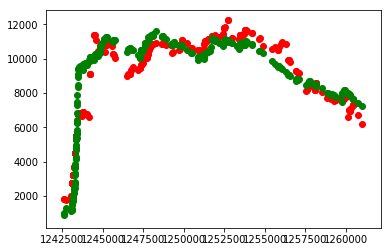

In [37]:
plt.scatter(plotX, ynew, color='r')
plt.scatter(plotX, label, color='g')
plt.show()

In [46]:
model2 = Sequential([
    Dense(32, input_shape=(len(data[0]),),activation = "relu"),
    Dropout(0.5),
    Dense(1, input_shape=(len(data[0]),)),
])

In [47]:
model2.compile(optimizer='adam',
              loss='mse',
              metrics=['mse'])

In [48]:
model2.fit(np.asarray(data), np.asarray(label), epochs=10000, batch_size=32)

Epoch 1/10000
255/255 [==============================] - 1s 2ms/step - loss: 98060449.9451 - mean_squared_error: 98060449.9451
Epoch 2/10000
255/255 [==============================] - 0s 114us/step - loss: 94649405.2706 - mean_squared_error: 94649405.2706
Epoch 3/10000
255/255 [==============================] - 0s 157us/step - loss: 89760657.6627 - mean_squared_error: 89760657.6627
Epoch 4/10000
255/255 [==============================] - 0s 208us/step - loss: 85797504.5961 - mean_squared_error: 85797504.5961
Epoch 5/10000
255/255 [==============================] - 0s 365us/step - loss: 80992225.8824 - mean_squared_error: 80992225.8824
Epoch 6/10000
255/255 [==============================] - 0s 255us/step - loss: 78546980.2353 - mean_squared_error: 78546980.2353
Epoch 7/10000
255/255 [==============================] - 0s 227us/step - loss: 73480053.7412 - mean_squared_error: 73480053.7412
Epoch 8/10000
255/255 [==============================] - 0s 216us/step - loss: 70660473.9294 - mean

255/255 [==============================] - 0s 114us/step - loss: 15224161.4157 - mean_squared_error: 15224161.4157
Epoch 65/10000
255/255 [==============================] - 0s 125us/step - loss: 15255533.7529 - mean_squared_error: 15255533.7529
Epoch 66/10000
255/255 [==============================] - 0s 110us/step - loss: 13091376.6588 - mean_squared_error: 13091376.6588
Epoch 67/10000
255/255 [==============================] - 0s 102us/step - loss: 13585293.2745 - mean_squared_error: 13585293.2745
Epoch 68/10000
255/255 [==============================] - 0s 98us/step - loss: 12859227.2118 - mean_squared_error: 12859227.2118
Epoch 69/10000
255/255 [==============================] - 0s 94us/step - loss: 13891277.9098 - mean_squared_error: 13891277.9098
Epoch 70/10000
255/255 [==============================] - 0s 145us/step - loss: 13902404.5882 - mean_squared_error: 13902404.5882
Epoch 71/10000
255/255 [==============================] - 0s 188us/step - loss: 14583212.5451 - mean_square

255/255 [==============================] - 0s 59us/step - loss: 10991320.7216 - mean_squared_error: 10991320.7216
Epoch 128/10000
255/255 [==============================] - 0s 67us/step - loss: 12094397.5216 - mean_squared_error: 12094397.5216
Epoch 129/10000
255/255 [==============================] - 0s 145us/step - loss: 12325095.3490 - mean_squared_error: 12325095.3490
Epoch 130/10000
255/255 [==============================] - 0s 106us/step - loss: 11878210.7333 - mean_squared_error: 11878210.7333
Epoch 131/10000
255/255 [==============================] - 0s 94us/step - loss: 11819042.8824 - mean_squared_error: 11819042.8824
Epoch 132/10000
255/255 [==============================] - 0s 118us/step - loss: 9755718.1882 - mean_squared_error: 9755718.1882
Epoch 133/10000
255/255 [==============================] - 0s 110us/step - loss: 12427373.5412 - mean_squared_error: 12427373.5412
Epoch 134/10000
255/255 [==============================] - 0s 129us/step - loss: 12980245.8627 - mean_sq

255/255 [==============================] - 0s 82us/step - loss: 10864433.7725 - mean_squared_error: 10864433.7725
Epoch 190/10000
255/255 [==============================] - 0s 263us/step - loss: 10923836.8431 - mean_squared_error: 10923836.8431
Epoch 191/10000
255/255 [==============================] - 0s 176us/step - loss: 9211581.6529 - mean_squared_error: 9211581.6529
Epoch 192/10000
255/255 [==============================] - 0s 161us/step - loss: 10166212.0667 - mean_squared_error: 10166212.0667
Epoch 193/10000
255/255 [==============================] - 0s 161us/step - loss: 11042023.7451 - mean_squared_error: 11042023.7451
Epoch 194/10000
255/255 [==============================] - 0s 243us/step - loss: 10702447.8941 - mean_squared_error: 10702447.8941
Epoch 195/10000
255/255 [==============================] - 0s 192us/step - loss: 10341890.4510 - mean_squared_error: 10341890.4510
Epoch 196/10000
255/255 [==============================] - 0s 212us/step - loss: 9558654.5843 - mean_s

255/255 [==============================] - 0s 78us/step - loss: 9833525.9137 - mean_squared_error: 9833525.9137
Epoch 253/10000
255/255 [==============================] - 0s 141us/step - loss: 8515619.2039 - mean_squared_error: 8515619.2039
Epoch 254/10000
255/255 [==============================] - 0s 90us/step - loss: 8804573.9333 - mean_squared_error: 8804573.9333
Epoch 255/10000
255/255 [==============================] - 0s 149us/step - loss: 9853505.2667 - mean_squared_error: 9853505.2667
Epoch 256/10000
255/255 [==============================] - 0s 98us/step - loss: 9934149.4314 - mean_squared_error: 9934149.4314
Epoch 257/10000
255/255 [==============================] - 0s 286us/step - loss: 9183414.2294 - mean_squared_error: 9183414.2294
Epoch 258/10000
255/255 [==============================] - 0s 157us/step - loss: 8682136.1333 - mean_squared_error: 8682136.1333
Epoch 259/10000
255/255 [==============================] - 0s 282us/step - loss: 9732169.6353 - mean_squared_error: 

255/255 [==============================] - 0s 157us/step - loss: 8197005.4059 - mean_squared_error: 8197005.4059
Epoch 316/10000
255/255 [==============================] - 0s 59us/step - loss: 8937301.8745 - mean_squared_error: 8937301.8745
Epoch 317/10000
255/255 [==============================] - 0s 137us/step - loss: 8995398.8275 - mean_squared_error: 8995398.8275
Epoch 318/10000
255/255 [==============================] - 0s 114us/step - loss: 9392433.9863 - mean_squared_error: 9392433.9863
Epoch 319/10000
255/255 [==============================] - 0s 125us/step - loss: 9625832.3686 - mean_squared_error: 9625832.3686
Epoch 320/10000
255/255 [==============================] - 0s 114us/step - loss: 8795670.3647 - mean_squared_error: 8795670.3647
Epoch 321/10000
255/255 [==============================] - 0s 200us/step - loss: 9890865.0039 - mean_squared_error: 9890865.0039
Epoch 322/10000
255/255 [==============================] - 0s 318us/step - loss: 8848574.8902 - mean_squared_error

255/255 [==============================] - 0s 141us/step - loss: 9797194.7255 - mean_squared_error: 9797194.7255
Epoch 379/10000
255/255 [==============================] - 0s 157us/step - loss: 9390936.6588 - mean_squared_error: 9390936.6588
Epoch 380/10000
255/255 [==============================] - 0s 153us/step - loss: 7396491.3725 - mean_squared_error: 7396491.3725
Epoch 381/10000
255/255 [==============================] - ETA: 0s - loss: 6059488.5000 - mean_squared_error: 6059488.50 - 0s 169us/step - loss: 6972362.7157 - mean_squared_error: 6972362.7157
Epoch 382/10000
255/255 [==============================] - 0s 125us/step - loss: 9370357.9961 - mean_squared_error: 9370357.9961
Epoch 383/10000
255/255 [==============================] - 0s 196us/step - loss: 9306285.6059 - mean_squared_error: 9306285.6059
Epoch 384/10000
255/255 [==============================] - 0s 125us/step - loss: 8975382.7824 - mean_squared_error: 8975382.7824
Epoch 385/10000
255/255 [========================

255/255 [==============================] - 0s 137us/step - loss: 7583060.1588 - mean_squared_error: 7583060.1588
Epoch 442/10000
255/255 [==============================] - 0s 137us/step - loss: 9159254.2196 - mean_squared_error: 9159254.2196
Epoch 443/10000
255/255 [==============================] - 0s 137us/step - loss: 8096938.3882 - mean_squared_error: 8096938.3882
Epoch 444/10000
255/255 [==============================] - 0s 90us/step - loss: 10172228.0039 - mean_squared_error: 10172228.0039
Epoch 445/10000
255/255 [==============================] - 0s 180us/step - loss: 9520060.6275 - mean_squared_error: 9520060.6275
Epoch 446/10000
255/255 [==============================] - 0s 216us/step - loss: 7118556.0941 - mean_squared_error: 7118556.0941
Epoch 447/10000
255/255 [==============================] - 0s 302us/step - loss: 6488931.7392 - mean_squared_error: 6488931.7392
Epoch 448/10000
255/255 [==============================] - 0s 337us/step - loss: 7325887.2196 - mean_squared_err

255/255 [==============================] - 0s 137us/step - loss: 8318094.0863 - mean_squared_error: 8318094.0863
Epoch 505/10000
255/255 [==============================] - 0s 122us/step - loss: 8028616.5412 - mean_squared_error: 8028616.5412
Epoch 506/10000
255/255 [==============================] - 0s 176us/step - loss: 8330699.4941 - mean_squared_error: 8330699.4941
Epoch 507/10000
255/255 [==============================] - 0s 137us/step - loss: 8593404.0235 - mean_squared_error: 8593404.0235
Epoch 508/10000
255/255 [==============================] - 0s 149us/step - loss: 7524877.6137 - mean_squared_error: 7524877.6137
Epoch 509/10000
255/255 [==============================] - 0s 200us/step - loss: 7489565.2549 - mean_squared_error: 7489565.2549
Epoch 510/10000
255/255 [==============================] - 0s 180us/step - loss: 8130167.4098 - mean_squared_error: 8130167.4098
Epoch 511/10000
255/255 [==============================] - 0s 263us/step - loss: 7566092.9765 - mean_squared_erro

255/255 [==============================] - 0s 98us/step - loss: 7284558.6451 - mean_squared_error: 7284558.6451
Epoch 568/10000
255/255 [==============================] - 0s 165us/step - loss: 7863964.7039 - mean_squared_error: 7863964.7039
Epoch 569/10000
255/255 [==============================] - 0s 82us/step - loss: 6860836.9059 - mean_squared_error: 6860836.9059
Epoch 570/10000
255/255 [==============================] - 0s 153us/step - loss: 7928796.9922 - mean_squared_error: 7928796.9922
Epoch 571/10000
255/255 [==============================] - 0s 184us/step - loss: 7166703.1745 - mean_squared_error: 7166703.1745
Epoch 572/10000
255/255 [==============================] - 0s 188us/step - loss: 9798994.7451 - mean_squared_error: 9798994.7451
Epoch 573/10000
255/255 [==============================] - 0s 161us/step - loss: 8136009.8961 - mean_squared_error: 8136009.8961
Epoch 574/10000
255/255 [==============================] - 0s 188us/step - loss: 8093620.5451 - mean_squared_error:

255/255 [==============================] - 0s 216us/step - loss: 8766952.1137 - mean_squared_error: 8766952.1137
Epoch 631/10000
255/255 [==============================] - 0s 75us/step - loss: 6383211.1686 - mean_squared_error: 6383211.1686
Epoch 632/10000
255/255 [==============================] - 0s 176us/step - loss: 8488699.9235 - mean_squared_error: 8488699.9235
Epoch 633/10000
255/255 [==============================] - 0s 82us/step - loss: 7578784.1412 - mean_squared_error: 7578784.1412
Epoch 634/10000
255/255 [==============================] - 0s 122us/step - loss: 8010753.2588 - mean_squared_error: 8010753.2588
Epoch 635/10000
255/255 [==============================] - 0s 204us/step - loss: 7149627.6667 - mean_squared_error: 7149627.6667
Epoch 636/10000
255/255 [==============================] - 0s 227us/step - loss: 8022982.1471 - mean_squared_error: 8022982.1471
Epoch 637/10000
255/255 [==============================] - 0s 59us/step - loss: 8146828.9059 - mean_squared_error: 

255/255 [==============================] - 0s 196us/step - loss: 8611245.1882 - mean_squared_error: 8611245.1882
Epoch 694/10000
255/255 [==============================] - 0s 153us/step - loss: 7434400.8647 - mean_squared_error: 7434400.8647
Epoch 695/10000
255/255 [==============================] - 0s 133us/step - loss: 7136058.1118 - mean_squared_error: 7136058.1118
Epoch 696/10000
255/255 [==============================] - 0s 129us/step - loss: 6709271.1078 - mean_squared_error: 6709271.1078
Epoch 697/10000
255/255 [==============================] - 0s 239us/step - loss: 8134262.8235 - mean_squared_error: 8134262.8235
Epoch 698/10000
255/255 [==============================] - 0s 192us/step - loss: 7717233.7275 - mean_squared_error: 7717233.7275
Epoch 699/10000
255/255 [==============================] - 0s 125us/step - loss: 8122382.3725 - mean_squared_error: 8122382.3725
Epoch 700/10000
255/255 [==============================] - 0s 200us/step - loss: 7822092.3490 - mean_squared_erro

255/255 [==============================] - 0s 118us/step - loss: 8772784.1255 - mean_squared_error: 8772784.1255
Epoch 756/10000
255/255 [==============================] - 0s 102us/step - loss: 7915882.2431 - mean_squared_error: 7915882.2431
Epoch 757/10000
255/255 [==============================] - 0s 122us/step - loss: 7514456.5059 - mean_squared_error: 7514456.5059
Epoch 758/10000
255/255 [==============================] - 0s 78us/step - loss: 6965529.7608 - mean_squared_error: 6965529.7608
Epoch 759/10000
255/255 [==============================] - 0s 125us/step - loss: 7100153.3471 - mean_squared_error: 7100153.3471
Epoch 760/10000
255/255 [==============================] - 0s 153us/step - loss: 7272737.4216 - mean_squared_error: 7272737.4216
Epoch 761/10000
255/255 [==============================] - 0s 294us/step - loss: 7786404.1000 - mean_squared_error: 7786404.1000
Epoch 762/10000
255/255 [==============================] - 0s 267us/step - loss: 8052937.7137 - mean_squared_error

255/255 [==============================] - 0s 94us/step - loss: 7522444.0333 - mean_squared_error: 7522444.0333
Epoch 819/10000
255/255 [==============================] - 0s 145us/step - loss: 8004315.7804 - mean_squared_error: 8004315.7804
Epoch 820/10000
255/255 [==============================] - 0s 114us/step - loss: 8117118.6627 - mean_squared_error: 8117118.6627
Epoch 821/10000
255/255 [==============================] - 0s 106us/step - loss: 7794798.9647 - mean_squared_error: 7794798.9647
Epoch 822/10000
255/255 [==============================] - 0s 141us/step - loss: 8317038.9765 - mean_squared_error: 8317038.9765
Epoch 823/10000
255/255 [==============================] - 0s 180us/step - loss: 8159617.4667 - mean_squared_error: 8159617.4667
Epoch 824/10000
255/255 [==============================] - 0s 282us/step - loss: 7736223.6010 - mean_squared_error: 7736223.6010
Epoch 825/10000
255/255 [==============================] - 0s 357us/step - loss: 7201797.0745 - mean_squared_error

255/255 [==============================] - 0s 125us/step - loss: 8005010.2000 - mean_squared_error: 8005010.2000
Epoch 882/10000
255/255 [==============================] - 0s 110us/step - loss: 8584911.0490 - mean_squared_error: 8584911.0490
Epoch 883/10000
255/255 [==============================] - 0s 75us/step - loss: 8052918.3765 - mean_squared_error: 8052918.3765
Epoch 884/10000
255/255 [==============================] - 0s 137us/step - loss: 7503125.6373 - mean_squared_error: 7503125.6373
Epoch 885/10000
255/255 [==============================] - 0s 114us/step - loss: 7745886.8863 - mean_squared_error: 7745886.8863
Epoch 886/10000
255/255 [==============================] - 0s 86us/step - loss: 7653148.8216 - mean_squared_error: 7653148.8216
Epoch 887/10000
255/255 [==============================] - 0s 125us/step - loss: 7132815.9333 - mean_squared_error: 7132815.9333
Epoch 888/10000
255/255 [==============================] - 0s 165us/step - loss: 7501972.1784 - mean_squared_error:

255/255 [==============================] - 0s 118us/step - loss: 8072723.7686 - mean_squared_error: 8072723.7686
Epoch 945/10000
255/255 [==============================] - 0s 227us/step - loss: 7393645.6176 - mean_squared_error: 7393645.6176
Epoch 946/10000
255/255 [==============================] - 0s 94us/step - loss: 6772594.4333 - mean_squared_error: 6772594.4333
Epoch 947/10000
255/255 [==============================] - 0s 200us/step - loss: 7898433.6353 - mean_squared_error: 7898433.6353
Epoch 948/10000
255/255 [==============================] - 0s 204us/step - loss: 7022339.1941 - mean_squared_error: 7022339.1941
Epoch 949/10000
255/255 [==============================] - 0s 75us/step - loss: 8776887.0196 - mean_squared_error: 8776887.0196
Epoch 950/10000
255/255 [==============================] - 0s 153us/step - loss: 7647685.4373 - mean_squared_error: 7647685.4373
Epoch 951/10000
255/255 [==============================] - 0s 165us/step - loss: 8284174.0471 - mean_squared_error:

255/255 [==============================] - 0s 102us/step - loss: 7662632.0392 - mean_squared_error: 7662632.0392
Epoch 1008/10000
255/255 [==============================] - 0s 149us/step - loss: 8233637.4578 - mean_squared_error: 8233637.4578
Epoch 1009/10000
255/255 [==============================] - 0s 94us/step - loss: 7706310.8863 - mean_squared_error: 7706310.8863
Epoch 1010/10000
255/255 [==============================] - 0s 129us/step - loss: 7357812.4745 - mean_squared_error: 7357812.4745
Epoch 1011/10000
255/255 [==============================] - 0s 145us/step - loss: 7166709.9725 - mean_squared_error: 7166709.9725
Epoch 1012/10000
255/255 [==============================] - 0s 196us/step - loss: 7397778.8020 - mean_squared_error: 7397778.8020
Epoch 1013/10000
255/255 [==============================] - 0s 176us/step - loss: 7122805.4863 - mean_squared_error: 7122805.4863
Epoch 1014/10000
255/255 [==============================] - 0s 133us/step - loss: 8321696.7882 - mean_square

255/255 [==============================] - 0s 94us/step - loss: 7865373.3373 - mean_squared_error: 7865373.3373
Epoch 1070/10000
255/255 [==============================] - 0s 149us/step - loss: 7848295.5549 - mean_squared_error: 7848295.5549
Epoch 1071/10000
255/255 [==============================] - 0s 78us/step - loss: 7990881.0706 - mean_squared_error: 7990881.0706
Epoch 1072/10000
255/255 [==============================] - 0s 78us/step - loss: 8233338.2078 - mean_squared_error: 8233338.2078
Epoch 1073/10000
255/255 [==============================] - 0s 173us/step - loss: 8195612.9157 - mean_squared_error: 8195612.9157
Epoch 1074/10000
255/255 [==============================] - 0s 125us/step - loss: 7712859.5941 - mean_squared_error: 7712859.5941
Epoch 1075/10000
255/255 [==============================] - 0s 231us/step - loss: 8169114.1961 - mean_squared_error: 8169114.1961
Epoch 1076/10000
255/255 [==============================] - 0s 365us/step - loss: 6891267.0196 - mean_squared_

255/255 [==============================] - 0s 184us/step - loss: 6534593.3245 - mean_squared_error: 6534593.3245
Epoch 1131/10000
255/255 [==============================] - 0s 71us/step - loss: 7245102.4235 - mean_squared_error: 7245102.4235
Epoch 1132/10000
255/255 [==============================] - 0s 200us/step - loss: 6845370.9255 - mean_squared_error: 6845370.9255
Epoch 1133/10000
255/255 [==============================] - 0s 102us/step - loss: 7196520.4157 - mean_squared_error: 7196520.4157
Epoch 1134/10000
255/255 [==============================] - 0s 59us/step - loss: 8688189.6196 - mean_squared_error: 8688189.6196
Epoch 1135/10000
255/255 [==============================] - 0s 110us/step - loss: 7883096.5961 - mean_squared_error: 7883096.5961
Epoch 1136/10000
255/255 [==============================] - 0s 192us/step - loss: 7390385.8784 - mean_squared_error: 7390385.8784
Epoch 1137/10000
255/255 [==============================] - 0s 133us/step - loss: 8277929.3863 - mean_squared

255/255 [==============================] - 0s 118us/step - loss: 8027288.3275 - mean_squared_error: 8027288.3275
Epoch 1194/10000
255/255 [==============================] - 0s 173us/step - loss: 7732652.8569 - mean_squared_error: 7732652.8569
Epoch 1195/10000
255/255 [==============================] - 0s 231us/step - loss: 6947971.5608 - mean_squared_error: 6947971.5608
Epoch 1196/10000
255/255 [==============================] - 0s 192us/step - loss: 7294003.4549 - mean_squared_error: 7294003.4549
Epoch 1197/10000
255/255 [==============================] - 0s 149us/step - loss: 8445314.1686 - mean_squared_error: 8445314.1686
Epoch 1198/10000
255/255 [==============================] - 0s 133us/step - loss: 7438025.4941 - mean_squared_error: 7438025.4941
Epoch 1199/10000
255/255 [==============================] - 0s 145us/step - loss: 7615674.9333 - mean_squared_error: 7615674.9333
Epoch 1200/10000
255/255 [==============================] - 0s 216us/step - loss: 7013999.1902 - mean_squar

255/255 [==============================] - 0s 314us/step - loss: 7410700.2549 - mean_squared_error: 7410700.2549
Epoch 1257/10000
255/255 [==============================] - 0s 176us/step - loss: 7009473.3843 - mean_squared_error: 7009473.3843
Epoch 1258/10000
255/255 [==============================] - 0s 118us/step - loss: 7965939.6275 - mean_squared_error: 7965939.6275
Epoch 1259/10000
255/255 [==============================] - 0s 129us/step - loss: 7806687.7216 - mean_squared_error: 7806687.7216
Epoch 1260/10000
255/255 [==============================] - 0s 129us/step - loss: 7964290.9745 - mean_squared_error: 7964290.9745
Epoch 1261/10000
255/255 [==============================] - 0s 188us/step - loss: 8098568.7863 - mean_squared_error: 8098568.7863
Epoch 1262/10000
255/255 [==============================] - 0s 157us/step - loss: 7845472.5451 - mean_squared_error: 7845472.5451
Epoch 1263/10000
255/255 [==============================] - 0s 216us/step - loss: 7126328.9304 - mean_squar

255/255 [==============================] - 0s 90us/step - loss: 6193834.9784 - mean_squared_error: 6193834.9784
Epoch 1319/10000
255/255 [==============================] - 0s 196us/step - loss: 8905766.1373 - mean_squared_error: 8905766.1373
Epoch 1320/10000
255/255 [==============================] - 0s 63us/step - loss: 8345366.0392 - mean_squared_error: 8345366.0392
Epoch 1321/10000
255/255 [==============================] - 0s 192us/step - loss: 7808963.2863 - mean_squared_error: 7808963.2863
Epoch 1322/10000
255/255 [==============================] - 0s 553us/step - loss: 6773745.1431 - mean_squared_error: 6773745.1431
Epoch 1323/10000
255/255 [==============================] - 0s 125us/step - loss: 7308008.8392 - mean_squared_error: 7308008.8392
Epoch 1324/10000
255/255 [==============================] - 0s 180us/step - loss: 8349969.3686 - mean_squared_error: 8349969.3686
Epoch 1325/10000
255/255 [==============================] - 0s 106us/step - loss: 6945695.1392 - mean_squared

255/255 [==============================] - 0s 98us/step - loss: 8205899.5000 - mean_squared_error: 8205899.5000
Epoch 1381/10000
255/255 [==============================] - 0s 102us/step - loss: 6932524.8353 - mean_squared_error: 6932524.8353
Epoch 1382/10000
255/255 [==============================] - 0s 67us/step - loss: 6875687.0941 - mean_squared_error: 6875687.0941
Epoch 1383/10000
255/255 [==============================] - 0s 125us/step - loss: 7465498.6745 - mean_squared_error: 7465498.6745
Epoch 1384/10000
255/255 [==============================] - 0s 78us/step - loss: 7073008.5255 - mean_squared_error: 7073008.5255
Epoch 1385/10000
255/255 [==============================] - 0s 125us/step - loss: 8831171.5686 - mean_squared_error: 8831171.5686
Epoch 1386/10000
255/255 [==============================] - 0s 149us/step - loss: 8482352.8235 - mean_squared_error: 8482352.8235
Epoch 1387/10000
255/255 [==============================] - 0s 133us/step - loss: 7566938.5490 - mean_squared_

255/255 [==============================] - 0s 204us/step - loss: 7312341.3196 - mean_squared_error: 7312341.3196
Epoch 1444/10000
255/255 [==============================] - 0s 106us/step - loss: 7041759.2588 - mean_squared_error: 7041759.2588
Epoch 1445/10000
255/255 [==============================] - 0s 94us/step - loss: 6389379.5412 - mean_squared_error: 6389379.5412
Epoch 1446/10000
255/255 [==============================] - 0s 161us/step - loss: 7340643.2431 - mean_squared_error: 7340643.2431
Epoch 1447/10000
255/255 [==============================] - 0s 196us/step - loss: 6994683.4784 - mean_squared_error: 6994683.4784
Epoch 1448/10000
255/255 [==============================] - 0s 118us/step - loss: 6608310.8824 - mean_squared_error: 6608310.8824
Epoch 1449/10000
255/255 [==============================] - 0s 165us/step - loss: 7361527.5412 - mean_squared_error: 7361527.5412
Epoch 1450/10000
255/255 [==============================] - 0s 129us/step - loss: 7349656.4706 - mean_square

255/255 [==============================] - 0s 133us/step - loss: 6784284.3039 - mean_squared_error: 6784284.3039
Epoch 1506/10000
255/255 [==============================] - 0s 180us/step - loss: 7240806.8431 - mean_squared_error: 7240806.8431
Epoch 1507/10000
255/255 [==============================] - 0s 118us/step - loss: 7514333.9529 - mean_squared_error: 7514333.9529
Epoch 1508/10000
255/255 [==============================] - 0s 129us/step - loss: 6936086.7725 - mean_squared_error: 6936086.7725
Epoch 1509/10000
255/255 [==============================] - 0s 212us/step - loss: 6977034.2275 - mean_squared_error: 6977034.2275
Epoch 1510/10000
255/255 [==============================] - 0s 149us/step - loss: 6945782.1922 - mean_squared_error: 6945782.1922
Epoch 1511/10000
255/255 [==============================] - 0s 157us/step - loss: 7474761.7118 - mean_squared_error: 7474761.7118
Epoch 1512/10000
255/255 [==============================] - 0s 176us/step - loss: 8285961.2569 - mean_squar

255/255 [==============================] - 0s 224us/step - loss: 7931221.8922 - mean_squared_error: 7931221.8922
Epoch 1569/10000
255/255 [==============================] - 0s 184us/step - loss: 6701949.4373 - mean_squared_error: 6701949.4373
Epoch 1570/10000
255/255 [==============================] - 0s 125us/step - loss: 7093932.9569 - mean_squared_error: 7093932.9569
Epoch 1571/10000
255/255 [==============================] - 0s 204us/step - loss: 7713284.1118 - mean_squared_error: 7713284.1118
Epoch 1572/10000
255/255 [==============================] - 0s 137us/step - loss: 7513243.5314 - mean_squared_error: 7513243.5314
Epoch 1573/10000
255/255 [==============================] - 0s 188us/step - loss: 8174573.7725 - mean_squared_error: 8174573.7725
Epoch 1574/10000
255/255 [==============================] - 0s 298us/step - loss: 7100730.4000 - mean_squared_error: 7100730.4000
Epoch 1575/10000
255/255 [==============================] - 0s 392us/step - loss: 8775778.5529 - mean_squar

255/255 [==============================] - 0s 102us/step - loss: 7716823.8431 - mean_squared_error: 7716823.8431
Epoch 1631/10000
255/255 [==============================] - 0s 102us/step - loss: 7667952.0373 - mean_squared_error: 7667952.0373
Epoch 1632/10000
255/255 [==============================] - 0s 106us/step - loss: 7100553.1373 - mean_squared_error: 7100553.1373
Epoch 1633/10000
255/255 [==============================] - 0s 82us/step - loss: 7387228.9255 - mean_squared_error: 7387228.9255
Epoch 1634/10000
255/255 [==============================] - 0s 161us/step - loss: 7285770.6078 - mean_squared_error: 7285770.6078
Epoch 1635/10000
255/255 [==============================] - 0s 86us/step - loss: 7695825.1373 - mean_squared_error: 7695825.1373
Epoch 1636/10000
255/255 [==============================] - 0s 239us/step - loss: 8935803.0392 - mean_squared_error: 8935803.0392
Epoch 1637/10000
255/255 [==============================] - 0s 129us/step - loss: 6460414.4686 - mean_squared

255/255 [==============================] - 0s 71us/step - loss: 6444033.0843 - mean_squared_error: 6444033.0843
Epoch 1694/10000
255/255 [==============================] - 0s 90us/step - loss: 7035406.4745 - mean_squared_error: 7035406.4745
Epoch 1695/10000
255/255 [==============================] - 0s 75us/step - loss: 7897190.2216 - mean_squared_error: 7897190.2216
Epoch 1696/10000
255/255 [==============================] - 0s 78us/step - loss: 7879149.8588 - mean_squared_error: 7879149.8588
Epoch 1697/10000
255/255 [==============================] - 0s 106us/step - loss: 7556415.8059 - mean_squared_error: 7556415.8059
Epoch 1698/10000
255/255 [==============================] - 0s 78us/step - loss: 7305318.8667 - mean_squared_error: 7305318.8667
Epoch 1699/10000
255/255 [==============================] - 0s 78us/step - loss: 8165427.3529 - mean_squared_error: 8165427.3529
Epoch 1700/10000
255/255 [==============================] - 0s 129us/step - loss: 7447522.0216 - mean_squared_err

Epoch 1756/10000
255/255 [==============================] - 0s 102us/step - loss: 8349095.0196 - mean_squared_error: 8349095.0196
Epoch 1757/10000
255/255 [==============================] - 0s 78us/step - loss: 6303730.0020 - mean_squared_error: 6303730.0020
Epoch 1758/10000
255/255 [==============================] - 0s 129us/step - loss: 7669865.6137 - mean_squared_error: 7669865.6137
Epoch 1759/10000
255/255 [==============================] - 0s 129us/step - loss: 7635836.8255 - mean_squared_error: 7635836.8255
Epoch 1760/10000
255/255 [==============================] - 0s 118us/step - loss: 7526295.9294 - mean_squared_error: 7526295.9294
Epoch 1761/10000
255/255 [==============================] - 0s 110us/step - loss: 7503819.7000 - mean_squared_error: 7503819.7000
Epoch 1762/10000
255/255 [==============================] - 0s 110us/step - loss: 8156519.9451 - mean_squared_error: 8156519.9451
Epoch 1763/10000
255/255 [==============================] - 0s 110us/step - loss: 7171662.2

255/255 [==============================] - 0s 133us/step - loss: 7791610.4941 - mean_squared_error: 7791610.4941
Epoch 1820/10000
255/255 [==============================] - 0s 82us/step - loss: 7265339.1941 - mean_squared_error: 7265339.1941
Epoch 1821/10000
255/255 [==============================] - 0s 82us/step - loss: 8203268.2471 - mean_squared_error: 8203268.2471
Epoch 1822/10000
255/255 [==============================] - 0s 122us/step - loss: 7359687.9882 - mean_squared_error: 7359687.9882
Epoch 1823/10000
255/255 [==============================] - 0s 75us/step - loss: 7592954.1569 - mean_squared_error: 7592954.1569
Epoch 1824/10000
255/255 [==============================] - 0s 86us/step - loss: 7895569.8549 - mean_squared_error: 7895569.8549
Epoch 1825/10000
255/255 [==============================] - 0s 98us/step - loss: 8000791.6471 - mean_squared_error: 8000791.6471
Epoch 1826/10000
255/255 [==============================] - 0s 102us/step - loss: 7508139.8686 - mean_squared_er

255/255 [==============================] - 0s 149us/step - loss: 6911506.5980 - mean_squared_error: 6911506.5980
Epoch 1883/10000
255/255 [==============================] - 0s 82us/step - loss: 8340067.6196 - mean_squared_error: 8340067.6196
Epoch 1884/10000
255/255 [==============================] - 0s 165us/step - loss: 7026740.2402 - mean_squared_error: 7026740.2402
Epoch 1885/10000
255/255 [==============================] - 0s 75us/step - loss: 6722060.0294 - mean_squared_error: 6722060.0294
Epoch 1886/10000
255/255 [==============================] - 0s 102us/step - loss: 7383590.8980 - mean_squared_error: 7383590.8980
Epoch 1887/10000
255/255 [==============================] - 0s 122us/step - loss: 7352933.8412 - mean_squared_error: 7352933.8412
Epoch 1888/10000
255/255 [==============================] - 0s 137us/step - loss: 6735168.1098 - mean_squared_error: 6735168.1098
Epoch 1889/10000
255/255 [==============================] - 0s 263us/step - loss: 7265868.2412 - mean_squared

255/255 [==============================] - 0s 133us/step - loss: 8095754.1294 - mean_squared_error: 8095754.1294
Epoch 1946/10000
255/255 [==============================] - 0s 75us/step - loss: 6403451.2902 - mean_squared_error: 6403451.2902
Epoch 1947/10000
255/255 [==============================] - 0s 90us/step - loss: 7458474.6510 - mean_squared_error: 7458474.6510
Epoch 1948/10000
255/255 [==============================] - 0s 133us/step - loss: 6866084.9941 - mean_squared_error: 6866084.9941
Epoch 1949/10000
255/255 [==============================] - 0s 282us/step - loss: 6903490.8784 - mean_squared_error: 6903490.8784
Epoch 1950/10000
255/255 [==============================] - 0s 263us/step - loss: 6630280.3324 - mean_squared_error: 6630280.3324
Epoch 1951/10000
255/255 [==============================] - 0s 192us/step - loss: 7106556.3686 - mean_squared_error: 7106556.3686
Epoch 1952/10000
255/255 [==============================] - 0s 204us/step - loss: 7016012.9431 - mean_squared

255/255 [==============================] - 0s 137us/step - loss: 7861353.0510 - mean_squared_error: 7861353.0510
Epoch 2009/10000
255/255 [==============================] - 0s 90us/step - loss: 7947218.0686 - mean_squared_error: 7947218.0686
Epoch 2010/10000
255/255 [==============================] - 0s 125us/step - loss: 7057211.3373 - mean_squared_error: 7057211.3373
Epoch 2011/10000
255/255 [==============================] - 0s 110us/step - loss: 7301948.3176 - mean_squared_error: 7301948.3176
Epoch 2012/10000
255/255 [==============================] - 0s 133us/step - loss: 7923963.8176 - mean_squared_error: 7923963.8176
Epoch 2013/10000
255/255 [==============================] - 0s 157us/step - loss: 6917255.5804 - mean_squared_error: 6917255.5804
Epoch 2014/10000
255/255 [==============================] - 0s 180us/step - loss: 7963403.2667 - mean_squared_error: 7963403.2667
Epoch 2015/10000
255/255 [==============================] - ETA: 0s - loss: 8279446.0000 - mean_squared_erro

255/255 [==============================] - 0s 153us/step - loss: 7752757.9157 - mean_squared_error: 7752757.9157
Epoch 2071/10000
255/255 [==============================] - 0s 90us/step - loss: 6602697.3980 - mean_squared_error: 6602697.3980
Epoch 2072/10000
255/255 [==============================] - 0s 188us/step - loss: 7025013.9706 - mean_squared_error: 7025013.9706
Epoch 2073/10000
255/255 [==============================] - 0s 145us/step - loss: 6050282.3000 - mean_squared_error: 6050282.3000
Epoch 2074/10000
255/255 [==============================] - 0s 55us/step - loss: 6807088.2549 - mean_squared_error: 6807088.2549
Epoch 2075/10000
255/255 [==============================] - 0s 157us/step - loss: 7153279.9471 - mean_squared_error: 7153279.9471
Epoch 2076/10000
255/255 [==============================] - 0s 129us/step - loss: 7468859.8510 - mean_squared_error: 7468859.8510
Epoch 2077/10000
255/255 [==============================] - 0s 137us/step - loss: 9249423.7765 - mean_squared

255/255 [==============================] - 0s 129us/step - loss: 7200716.3529 - mean_squared_error: 7200716.3529
Epoch 2134/10000
255/255 [==============================] - 0s 59us/step - loss: 6554741.7451 - mean_squared_error: 6554741.7451
Epoch 2135/10000
255/255 [==============================] - 0s 114us/step - loss: 5675265.9451 - mean_squared_error: 5675265.9451
Epoch 2136/10000
255/255 [==============================] - 0s 149us/step - loss: 7579302.5333 - mean_squared_error: 7579302.5333
Epoch 2137/10000
255/255 [==============================] - 0s 98us/step - loss: 7176902.7725 - mean_squared_error: 7176902.7725
Epoch 2138/10000
255/255 [==============================] - 0s 118us/step - loss: 7622931.6510 - mean_squared_error: 7622931.6510
Epoch 2139/10000
255/255 [==============================] - 0s 106us/step - loss: 6974033.1784 - mean_squared_error: 6974033.1784
Epoch 2140/10000
255/255 [==============================] - 0s 196us/step - loss: 7668448.6275 - mean_squared

255/255 [==============================] - 0s 549us/step - loss: 7877194.8549 - mean_squared_error: 7877194.8549
Epoch 2197/10000
255/255 [==============================] - 0s 220us/step - loss: 7692729.7314 - mean_squared_error: 7692729.7314
Epoch 2198/10000
255/255 [==============================] - 0s 125us/step - loss: 7112865.0255 - mean_squared_error: 7112865.0255
Epoch 2199/10000
255/255 [==============================] - 0s 122us/step - loss: 7345108.4216 - mean_squared_error: 7345108.4216
Epoch 2200/10000
255/255 [==============================] - 0s 75us/step - loss: 7091864.3176 - mean_squared_error: 7091864.3176
Epoch 2201/10000
255/255 [==============================] - 0s 165us/step - loss: 6809719.4275 - mean_squared_error: 6809719.4275
Epoch 2202/10000
255/255 [==============================] - 0s 216us/step - loss: 7973294.9608 - mean_squared_error: 7973294.9608
Epoch 2203/10000
255/255 [==============================] - 0s 227us/step - loss: 7949960.3039 - mean_square

255/255 [==============================] - 0s 184us/step - loss: 6311788.5471 - mean_squared_error: 6311788.5471
Epoch 2260/10000
255/255 [==============================] - 0s 349us/step - loss: 7213188.2667 - mean_squared_error: 7213188.2667
Epoch 2261/10000
255/255 [==============================] - 0s 306us/step - loss: 6329837.3824 - mean_squared_error: 6329837.3824
Epoch 2262/10000
255/255 [==============================] - 0s 212us/step - loss: 7196347.6941 - mean_squared_error: 7196347.6941
Epoch 2263/10000
255/255 [==============================] - 0s 239us/step - loss: 6503904.5353 - mean_squared_error: 6503904.5353
Epoch 2264/10000
255/255 [==============================] - 0s 263us/step - loss: 7483767.8098 - mean_squared_error: 7483767.8098
Epoch 2265/10000
255/255 [==============================] - 0s 176us/step - loss: 7555122.9902 - mean_squared_error: 7555122.9902
Epoch 2266/10000
255/255 [==============================] - 0s 200us/step - loss: 7959729.8471 - mean_squar

255/255 [==============================] - 0s 227us/step - loss: 6342655.4980 - mean_squared_error: 6342655.4980
Epoch 2321/10000
255/255 [==============================] - 0s 71us/step - loss: 6283081.8216 - mean_squared_error: 6283081.8216
Epoch 2322/10000
255/255 [==============================] - 0s 133us/step - loss: 8102396.6588 - mean_squared_error: 8102396.6588
Epoch 2323/10000
255/255 [==============================] - 0s 522us/step - loss: 7185415.8275 - mean_squared_error: 7185415.8275
Epoch 2324/10000
255/255 [==============================] - 0s 188us/step - loss: 7684730.5471 - mean_squared_error: 7684730.5471
Epoch 2325/10000
255/255 [==============================] - 0s 122us/step - loss: 6999340.5980 - mean_squared_error: 6999340.5980
Epoch 2326/10000
255/255 [==============================] - 0s 145us/step - loss: 6820454.8000 - mean_squared_error: 6820454.8000
Epoch 2327/10000
255/255 [==============================] - 0s 322us/step - loss: 7278628.2853 - mean_square

255/255 [==============================] - 0s 110us/step - loss: 7158570.2294 - mean_squared_error: 7158570.2294
Epoch 2383/10000
255/255 [==============================] - 0s 157us/step - loss: 7701742.0667 - mean_squared_error: 7701742.0667
Epoch 2384/10000
255/255 [==============================] - 0s 90us/step - loss: 7204718.1098 - mean_squared_error: 7204718.1098
Epoch 2385/10000
255/255 [==============================] - 0s 118us/step - loss: 8463762.0725 - mean_squared_error: 8463762.0725
Epoch 2386/10000
255/255 [==============================] - 0s 157us/step - loss: 6917631.7255 - mean_squared_error: 6917631.7255
Epoch 2387/10000
255/255 [==============================] - 0s 184us/step - loss: 8268867.4529 - mean_squared_error: 8268867.4529
Epoch 2388/10000
255/255 [==============================] - 0s 188us/step - loss: 7731464.6235 - mean_squared_error: 7731464.6235
Epoch 2389/10000
255/255 [==============================] - 0s 161us/step - loss: 7605860.8784 - mean_square

255/255 [==============================] - 0s 125us/step - loss: 8549403.6863 - mean_squared_error: 8549403.6863
Epoch 2445/10000
255/255 [==============================] - 0s 122us/step - loss: 7033127.3863 - mean_squared_error: 7033127.3863
Epoch 2446/10000
255/255 [==============================] - 0s 78us/step - loss: 7005132.0020 - mean_squared_error: 7005132.0020
Epoch 2447/10000
255/255 [==============================] - 0s 129us/step - loss: 6566908.4314 - mean_squared_error: 6566908.4314
Epoch 2448/10000
255/255 [==============================] - 0s 161us/step - loss: 8060044.3725 - mean_squared_error: 8060044.3725
Epoch 2449/10000
255/255 [==============================] - 0s 388us/step - loss: 6546858.9961 - mean_squared_error: 6546858.9961
Epoch 2450/10000
255/255 [==============================] - 0s 122us/step - loss: 7945459.3333 - mean_squared_error: 7945459.3333
Epoch 2451/10000
255/255 [==============================] - 0s 714us/step - loss: 6498180.4118 - mean_square

255/255 [==============================] - 0s 110us/step - loss: 7671151.0725 - mean_squared_error: 7671151.0725
Epoch 2508/10000
255/255 [==============================] - 0s 110us/step - loss: 6810374.1529 - mean_squared_error: 6810374.1529
Epoch 2509/10000
255/255 [==============================] - 0s 86us/step - loss: 7221333.1078 - mean_squared_error: 7221333.1078
Epoch 2510/10000
255/255 [==============================] - 0s 149us/step - loss: 7718761.1176 - mean_squared_error: 7718761.1176
Epoch 2511/10000
255/255 [==============================] - ETA: 0s - loss: 8691140.0000 - mean_squared_error: 8691140.00 - 0s 157us/step - loss: 8038740.6176 - mean_squared_error: 8038740.6176
Epoch 2512/10000
255/255 [==============================] - 0s 196us/step - loss: 7919145.8667 - mean_squared_error: 7919145.8667
Epoch 2513/10000
255/255 [==============================] - 0s 184us/step - loss: 7444442.6941 - mean_squared_error: 7444442.6941
Epoch 2514/10000
255/255 [==================

255/255 [==============================] - 0s 75us/step - loss: 6424201.5118 - mean_squared_error: 6424201.5118
Epoch 2569/10000
255/255 [==============================] - 0s 290us/step - loss: 7185309.1020 - mean_squared_error: 7185309.1020
Epoch 2570/10000
255/255 [==============================] - 0s 129us/step - loss: 8239768.2235 - mean_squared_error: 8239768.2235
Epoch 2571/10000
255/255 [==============================] - 0s 78us/step - loss: 8440697.3000 - mean_squared_error: 8440697.3000
Epoch 2572/10000
255/255 [==============================] - 0s 82us/step - loss: 6952407.0157 - mean_squared_error: 6952407.0157
Epoch 2573/10000
255/255 [==============================] - 0s 78us/step - loss: 7121732.6667 - mean_squared_error: 7121732.6667
Epoch 2574/10000
255/255 [==============================] - 0s 133us/step - loss: 8517466.9922 - mean_squared_error: 8517466.9922
Epoch 2575/10000
255/255 [==============================] - 0s 118us/step - loss: 8550070.5725 - mean_squared_e

255/255 [==============================] - 0s 169us/step - loss: 8099979.4373 - mean_squared_error: 8099979.4373
Epoch 2631/10000
255/255 [==============================] - 0s 129us/step - loss: 7833533.4824 - mean_squared_error: 7833533.4824
Epoch 2632/10000
255/255 [==============================] - 0s 137us/step - loss: 7629441.3196 - mean_squared_error: 7629441.3196
Epoch 2633/10000
255/255 [==============================] - 0s 169us/step - loss: 6855426.8235 - mean_squared_error: 6855426.8235
Epoch 2634/10000
255/255 [==============================] - 0s 153us/step - loss: 8584602.0157 - mean_squared_error: 8584602.0157
Epoch 2635/10000
255/255 [==============================] - 0s 290us/step - loss: 7854431.2118 - mean_squared_error: 7854431.2118
Epoch 2636/10000
255/255 [==============================] - 0s 125us/step - loss: 6507143.1902 - mean_squared_error: 6507143.1902
Epoch 2637/10000
255/255 [==============================] - 0s 188us/step - loss: 7019828.5137 - mean_squar

255/255 [==============================] - 0s 129us/step - loss: 7837729.7196 - mean_squared_error: 7837729.7196
Epoch 2694/10000
255/255 [==============================] - 0s 63us/step - loss: 7550521.3765 - mean_squared_error: 7550521.3765
Epoch 2695/10000
255/255 [==============================] - 0s 90us/step - loss: 7352443.1490 - mean_squared_error: 7352443.1490
Epoch 2696/10000
255/255 [==============================] - 0s 145us/step - loss: 7941626.3098 - mean_squared_error: 7941626.3098
Epoch 2697/10000
255/255 [==============================] - 0s 55us/step - loss: 6707233.9529 - mean_squared_error: 6707233.9529
Epoch 2698/10000
255/255 [==============================] - 0s 102us/step - loss: 7350954.1314 - mean_squared_error: 7350954.1314
Epoch 2699/10000
255/255 [==============================] - 0s 110us/step - loss: 7955469.9216 - mean_squared_error: 7955469.9216
Epoch 2700/10000
255/255 [==============================] - 0s 114us/step - loss: 7701669.5529 - mean_squared_

255/255 [==============================] - 0s 86us/step - loss: 7253096.4059 - mean_squared_error: 7253096.4059
Epoch 2756/10000
255/255 [==============================] - 0s 82us/step - loss: 7537023.9392 - mean_squared_error: 7537023.9392
Epoch 2757/10000
255/255 [==============================] - 0s 318us/step - loss: 7535217.1373 - mean_squared_error: 7535217.1373
Epoch 2758/10000
255/255 [==============================] - 0s 125us/step - loss: 8260458.1392 - mean_squared_error: 8260458.1392
Epoch 2759/10000
255/255 [==============================] - 0s 404us/step - loss: 7787326.6157 - mean_squared_error: 7787326.6157
Epoch 2760/10000
255/255 [==============================] - 0s 102us/step - loss: 7563697.6039 - mean_squared_error: 7563697.6039
Epoch 2761/10000
255/255 [==============================] - 0s 125us/step - loss: 8103621.0098 - mean_squared_error: 8103621.0098
Epoch 2762/10000
255/255 [==============================] - 0s 235us/step - loss: 6418701.1176 - mean_squared

255/255 [==============================] - 0s 90us/step - loss: 7981153.9961 - mean_squared_error: 7981153.9961
Epoch 2819/10000
255/255 [==============================] - 0s 235us/step - loss: 7158225.2725 - mean_squared_error: 7158225.2725
Epoch 2820/10000
255/255 [==============================] - 0s 106us/step - loss: 6948668.5314 - mean_squared_error: 6948668.5314
Epoch 2821/10000
255/255 [==============================] - 0s 122us/step - loss: 7389103.7569 - mean_squared_error: 7389103.7569
Epoch 2822/10000
255/255 [==============================] - 0s 94us/step - loss: 7428378.9980 - mean_squared_error: 7428378.9980
Epoch 2823/10000
255/255 [==============================] - 0s 75us/step - loss: 8842246.1902 - mean_squared_error: 8842246.1902
Epoch 2824/10000
255/255 [==============================] - 0s 110us/step - loss: 6489420.3098 - mean_squared_error: 6489420.3098
Epoch 2825/10000
255/255 [==============================] - 0s 129us/step - loss: 6636045.5608 - mean_squared_

255/255 [==============================] - 0s 196us/step - loss: 7186851.9922 - mean_squared_error: 7186851.9922
Epoch 2881/10000
255/255 [==============================] - 0s 125us/step - loss: 8745920.7824 - mean_squared_error: 8745920.7824
Epoch 2882/10000
255/255 [==============================] - 0s 86us/step - loss: 6315147.1167 - mean_squared_error: 6315147.1167
Epoch 2883/10000
255/255 [==============================] - 0s 133us/step - loss: 6828434.9431 - mean_squared_error: 6828434.9431
Epoch 2884/10000
255/255 [==============================] - 0s 208us/step - loss: 7780390.0000 - mean_squared_error: 7780390.0000
Epoch 2885/10000
255/255 [==============================] - 0s 224us/step - loss: 6923642.5000 - mean_squared_error: 6923642.5000
Epoch 2886/10000
255/255 [==============================] - 0s 141us/step - loss: 7648939.4176 - mean_squared_error: 7648939.4176
Epoch 2887/10000
255/255 [==============================] - 0s 86us/step - loss: 6761238.9078 - mean_squared

255/255 [==============================] - 0s 122us/step - loss: 6721157.3843 - mean_squared_error: 6721157.3843
Epoch 2944/10000
255/255 [==============================] - 0s 102us/step - loss: 7533283.1275 - mean_squared_error: 7533283.1275
Epoch 2945/10000
255/255 [==============================] - 0s 118us/step - loss: 6956004.7922 - mean_squared_error: 6956004.7922
Epoch 2946/10000
255/255 [==============================] - 0s 157us/step - loss: 6994385.5412 - mean_squared_error: 6994385.5412
Epoch 2947/10000
255/255 [==============================] - 0s 149us/step - loss: 7537302.1765 - mean_squared_error: 7537302.1765
Epoch 2948/10000
255/255 [==============================] - 0s 122us/step - loss: 7139275.5333 - mean_squared_error: 7139275.5333
Epoch 2949/10000
255/255 [==============================] - 0s 122us/step - loss: 7090525.2314 - mean_squared_error: 7090525.2314
Epoch 2950/10000
255/255 [==============================] - 0s 98us/step - loss: 7400245.7765 - mean_square

255/255 [==============================] - 0s 90us/step - loss: 7870445.7765 - mean_squared_error: 7870445.7765
Epoch 3006/10000
255/255 [==============================] - 0s 75us/step - loss: 6305828.7765 - mean_squared_error: 6305828.7765
Epoch 3007/10000
255/255 [==============================] - 0s 98us/step - loss: 7084861.0078 - mean_squared_error: 7084861.0078
Epoch 3008/10000
255/255 [==============================] - 0s 71us/step - loss: 7040076.9588 - mean_squared_error: 7040076.9588
Epoch 3009/10000
255/255 [==============================] - 0s 98us/step - loss: 5913006.2098 - mean_squared_error: 5913006.2098
Epoch 3010/10000
255/255 [==============================] - 0s 94us/step - loss: 7897824.3216 - mean_squared_error: 7897824.3216
Epoch 3011/10000
255/255 [==============================] - 0s 102us/step - loss: 7367486.7020 - mean_squared_error: 7367486.7020
Epoch 3012/10000
255/255 [==============================] - 0s 110us/step - loss: 8112882.9255 - mean_squared_err

Epoch 3068/10000
255/255 [==============================] - 0s 71us/step - loss: 6744672.5314 - mean_squared_error: 6744672.5314
Epoch 3069/10000
255/255 [==============================] - 0s 78us/step - loss: 6971340.5784 - mean_squared_error: 6971340.5784
Epoch 3070/10000
255/255 [==============================] - 0s 114us/step - loss: 6278669.6098 - mean_squared_error: 6278669.6098
Epoch 3071/10000
255/255 [==============================] - 0s 71us/step - loss: 7291274.1000 - mean_squared_error: 7291274.1000
Epoch 3072/10000
255/255 [==============================] - 0s 82us/step - loss: 6179435.0157 - mean_squared_error: 6179435.0157
Epoch 3073/10000
255/255 [==============================] - 0s 67us/step - loss: 6716131.1118 - mean_squared_error: 6716131.1118
Epoch 3074/10000
255/255 [==============================] - 0s 110us/step - loss: 7087440.8863 - mean_squared_error: 7087440.8863
Epoch 3075/10000
255/255 [==============================] - 0s 110us/step - loss: 7725573.1510 

255/255 [==============================] - 0s 118us/step - loss: 6822204.6765 - mean_squared_error: 6822204.6765
Epoch 3132/10000
255/255 [==============================] - 0s 133us/step - loss: 6911467.9863 - mean_squared_error: 6911467.9863
Epoch 3133/10000
255/255 [==============================] - 0s 78us/step - loss: 7247300.1078 - mean_squared_error: 7247300.1078
Epoch 3134/10000
255/255 [==============================] - 0s 114us/step - loss: 7887145.5882 - mean_squared_error: 7887145.5882
Epoch 3135/10000
255/255 [==============================] - 0s 94us/step - loss: 7541095.8118 - mean_squared_error: 7541095.8118
Epoch 3136/10000
255/255 [==============================] - 0s 75us/step - loss: 6079383.5020 - mean_squared_error: 6079383.5020
Epoch 3137/10000
255/255 [==============================] - ETA: 0s - loss: 9351250.0000 - mean_squared_error: 9351250.00 - 0s 98us/step - loss: 8512325.0686 - mean_squared_error: 8512325.0686
Epoch 3138/10000
255/255 [=====================

Epoch 3194/10000
255/255 [==============================] - 0s 133us/step - loss: 6656393.3314 - mean_squared_error: 6656393.3314
Epoch 3195/10000
255/255 [==============================] - 0s 106us/step - loss: 6324145.3412 - mean_squared_error: 6324145.3412
Epoch 3196/10000
255/255 [==============================] - 0s 86us/step - loss: 7777278.4569 - mean_squared_error: 7777278.4569
Epoch 3197/10000
255/255 [==============================] - 0s 67us/step - loss: 7221065.1843 - mean_squared_error: 7221065.1843
Epoch 3198/10000
255/255 [==============================] - 0s 90us/step - loss: 7696512.7137 - mean_squared_error: 7696512.7137
Epoch 3199/10000
255/255 [==============================] - 0s 122us/step - loss: 6775796.0667 - mean_squared_error: 6775796.0667
Epoch 3200/10000
255/255 [==============================] - 0s 118us/step - loss: 7883588.2725 - mean_squared_error: 7883588.2725
Epoch 3201/10000
255/255 [==============================] - 0s 114us/step - loss: 6956473.335

255/255 [==============================] - 0s 78us/step - loss: 6927192.0863 - mean_squared_error: 6927192.0863
Epoch 3258/10000
255/255 [==============================] - 0s 86us/step - loss: 6963178.3392 - mean_squared_error: 6963178.3392
Epoch 3259/10000
255/255 [==============================] - 0s 114us/step - loss: 7943976.2196 - mean_squared_error: 7943976.2196
Epoch 3260/10000
255/255 [==============================] - 0s 94us/step - loss: 6363565.4039 - mean_squared_error: 6363565.4039
Epoch 3261/10000
255/255 [==============================] - 0s 78us/step - loss: 6576600.3451 - mean_squared_error: 6576600.3451
Epoch 3262/10000
255/255 [==============================] - 0s 75us/step - loss: 7483813.0588 - mean_squared_error: 7483813.0588
Epoch 3263/10000
255/255 [==============================] - 0s 78us/step - loss: 7301484.7157 - mean_squared_error: 7301484.7157
Epoch 3264/10000
255/255 [==============================] - 0s 200us/step - loss: 6535698.4588 - mean_squared_err

Epoch 3320/10000
255/255 [==============================] - 0s 75us/step - loss: 7240257.0431 - mean_squared_error: 7240257.0431
Epoch 3321/10000
255/255 [==============================] - 0s 82us/step - loss: 7264368.6510 - mean_squared_error: 7264368.6510
Epoch 3322/10000
255/255 [==============================] - 0s 102us/step - loss: 6384192.1059 - mean_squared_error: 6384192.1059
Epoch 3323/10000
255/255 [==============================] - 0s 78us/step - loss: 8665609.9549 - mean_squared_error: 8665609.9549
Epoch 3324/10000
255/255 [==============================] - 0s 98us/step - loss: 6121552.2745 - mean_squared_error: 6121552.2745
Epoch 3325/10000
255/255 [==============================] - 0s 75us/step - loss: 7460042.5529 - mean_squared_error: 7460042.5529
Epoch 3326/10000
255/255 [==============================] - 0s 71us/step - loss: 7658760.1020 - mean_squared_error: 7658760.1020
Epoch 3327/10000
255/255 [==============================] - 0s 102us/step - loss: 6464859.1667 -

255/255 [==============================] - 0s 63us/step - loss: 7639864.9078 - mean_squared_error: 7639864.9078
Epoch 3384/10000
255/255 [==============================] - 0s 82us/step - loss: 5864620.2235 - mean_squared_error: 5864620.2235
Epoch 3385/10000
255/255 [==============================] - 0s 122us/step - loss: 7123244.2471 - mean_squared_error: 7123244.2471
Epoch 3386/10000
255/255 [==============================] - 0s 102us/step - loss: 6754741.9529 - mean_squared_error: 6754741.9529
Epoch 3387/10000
255/255 [==============================] - 0s 122us/step - loss: 6229660.5353 - mean_squared_error: 6229660.5353
Epoch 3388/10000
255/255 [==============================] - 0s 106us/step - loss: 8194393.3039 - mean_squared_error: 8194393.3039
Epoch 3389/10000
255/255 [==============================] - 0s 114us/step - loss: 7563371.8667 - mean_squared_error: 7563371.8667
Epoch 3390/10000
255/255 [==============================] - 0s 82us/step - loss: 6357412.8451 - mean_squared_

255/255 [==============================] - ETA: 0s - loss: 6866864.5000 - mean_squared_error: 6866864.50 - 0s 141us/step - loss: 8348487.3961 - mean_squared_error: 8348487.3961
Epoch 3447/10000
255/255 [==============================] - 0s 133us/step - loss: 7399814.7373 - mean_squared_error: 7399814.7373
Epoch 3448/10000
255/255 [==============================] - 0s 149us/step - loss: 7165851.3333 - mean_squared_error: 7165851.3333
Epoch 3449/10000
255/255 [==============================] - 0s 125us/step - loss: 7854576.3745 - mean_squared_error: 7854576.3745
Epoch 3450/10000
255/255 [==============================] - 0s 129us/step - loss: 7285591.6196 - mean_squared_error: 7285591.6196
Epoch 3451/10000
255/255 [==============================] - 0s 129us/step - loss: 6104444.8392 - mean_squared_error: 6104444.8392
Epoch 3452/10000
255/255 [==============================] - 0s 204us/step - loss: 7631501.2765 - mean_squared_error: 7631501.2765
Epoch 3453/10000
255/255 [=================

255/255 [==============================] - 0s 122us/step - loss: 8148525.1294 - mean_squared_error: 8148525.1294
Epoch 3509/10000
255/255 [==============================] - 0s 200us/step - loss: 8354751.2765 - mean_squared_error: 8354751.2765
Epoch 3510/10000
255/255 [==============================] - 0s 78us/step - loss: 7847328.4510 - mean_squared_error: 7847328.4510
Epoch 3511/10000
255/255 [==============================] - 0s 118us/step - loss: 7046685.6569 - mean_squared_error: 7046685.6569
Epoch 3512/10000
255/255 [==============================] - 0s 98us/step - loss: 6393348.6127 - mean_squared_error: 6393348.6127
Epoch 3513/10000
255/255 [==============================] - 0s 114us/step - loss: 8696095.4451 - mean_squared_error: 8696095.4451
Epoch 3514/10000
255/255 [==============================] - 0s 122us/step - loss: 7758806.8627 - mean_squared_error: 7758806.8627
Epoch 3515/10000
255/255 [==============================] - 0s 114us/step - loss: 7852017.1765 - mean_squared

255/255 [==============================] - 0s 71us/step - loss: 7193127.0314 - mean_squared_error: 7193127.0314
Epoch 3571/10000
255/255 [==============================] - 0s 106us/step - loss: 7621049.2353 - mean_squared_error: 7621049.2353
Epoch 3572/10000
255/255 [==============================] - 0s 90us/step - loss: 7820989.2176 - mean_squared_error: 7820989.2176
Epoch 3573/10000
255/255 [==============================] - 0s 145us/step - loss: 7044805.3706 - mean_squared_error: 7044805.3706
Epoch 3574/10000
255/255 [==============================] - 0s 129us/step - loss: 8142407.1402 - mean_squared_error: 8142407.1402
Epoch 3575/10000
255/255 [==============================] - 0s 137us/step - loss: 7655944.1059 - mean_squared_error: 7655944.1059
Epoch 3576/10000
255/255 [==============================] - 0s 98us/step - loss: 8103045.1451 - mean_squared_error: 8103045.1451
Epoch 3577/10000
255/255 [==============================] - 0s 110us/step - loss: 7552550.0333 - mean_squared_

255/255 [==============================] - 0s 129us/step - loss: 8245829.2157 - mean_squared_error: 8245829.2157
Epoch 3634/10000
255/255 [==============================] - 0s 137us/step - loss: 6158911.7431 - mean_squared_error: 6158911.7431
Epoch 3635/10000
255/255 [==============================] - 0s 86us/step - loss: 8486734.3725 - mean_squared_error: 8486734.3725
Epoch 3636/10000
255/255 [==============================] - 0s 63us/step - loss: 6551945.6039 - mean_squared_error: 6551945.6039
Epoch 3637/10000
255/255 [==============================] - 0s 129us/step - loss: 6613804.3098 - mean_squared_error: 6613804.3098
Epoch 3638/10000
255/255 [==============================] - 0s 98us/step - loss: 6760682.6804 - mean_squared_error: 6760682.6804
Epoch 3639/10000
255/255 [==============================] - 0s 102us/step - loss: 7380953.0804 - mean_squared_error: 7380953.0804
Epoch 3640/10000
255/255 [==============================] - 0s 125us/step - loss: 7195431.4941 - mean_squared_

255/255 [==============================] - 0s 75us/step - loss: 7371152.0157 - mean_squared_error: 7371152.0157
Epoch 3697/10000
255/255 [==============================] - 0s 98us/step - loss: 8331167.4882 - mean_squared_error: 8331167.4882
Epoch 3698/10000
255/255 [==============================] - 0s 94us/step - loss: 8835922.6824 - mean_squared_error: 8835922.6824
Epoch 3699/10000
255/255 [==============================] - 0s 125us/step - loss: 7295913.1510 - mean_squared_error: 7295913.1510
Epoch 3700/10000
255/255 [==============================] - 0s 161us/step - loss: 7651927.5176 - mean_squared_error: 7651927.5176
Epoch 3701/10000
255/255 [==============================] - 0s 67us/step - loss: 7032361.6176 - mean_squared_error: 7032361.6176
Epoch 3702/10000
255/255 [==============================] - 0s 98us/step - loss: 6807155.8627 - mean_squared_error: 6807155.8627
Epoch 3703/10000
255/255 [==============================] - 0s 102us/step - loss: 7547706.4471 - mean_squared_er

255/255 [==============================] - 0s 63us/step - loss: 5928090.5569 - mean_squared_error: 5928090.5569
Epoch 3760/10000
255/255 [==============================] - 0s 141us/step - loss: 7379955.3353 - mean_squared_error: 7379955.3353
Epoch 3761/10000
255/255 [==============================] - 0s 90us/step - loss: 8024574.9176 - mean_squared_error: 8024574.9176
Epoch 3762/10000
255/255 [==============================] - 0s 149us/step - loss: 7951755.0588 - mean_squared_error: 7951755.0588
Epoch 3763/10000
255/255 [==============================] - 0s 227us/step - loss: 7168412.5765 - mean_squared_error: 7168412.5765
Epoch 3764/10000
255/255 [==============================] - 0s 278us/step - loss: 6565353.8804 - mean_squared_error: 6565353.8804
Epoch 3765/10000
255/255 [==============================] - 0s 165us/step - loss: 7394406.7490 - mean_squared_error: 7394406.7490
Epoch 3766/10000
255/255 [==============================] - 0s 149us/step - loss: 8341006.6980 - mean_squared

255/255 [==============================] - 0s 122us/step - loss: 7786272.5176 - mean_squared_error: 7786272.5176
Epoch 3822/10000
255/255 [==============================] - 0s 141us/step - loss: 6579438.6078 - mean_squared_error: 6579438.6078
Epoch 3823/10000
255/255 [==============================] - 0s 302us/step - loss: 7337652.4235 - mean_squared_error: 7337652.4235
Epoch 3824/10000
255/255 [==============================] - 0s 227us/step - loss: 7138101.2686 - mean_squared_error: 7138101.2686
Epoch 3825/10000
255/255 [==============================] - 0s 216us/step - loss: 7186034.6176 - mean_squared_error: 7186034.6176
Epoch 3826/10000
255/255 [==============================] - 0s 192us/step - loss: 7727968.2941 - mean_squared_error: 7727968.2941
Epoch 3827/10000
255/255 [==============================] - 0s 337us/step - loss: 7882292.8039 - mean_squared_error: 7882292.8039
Epoch 3828/10000
255/255 [==============================] - 0s 157us/step - loss: 6537811.7686 - mean_squar

255/255 [==============================] - 0s 125us/step - loss: 6619983.8706 - mean_squared_error: 6619983.8706
Epoch 3884/10000
255/255 [==============================] - 0s 110us/step - loss: 7560355.6980 - mean_squared_error: 7560355.6980
Epoch 3885/10000
255/255 [==============================] - 0s 98us/step - loss: 6578668.8157 - mean_squared_error: 6578668.8157
Epoch 3886/10000
255/255 [==============================] - 0s 133us/step - loss: 7854469.6353 - mean_squared_error: 7854469.6353
Epoch 3887/10000
255/255 [==============================] - 0s 82us/step - loss: 7481246.6353 - mean_squared_error: 7481246.6353
Epoch 3888/10000
255/255 [==============================] - 0s 141us/step - loss: 7272777.6275 - mean_squared_error: 7272777.6275
Epoch 3889/10000
255/255 [==============================] - 0s 118us/step - loss: 7339202.8941 - mean_squared_error: 7339202.8941
Epoch 3890/10000
255/255 [==============================] - 0s 275us/step - loss: 7090859.2725 - mean_squared

255/255 [==============================] - 0s 141us/step - loss: 6298103.9647 - mean_squared_error: 6298103.9647
Epoch 3947/10000
255/255 [==============================] - 0s 71us/step - loss: 7439383.0843 - mean_squared_error: 7439383.0843
Epoch 3948/10000
255/255 [==============================] - 0s 94us/step - loss: 6380790.7098 - mean_squared_error: 6380790.7098
Epoch 3949/10000
255/255 [==============================] - 0s 98us/step - loss: 7791681.3863 - mean_squared_error: 7791681.3863
Epoch 3950/10000
255/255 [==============================] - 0s 133us/step - loss: 7840805.6549 - mean_squared_error: 7840805.6549
Epoch 3951/10000
255/255 [==============================] - 0s 173us/step - loss: 7556824.8314 - mean_squared_error: 7556824.8314
Epoch 3952/10000
255/255 [==============================] - 0s 145us/step - loss: 6861001.5627 - mean_squared_error: 6861001.5627
Epoch 3953/10000
255/255 [==============================] - 0s 165us/step - loss: 7566538.1137 - mean_squared_

255/255 [==============================] - 0s 129us/step - loss: 7403817.3176 - mean_squared_error: 7403817.3176
Epoch 4009/10000
255/255 [==============================] - 0s 94us/step - loss: 6292675.0824 - mean_squared_error: 6292675.0824
Epoch 4010/10000
255/255 [==============================] - 0s 98us/step - loss: 7604248.7118 - mean_squared_error: 7604248.7118
Epoch 4011/10000
255/255 [==============================] - 0s 145us/step - loss: 7274329.3118 - mean_squared_error: 7274329.3118
Epoch 4012/10000
255/255 [==============================] - 0s 78us/step - loss: 7663080.5098 - mean_squared_error: 7663080.5098
Epoch 4013/10000
255/255 [==============================] - 0s 102us/step - loss: 7153455.6431 - mean_squared_error: 7153455.6431
Epoch 4014/10000
255/255 [==============================] - 0s 106us/step - loss: 7446932.2588 - mean_squared_error: 7446932.2588
Epoch 4015/10000
255/255 [==============================] - 0s 376us/step - loss: 6963150.7490 - mean_squared_

255/255 [==============================] - 0s 94us/step - loss: 7440969.8000 - mean_squared_error: 7440969.8000
Epoch 4072/10000
255/255 [==============================] - 0s 110us/step - loss: 7086768.3941 - mean_squared_error: 7086768.3941
Epoch 4073/10000
255/255 [==============================] - 0s 149us/step - loss: 8486279.3314 - mean_squared_error: 8486279.3314
Epoch 4074/10000
255/255 [==============================] - 0s 82us/step - loss: 6454670.0000 - mean_squared_error: 6454670.0000
Epoch 4075/10000
255/255 [==============================] - 0s 114us/step - loss: 6888999.2059 - mean_squared_error: 6888999.2059
Epoch 4076/10000
255/255 [==============================] - 0s 165us/step - loss: 7312570.3353 - mean_squared_error: 7312570.3353
Epoch 4077/10000
255/255 [==============================] - 0s 180us/step - loss: 6757022.1961 - mean_squared_error: 6757022.1961
Epoch 4078/10000
255/255 [==============================] - 0s 180us/step - loss: 6898684.2392 - mean_squared

255/255 [==============================] - 0s 86us/step - loss: 8173109.4039 - mean_squared_error: 8173109.4039
Epoch 4134/10000
255/255 [==============================] - ETA: 0s - loss: 6696580.5000 - mean_squared_error: 6696580.50 - 0s 125us/step - loss: 6987762.4137 - mean_squared_error: 6987762.4137
Epoch 4135/10000
255/255 [==============================] - 0s 137us/step - loss: 6583156.5000 - mean_squared_error: 6583156.5000
Epoch 4136/10000
255/255 [==============================] - 0s 98us/step - loss: 6627808.1843 - mean_squared_error: 6627808.1843
Epoch 4137/10000
255/255 [==============================] - 0s 169us/step - loss: 7758621.4863 - mean_squared_error: 7758621.4863
Epoch 4138/10000
255/255 [==============================] - 0s 137us/step - loss: 7487422.0059 - mean_squared_error: 7487422.0059
Epoch 4139/10000
255/255 [==============================] - 0s 149us/step - loss: 7374938.9686 - mean_squared_error: 7374938.9686
Epoch 4140/10000
255/255 [===================

255/255 [==============================] - 0s 122us/step - loss: 6698639.6255 - mean_squared_error: 6698639.6255
Epoch 4196/10000
255/255 [==============================] - 0s 98us/step - loss: 6548289.3941 - mean_squared_error: 6548289.3941
Epoch 4197/10000
255/255 [==============================] - 0s 106us/step - loss: 7202183.5216 - mean_squared_error: 7202183.5216
Epoch 4198/10000
255/255 [==============================] - 0s 102us/step - loss: 7078073.0216 - mean_squared_error: 7078073.0216
Epoch 4199/10000
255/255 [==============================] - 0s 137us/step - loss: 5954797.0216 - mean_squared_error: 5954797.0216
Epoch 4200/10000
255/255 [==============================] - 0s 133us/step - loss: 8475841.0588 - mean_squared_error: 8475841.0588
Epoch 4201/10000
255/255 [==============================] - 0s 129us/step - loss: 7253420.8784 - mean_squared_error: 7253420.8784
Epoch 4202/10000
255/255 [==============================] - 0s 153us/step - loss: 7276121.6157 - mean_square

255/255 [==============================] - 0s 78us/step - loss: 6960801.8510 - mean_squared_error: 6960801.8510
Epoch 4259/10000
255/255 [==============================] - 0s 180us/step - loss: 8056079.6941 - mean_squared_error: 8056079.6941
Epoch 4260/10000
255/255 [==============================] - 0s 67us/step - loss: 7666060.2392 - mean_squared_error: 7666060.2392
Epoch 4261/10000
255/255 [==============================] - 0s 133us/step - loss: 5821468.4902 - mean_squared_error: 5821468.4902
Epoch 4262/10000
255/255 [==============================] - 0s 220us/step - loss: 6892728.8882 - mean_squared_error: 6892728.8882
Epoch 4263/10000
255/255 [==============================] - 0s 188us/step - loss: 8142944.8824 - mean_squared_error: 8142944.8824
Epoch 4264/10000
255/255 [==============================] - 0s 153us/step - loss: 7592640.9059 - mean_squared_error: 7592640.9059
Epoch 4265/10000
255/255 [==============================] - 0s 90us/step - loss: 6981340.0235 - mean_squared_

255/255 [==============================] - 0s 82us/step - loss: 7037605.8333 - mean_squared_error: 7037605.8333
Epoch 4321/10000
255/255 [==============================] - 0s 125us/step - loss: 6850378.7725 - mean_squared_error: 6850378.7725
Epoch 4322/10000
255/255 [==============================] - 0s 82us/step - loss: 6875102.4725 - mean_squared_error: 6875102.4725
Epoch 4323/10000
255/255 [==============================] - 0s 263us/step - loss: 6769209.3941 - mean_squared_error: 6769209.3941
Epoch 4324/10000
255/255 [==============================] - 0s 145us/step - loss: 6003957.9471 - mean_squared_error: 6003957.9471
Epoch 4325/10000
255/255 [==============================] - 0s 200us/step - loss: 7159718.4569 - mean_squared_error: 7159718.4569
Epoch 4326/10000
255/255 [==============================] - 0s 220us/step - loss: 6035143.6137 - mean_squared_error: 6035143.6137
Epoch 4327/10000
255/255 [==============================] - 0s 212us/step - loss: 8712923.6843 - mean_squared

255/255 [==============================] - 0s 118us/step - loss: 8578803.3373 - mean_squared_error: 8578803.3373
Epoch 4383/10000
255/255 [==============================] - 0s 149us/step - loss: 7754008.3412 - mean_squared_error: 7754008.3412
Epoch 4384/10000
255/255 [==============================] - 0s 86us/step - loss: 6792626.2725 - mean_squared_error: 6792626.2725
Epoch 4385/10000
255/255 [==============================] - 0s 212us/step - loss: 7785296.0157 - mean_squared_error: 7785296.0157
Epoch 4386/10000
255/255 [==============================] - 0s 208us/step - loss: 6929919.8353 - mean_squared_error: 6929919.8353
Epoch 4387/10000
255/255 [==============================] - 0s 137us/step - loss: 7936190.8039 - mean_squared_error: 7936190.8039
Epoch 4388/10000
255/255 [==============================] - 0s 122us/step - loss: 6933595.9196 - mean_squared_error: 6933595.9196
Epoch 4389/10000
255/255 [==============================] - 0s 173us/step - loss: 7406337.7275 - mean_square

255/255 [==============================] - 0s 114us/step - loss: 7254107.1020 - mean_squared_error: 7254107.1020
Epoch 4445/10000
255/255 [==============================] - 0s 125us/step - loss: 6813143.5588 - mean_squared_error: 6813143.5588
Epoch 4446/10000
255/255 [==============================] - 0s 94us/step - loss: 6723881.4235 - mean_squared_error: 6723881.4235
Epoch 4447/10000
255/255 [==============================] - 0s 110us/step - loss: 7368534.5882 - mean_squared_error: 7368534.5882
Epoch 4448/10000
255/255 [==============================] - 0s 122us/step - loss: 5809717.4608 - mean_squared_error: 5809717.4608
Epoch 4449/10000
255/255 [==============================] - 0s 133us/step - loss: 6842246.3020 - mean_squared_error: 6842246.3020
Epoch 4450/10000
255/255 [==============================] - 0s 149us/step - loss: 7096807.2000 - mean_squared_error: 7096807.2000
Epoch 4451/10000
255/255 [==============================] - 0s 153us/step - loss: 7498636.0569 - mean_square

255/255 [==============================] - 0s 137us/step - loss: 7182152.3608 - mean_squared_error: 7182152.3608
Epoch 4507/10000
255/255 [==============================] - 0s 141us/step - loss: 8025664.8353 - mean_squared_error: 8025664.8353
Epoch 4508/10000
255/255 [==============================] - 0s 122us/step - loss: 8115966.8824 - mean_squared_error: 8115966.8824
Epoch 4509/10000
255/255 [==============================] - 0s 118us/step - loss: 7029345.2510 - mean_squared_error: 7029345.2510
Epoch 4510/10000
255/255 [==============================] - ETA: 0s - loss: 6002741.0000 - mean_squared_error: 6002741.00 - 0s 90us/step - loss: 5848365.1902 - mean_squared_error: 5848365.1902
Epoch 4511/10000
255/255 [==============================] - 0s 118us/step - loss: 7011265.9059 - mean_squared_error: 7011265.9059
Epoch 4512/10000
255/255 [==============================] - 0s 98us/step - loss: 5953385.5216 - mean_squared_error: 5953385.5216
Epoch 4513/10000
255/255 [===================

255/255 [==============================] - 0s 106us/step - loss: 7580052.5843 - mean_squared_error: 7580052.5843
Epoch 4568/10000
255/255 [==============================] - 0s 86us/step - loss: 6918471.0784 - mean_squared_error: 6918471.0784
Epoch 4569/10000
255/255 [==============================] - 0s 161us/step - loss: 6534696.0078 - mean_squared_error: 6534696.0078
Epoch 4570/10000
255/255 [==============================] - 0s 169us/step - loss: 8073901.9353 - mean_squared_error: 8073901.9353
Epoch 4571/10000
255/255 [==============================] - 0s 439us/step - loss: 6682059.5078 - mean_squared_error: 6682059.5078
Epoch 4572/10000
255/255 [==============================] - 0s 184us/step - loss: 6154144.0039 - mean_squared_error: 6154144.0039
Epoch 4573/10000
255/255 [==============================] - 0s 129us/step - loss: 7637187.7255 - mean_squared_error: 7637187.7255
Epoch 4574/10000
255/255 [==============================] - 0s 94us/step - loss: 6139015.3020 - mean_squared

255/255 [==============================] - 0s 137us/step - loss: 7066981.2176 - mean_squared_error: 7066981.2176
Epoch 4631/10000
255/255 [==============================] - 0s 114us/step - loss: 8076487.7804 - mean_squared_error: 8076487.7804
Epoch 4632/10000
255/255 [==============================] - 0s 129us/step - loss: 8657928.4490 - mean_squared_error: 8657928.4490
Epoch 4633/10000
255/255 [==============================] - 0s 141us/step - loss: 7013494.2500 - mean_squared_error: 7013494.2500
Epoch 4634/10000
255/255 [==============================] - 0s 376us/step - loss: 7205575.2745 - mean_squared_error: 7205575.2745
Epoch 4635/10000
255/255 [==============================] - ETA: 0s - loss: 8995114.0000 - mean_squared_error: 8995114.00 - 0s 212us/step - loss: 7806256.0412 - mean_squared_error: 7806256.0412
Epoch 4636/10000
255/255 [==============================] - 0s 137us/step - loss: 7825410.7118 - mean_squared_error: 7825410.7118
Epoch 4637/10000
255/255 [=================

255/255 [==============================] - 0s 94us/step - loss: 5531435.2108 - mean_squared_error: 5531435.2108
Epoch 4693/10000
255/255 [==============================] - 0s 165us/step - loss: 8154921.6471 - mean_squared_error: 8154921.6471
Epoch 4694/10000
255/255 [==============================] - 0s 110us/step - loss: 7643781.8000 - mean_squared_error: 7643781.8000
Epoch 4695/10000
255/255 [==============================] - 0s 141us/step - loss: 8251203.8863 - mean_squared_error: 8251203.8863
Epoch 4696/10000
255/255 [==============================] - 0s 82us/step - loss: 7353645.0549 - mean_squared_error: 7353645.0549
Epoch 4697/10000
255/255 [==============================] - 0s 137us/step - loss: 7606242.3647 - mean_squared_error: 7606242.3647
Epoch 4698/10000
255/255 [==============================] - 0s 153us/step - loss: 7530934.8824 - mean_squared_error: 7530934.8824
Epoch 4699/10000
255/255 [==============================] - 0s 345us/step - loss: 5895853.3627 - mean_squared

255/255 [==============================] - 0s 78us/step - loss: 7939087.2353 - mean_squared_error: 7939087.2353
Epoch 4756/10000
255/255 [==============================] - 0s 114us/step - loss: 7195445.6000 - mean_squared_error: 7195445.6000
Epoch 4757/10000
255/255 [==============================] - 0s 192us/step - loss: 7398617.5118 - mean_squared_error: 7398617.5118
Epoch 4758/10000
255/255 [==============================] - 0s 75us/step - loss: 6651472.3608 - mean_squared_error: 6651472.3608
Epoch 4759/10000
255/255 [==============================] - 0s 184us/step - loss: 7385231.0235 - mean_squared_error: 7385231.0235
Epoch 4760/10000
255/255 [==============================] - 0s 153us/step - loss: 7693062.6304 - mean_squared_error: 7693062.6304
Epoch 4761/10000
255/255 [==============================] - 0s 153us/step - loss: 8125365.4118 - mean_squared_error: 8125365.4118
Epoch 4762/10000
255/255 [==============================] - 0s 161us/step - loss: 6997789.4333 - mean_squared

255/255 [==============================] - 0s 63us/step - loss: 8309046.0078 - mean_squared_error: 8309046.0078
Epoch 4817/10000
255/255 [==============================] - 0s 67us/step - loss: 6979901.6882 - mean_squared_error: 6979901.6882
Epoch 4818/10000
255/255 [==============================] - 0s 78us/step - loss: 7053247.4314 - mean_squared_error: 7053247.4314
Epoch 4819/10000
255/255 [==============================] - 0s 71us/step - loss: 8231830.9373 - mean_squared_error: 8231830.9373
Epoch 4820/10000
255/255 [==============================] - 0s 86us/step - loss: 6773073.0667 - mean_squared_error: 6773073.0667
Epoch 4821/10000
255/255 [==============================] - 0s 75us/step - loss: 6887326.4098 - mean_squared_error: 6887326.4098
Epoch 4822/10000
255/255 [==============================] - 0s 67us/step - loss: 6889886.2412 - mean_squared_error: 6889886.2412
Epoch 4823/10000
255/255 [==============================] - 0s 67us/step - loss: 7520005.3196 - mean_squared_error

255/255 [==============================] - 0s 106us/step - loss: 6205500.8725 - mean_squared_error: 6205500.8725
Epoch 4879/10000
255/255 [==============================] - 0s 129us/step - loss: 7444932.0961 - mean_squared_error: 7444932.0961
Epoch 4880/10000
255/255 [==============================] - 0s 78us/step - loss: 7324015.8961 - mean_squared_error: 7324015.8961
Epoch 4881/10000
255/255 [==============================] - 0s 86us/step - loss: 7186541.9078 - mean_squared_error: 7186541.9078
Epoch 4882/10000
255/255 [==============================] - 0s 149us/step - loss: 9042695.2353 - mean_squared_error: 9042695.2353
Epoch 4883/10000
255/255 [==============================] - 0s 165us/step - loss: 7221166.4118 - mean_squared_error: 7221166.4118
Epoch 4884/10000
255/255 [==============================] - 0s 173us/step - loss: 6686566.7882 - mean_squared_error: 6686566.7882
Epoch 4885/10000
255/255 [==============================] - 0s 180us/step - loss: 7032705.7686 - mean_squared

255/255 [==============================] - 0s 94us/step - loss: 6337613.3353 - mean_squared_error: 6337613.3353
Epoch 4941/10000
255/255 [==============================] - 0s 90us/step - loss: 6298571.3157 - mean_squared_error: 6298571.3157
Epoch 4942/10000
255/255 [==============================] - 0s 78us/step - loss: 6164285.2529 - mean_squared_error: 6164285.2529
Epoch 4943/10000
255/255 [==============================] - 0s 75us/step - loss: 7088858.4333 - mean_squared_error: 7088858.4333
Epoch 4944/10000
255/255 [==============================] - 0s 90us/step - loss: 7921796.7373 - mean_squared_error: 7921796.7373
Epoch 4945/10000
255/255 [==============================] - 0s 78us/step - loss: 7494545.1157 - mean_squared_error: 7494545.1157
Epoch 4946/10000
255/255 [==============================] - 0s 102us/step - loss: 7710055.6529 - mean_squared_error: 7710055.6529
Epoch 4947/10000
255/255 [==============================] - 0s 114us/step - loss: 7136774.8549 - mean_squared_err

255/255 [==============================] - 0s 149us/step - loss: 6629269.7529 - mean_squared_error: 6629269.7529
Epoch 5003/10000
255/255 [==============================] - 0s 125us/step - loss: 8783964.5294 - mean_squared_error: 8783964.5294
Epoch 5004/10000
255/255 [==============================] - 0s 102us/step - loss: 8246665.3431 - mean_squared_error: 8246665.3431
Epoch 5005/10000
255/255 [==============================] - 0s 106us/step - loss: 7053356.8510 - mean_squared_error: 7053356.8510
Epoch 5006/10000
255/255 [==============================] - 0s 118us/step - loss: 7673922.8353 - mean_squared_error: 7673922.8353
Epoch 5007/10000
255/255 [==============================] - 0s 141us/step - loss: 8122287.4431 - mean_squared_error: 8122287.4431
Epoch 5008/10000
255/255 [==============================] - 0s 118us/step - loss: 6899017.3569 - mean_squared_error: 6899017.3569
Epoch 5009/10000
255/255 [==============================] - 0s 161us/step - loss: 6437965.0765 - mean_squar

255/255 [==============================] - 0s 114us/step - loss: 6586236.3294 - mean_squared_error: 6586236.3294
Epoch 5065/10000
255/255 [==============================] - 0s 94us/step - loss: 7181569.8902 - mean_squared_error: 7181569.8902
Epoch 5066/10000
255/255 [==============================] - 0s 157us/step - loss: 6998462.2275 - mean_squared_error: 6998462.2275
Epoch 5067/10000
255/255 [==============================] - 0s 90us/step - loss: 7266142.5059 - mean_squared_error: 7266142.5059
Epoch 5068/10000
255/255 [==============================] - 0s 157us/step - loss: 7675153.7294 - mean_squared_error: 7675153.7294
Epoch 5069/10000
255/255 [==============================] - 0s 243us/step - loss: 6401597.9255 - mean_squared_error: 6401597.9255
Epoch 5070/10000
255/255 [==============================] - 0s 149us/step - loss: 8147181.1137 - mean_squared_error: 8147181.1137
Epoch 5071/10000
255/255 [==============================] - 0s 98us/step - loss: 7925761.6353 - mean_squared_

255/255 [==============================] - 0s 165us/step - loss: 7536603.6647 - mean_squared_error: 7536603.6647
Epoch 5128/10000
255/255 [==============================] - 0s 176us/step - loss: 6720924.7333 - mean_squared_error: 6720924.7333
Epoch 5129/10000
255/255 [==============================] - 0s 149us/step - loss: 7449813.1980 - mean_squared_error: 7449813.1980
Epoch 5130/10000
255/255 [==============================] - ETA: 0s - loss: 7080046.5000 - mean_squared_error: 7080046.50 - 0s 82us/step - loss: 7057678.7686 - mean_squared_error: 7057678.7686
Epoch 5131/10000
255/255 [==============================] - 0s 157us/step - loss: 6803490.7059 - mean_squared_error: 6803490.7059
Epoch 5132/10000
255/255 [==============================] - 0s 184us/step - loss: 8254181.3314 - mean_squared_error: 8254181.3314
Epoch 5133/10000
255/255 [==============================] - 0s 278us/step - loss: 5931960.8000 - mean_squared_error: 5931960.8000
Epoch 5134/10000
255/255 [==================

255/255 [==============================] - 0s 94us/step - loss: 6990634.6157 - mean_squared_error: 6990634.6157
Epoch 5190/10000
255/255 [==============================] - 0s 98us/step - loss: 7852867.4235 - mean_squared_error: 7852867.4235
Epoch 5191/10000
255/255 [==============================] - 0s 129us/step - loss: 6937320.2853 - mean_squared_error: 6937320.2853
Epoch 5192/10000
255/255 [==============================] - 0s 196us/step - loss: 6656730.5922 - mean_squared_error: 6656730.5922
Epoch 5193/10000
255/255 [==============================] - 0s 137us/step - loss: 7658017.1314 - mean_squared_error: 7658017.1314
Epoch 5194/10000
255/255 [==============================] - 0s 153us/step - loss: 7695953.1118 - mean_squared_error: 7695953.1118
Epoch 5195/10000
255/255 [==============================] - 0s 137us/step - loss: 7880967.5863 - mean_squared_error: 7880967.5863
Epoch 5196/10000
255/255 [==============================] - 0s 137us/step - loss: 6952051.4529 - mean_squared

255/255 [==============================] - 0s 102us/step - loss: 6961013.4549 - mean_squared_error: 6961013.4549
Epoch 5252/10000
255/255 [==============================] - 0s 129us/step - loss: 7302967.3059 - mean_squared_error: 7302967.3059
Epoch 5253/10000
255/255 [==============================] - 0s 67us/step - loss: 7945233.8118 - mean_squared_error: 7945233.8118
Epoch 5254/10000
255/255 [==============================] - 0s 110us/step - loss: 6539931.9882 - mean_squared_error: 6539931.9882
Epoch 5255/10000
255/255 [==============================] - 0s 118us/step - loss: 7986024.9608 - mean_squared_error: 7986024.9608
Epoch 5256/10000
255/255 [==============================] - 0s 149us/step - loss: 7097304.8667 - mean_squared_error: 7097304.8667
Epoch 5257/10000
255/255 [==============================] - 0s 153us/step - loss: 7923006.5765 - mean_squared_error: 7923006.5765
Epoch 5258/10000
255/255 [==============================] - 0s 145us/step - loss: 8260976.9471 - mean_square

255/255 [==============================] - 0s 86us/step - loss: 8296786.8118 - mean_squared_error: 8296786.8118
Epoch 5315/10000
255/255 [==============================] - 0s 98us/step - loss: 6947339.5255 - mean_squared_error: 6947339.5255
Epoch 5316/10000
255/255 [==============================] - 0s 106us/step - loss: 5987856.7784 - mean_squared_error: 5987856.7784
Epoch 5317/10000
255/255 [==============================] - 0s 200us/step - loss: 8420226.1294 - mean_squared_error: 8420226.1294
Epoch 5318/10000
255/255 [==============================] - 0s 169us/step - loss: 6692708.7608 - mean_squared_error: 6692708.7608
Epoch 5319/10000
255/255 [==============================] - 0s 200us/step - loss: 6742838.5745 - mean_squared_error: 6742838.5745
Epoch 5320/10000
255/255 [==============================] - 0s 102us/step - loss: 7136102.1137 - mean_squared_error: 7136102.1137
Epoch 5321/10000
255/255 [==============================] - 0s 125us/step - loss: 7243016.2922 - mean_squared

255/255 [==============================] - 0s 94us/step - loss: 7901578.2176 - mean_squared_error: 7901578.2176
Epoch 5377/10000
255/255 [==============================] - 0s 75us/step - loss: 8414003.8549 - mean_squared_error: 8414003.8549
Epoch 5378/10000
255/255 [==============================] - 0s 106us/step - loss: 7904640.0706 - mean_squared_error: 7904640.0706
Epoch 5379/10000
255/255 [==============================] - 0s 78us/step - loss: 7038633.1451 - mean_squared_error: 7038633.1451
Epoch 5380/10000
255/255 [==============================] - 0s 141us/step - loss: 6314179.3176 - mean_squared_error: 6314179.3176
Epoch 5381/10000
255/255 [==============================] - 0s 204us/step - loss: 6365239.5804 - mean_squared_error: 6365239.5804
Epoch 5382/10000
255/255 [==============================] - 0s 145us/step - loss: 7422008.9392 - mean_squared_error: 7422008.9392
Epoch 5383/10000
255/255 [==============================] - 0s 176us/step - loss: 5651660.1784 - mean_squared_

255/255 [==============================] - 0s 122us/step - loss: 6035458.6667 - mean_squared_error: 6035458.6667
Epoch 5440/10000
255/255 [==============================] - 0s 110us/step - loss: 6770581.6882 - mean_squared_error: 6770581.6882
Epoch 5441/10000
255/255 [==============================] - 0s 71us/step - loss: 6650700.2314 - mean_squared_error: 6650700.2314
Epoch 5442/10000
255/255 [==============================] - 0s 114us/step - loss: 6089610.7490 - mean_squared_error: 6089610.7490
Epoch 5443/10000
255/255 [==============================] - 0s 125us/step - loss: 7276034.3412 - mean_squared_error: 7276034.3412
Epoch 5444/10000
255/255 [==============================] - 0s 161us/step - loss: 6742526.0647 - mean_squared_error: 6742526.0647
Epoch 5445/10000
255/255 [==============================] - 0s 180us/step - loss: 9182810.6314 - mean_squared_error: 9182810.6314
Epoch 5446/10000
255/255 [==============================] - 0s 133us/step - loss: 6547223.2824 - mean_square

255/255 [==============================] - 0s 122us/step - loss: 7676449.6157 - mean_squared_error: 7676449.6157
Epoch 5503/10000
255/255 [==============================] - 0s 78us/step - loss: 7993144.6627 - mean_squared_error: 7993144.6627
Epoch 5504/10000
255/255 [==============================] - 0s 106us/step - loss: 7552143.2824 - mean_squared_error: 7552143.2824
Epoch 5505/10000
255/255 [==============================] - 0s 133us/step - loss: 7306693.4255 - mean_squared_error: 7306693.4255
Epoch 5506/10000
255/255 [==============================] - 0s 173us/step - loss: 7741611.3088 - mean_squared_error: 7741611.3088
Epoch 5507/10000
255/255 [==============================] - 0s 165us/step - loss: 5356350.7314 - mean_squared_error: 5356350.7314
Epoch 5508/10000
255/255 [==============================] - 0s 212us/step - loss: 7411932.1941 - mean_squared_error: 7411932.1941
Epoch 5509/10000
255/255 [==============================] - 0s 247us/step - loss: 6670200.7039 - mean_square

255/255 [==============================] - 0s 129us/step - loss: 8520236.5824 - mean_squared_error: 8520236.5824
Epoch 5566/10000
255/255 [==============================] - 0s 118us/step - loss: 7086225.4922 - mean_squared_error: 7086225.4922
Epoch 5567/10000
255/255 [==============================] - 0s 137us/step - loss: 7266789.5078 - mean_squared_error: 7266789.5078
Epoch 5568/10000
255/255 [==============================] - 0s 90us/step - loss: 6320236.6725 - mean_squared_error: 6320236.6725
Epoch 5569/10000
255/255 [==============================] - 0s 114us/step - loss: 7981216.4412 - mean_squared_error: 7981216.4412
Epoch 5570/10000
255/255 [==============================] - 0s 82us/step - loss: 5818440.1471 - mean_squared_error: 5818440.1471
Epoch 5571/10000
255/255 [==============================] - 0s 157us/step - loss: 6914784.1137 - mean_squared_error: 6914784.1137
Epoch 5572/10000
255/255 [==============================] - 0s 125us/step - loss: 8345696.1059 - mean_squared

255/255 [==============================] - 0s 231us/step - loss: 6716154.2275 - mean_squared_error: 6716154.2275
Epoch 5628/10000
255/255 [==============================] - 0s 110us/step - loss: 6566487.8196 - mean_squared_error: 6566487.8196
Epoch 5629/10000
255/255 [==============================] - 0s 94us/step - loss: 7669647.2255 - mean_squared_error: 7669647.2255
Epoch 5630/10000
255/255 [==============================] - 0s 67us/step - loss: 7926143.4804 - mean_squared_error: 7926143.4804
Epoch 5631/10000
255/255 [==============================] - 0s 98us/step - loss: 7640343.9137 - mean_squared_error: 7640343.9137
Epoch 5632/10000
255/255 [==============================] - 0s 122us/step - loss: 7320298.5176 - mean_squared_error: 7320298.5176
Epoch 5633/10000
255/255 [==============================] - ETA: 0s - loss: 7425910.5000 - mean_squared_error: 7425910.50 - 0s 153us/step - loss: 5951610.6431 - mean_squared_error: 5951610.6431
Epoch 5634/10000
255/255 [====================

255/255 [==============================] - 0s 106us/step - loss: 7962092.4725 - mean_squared_error: 7962092.4725
Epoch 5690/10000
255/255 [==============================] - 0s 82us/step - loss: 7233592.0431 - mean_squared_error: 7233592.0431
Epoch 5691/10000
255/255 [==============================] - 0s 63us/step - loss: 7528566.5294 - mean_squared_error: 7528566.5294
Epoch 5692/10000
255/255 [==============================] - 0s 137us/step - loss: 7317338.1431 - mean_squared_error: 7317338.1431
Epoch 5693/10000
255/255 [==============================] - 0s 63us/step - loss: 6402775.9431 - mean_squared_error: 6402775.9431
Epoch 5694/10000
255/255 [==============================] - 0s 110us/step - loss: 6370056.0490 - mean_squared_error: 6370056.0490
Epoch 5695/10000
255/255 [==============================] - 0s 133us/step - loss: 8021302.3922 - mean_squared_error: 8021302.3922
Epoch 5696/10000
255/255 [==============================] - 0s 161us/step - loss: 7693393.9784 - mean_squared_

255/255 [==============================] - 0s 133us/step - loss: 6628220.8706 - mean_squared_error: 6628220.8706
Epoch 5753/10000
255/255 [==============================] - 0s 82us/step - loss: 6076856.9088 - mean_squared_error: 6076856.9088
Epoch 5754/10000
255/255 [==============================] - 0s 102us/step - loss: 6570635.3314 - mean_squared_error: 6570635.3314
Epoch 5755/10000
255/255 [==============================] - 0s 145us/step - loss: 7505044.9647 - mean_squared_error: 7505044.9647
Epoch 5756/10000
255/255 [==============================] - 0s 102us/step - loss: 6026300.3147 - mean_squared_error: 6026300.3147
Epoch 5757/10000
255/255 [==============================] - 0s 110us/step - loss: 7123968.3402 - mean_squared_error: 7123968.3402
Epoch 5758/10000
255/255 [==============================] - 0s 137us/step - loss: 7136180.1588 - mean_squared_error: 7136180.1588
Epoch 5759/10000
255/255 [==============================] - 0s 149us/step - loss: 6626440.9745 - mean_square

255/255 [==============================] - 0s 106us/step - loss: 7986575.6569 - mean_squared_error: 7986575.6569
Epoch 5816/10000
255/255 [==============================] - 0s 118us/step - loss: 7375574.0784 - mean_squared_error: 7375574.0784
Epoch 5817/10000
255/255 [==============================] - 0s 82us/step - loss: 7568047.6529 - mean_squared_error: 7568047.6529
Epoch 5818/10000
255/255 [==============================] - 0s 110us/step - loss: 6423673.9667 - mean_squared_error: 6423673.9667
Epoch 5819/10000
255/255 [==============================] - 0s 141us/step - loss: 7378484.2627 - mean_squared_error: 7378484.2627
Epoch 5820/10000
255/255 [==============================] - 0s 145us/step - loss: 7272782.8000 - mean_squared_error: 7272782.8000
Epoch 5821/10000
255/255 [==============================] - 0s 196us/step - loss: 6484972.0902 - mean_squared_error: 6484972.0902
Epoch 5822/10000
255/255 [==============================] - 0s 94us/step - loss: 6495202.8353 - mean_squared

255/255 [==============================] - 0s 102us/step - loss: 6679435.0471 - mean_squared_error: 6679435.0471
Epoch 5879/10000
255/255 [==============================] - 0s 165us/step - loss: 7839756.1686 - mean_squared_error: 7839756.1686
Epoch 5880/10000
255/255 [==============================] - 0s 114us/step - loss: 7037686.4255 - mean_squared_error: 7037686.4255
Epoch 5881/10000
255/255 [==============================] - 0s 129us/step - loss: 7193073.7157 - mean_squared_error: 7193073.7157
Epoch 5882/10000
255/255 [==============================] - 0s 118us/step - loss: 6082599.4980 - mean_squared_error: 6082599.4980
Epoch 5883/10000
255/255 [==============================] - 0s 243us/step - loss: 5658253.4490 - mean_squared_error: 5658253.4490
Epoch 5884/10000
255/255 [==============================] - 0s 141us/step - loss: 7722692.1412 - mean_squared_error: 7722692.1412
Epoch 5885/10000
255/255 [==============================] - 0s 137us/step - loss: 6391289.6686 - mean_squar

255/255 [==============================] - 0s 94us/step - loss: 7378966.9412 - mean_squared_error: 7378966.9412
Epoch 5942/10000
255/255 [==============================] - 0s 114us/step - loss: 7065692.0451 - mean_squared_error: 7065692.0451
Epoch 5943/10000
255/255 [==============================] - 0s 106us/step - loss: 7260107.9000 - mean_squared_error: 7260107.9000
Epoch 5944/10000
255/255 [==============================] - 0s 118us/step - loss: 6492241.9686 - mean_squared_error: 6492241.9686
Epoch 5945/10000
255/255 [==============================] - 0s 118us/step - loss: 7496324.6078 - mean_squared_error: 7496324.6078
Epoch 5946/10000
255/255 [==============================] - 0s 173us/step - loss: 7823824.3294 - mean_squared_error: 7823824.3294
Epoch 5947/10000
255/255 [==============================] - 0s 98us/step - loss: 7707336.3804 - mean_squared_error: 7707336.3804
Epoch 5948/10000
255/255 [==============================] - 0s 149us/step - loss: 8027705.2196 - mean_squared

255/255 [==============================] - 0s 82us/step - loss: 7175249.1314 - mean_squared_error: 7175249.1314
Epoch 6005/10000
255/255 [==============================] - 0s 122us/step - loss: 6890745.0235 - mean_squared_error: 6890745.0235
Epoch 6006/10000
255/255 [==============================] - 0s 67us/step - loss: 7450778.6118 - mean_squared_error: 7450778.6118
Epoch 6007/10000
255/255 [==============================] - 0s 192us/step - loss: 6632146.0000 - mean_squared_error: 6632146.0000
Epoch 6008/10000
255/255 [==============================] - 0s 157us/step - loss: 7972657.4980 - mean_squared_error: 7972657.4980
Epoch 6009/10000
255/255 [==============================] - 0s 302us/step - loss: 6660642.8706 - mean_squared_error: 6660642.8706
Epoch 6010/10000
255/255 [==============================] - 0s 125us/step - loss: 7071956.1490 - mean_squared_error: 7071956.1490
Epoch 6011/10000
255/255 [==============================] - 0s 196us/step - loss: 6899905.1000 - mean_squared

255/255 [==============================] - 0s 102us/step - loss: 7324211.9020 - mean_squared_error: 7324211.9020
Epoch 6068/10000
255/255 [==============================] - 0s 67us/step - loss: 7046701.0961 - mean_squared_error: 7046701.0961
Epoch 6069/10000
255/255 [==============================] - 0s 71us/step - loss: 7065246.8471 - mean_squared_error: 7065246.8471
Epoch 6070/10000
255/255 [==============================] - 0s 122us/step - loss: 7674283.6176 - mean_squared_error: 7674283.6176
Epoch 6071/10000
255/255 [==============================] - 0s 114us/step - loss: 6909149.5235 - mean_squared_error: 6909149.5235
Epoch 6072/10000
255/255 [==============================] - 0s 110us/step - loss: 7647169.3922 - mean_squared_error: 7647169.3922
Epoch 6073/10000
255/255 [==============================] - 0s 157us/step - loss: 7195456.5216 - mean_squared_error: 7195456.5216
Epoch 6074/10000
255/255 [==============================] - 0s 106us/step - loss: 7056358.6078 - mean_squared

255/255 [==============================] - 0s 94us/step - loss: 7323953.9765 - mean_squared_error: 7323953.9765
Epoch 6131/10000
255/255 [==============================] - 0s 141us/step - loss: 8521996.7078 - mean_squared_error: 8521996.7078
Epoch 6132/10000
255/255 [==============================] - 0s 125us/step - loss: 6807378.5451 - mean_squared_error: 6807378.5451
Epoch 6133/10000
255/255 [==============================] - 0s 118us/step - loss: 6012198.6863 - mean_squared_error: 6012198.6863
Epoch 6134/10000
255/255 [==============================] - 0s 133us/step - loss: 6231462.1078 - mean_squared_error: 6231462.1078
Epoch 6135/10000
255/255 [==============================] - 0s 149us/step - loss: 7162149.1039 - mean_squared_error: 7162149.1039
Epoch 6136/10000
255/255 [==============================] - 0s 133us/step - loss: 7520627.2549 - mean_squared_error: 7520627.2549
Epoch 6137/10000
255/255 [==============================] - 0s 180us/step - loss: 6797653.6039 - mean_square

255/255 [==============================] - 0s 82us/step - loss: 7434961.3784 - mean_squared_error: 7434961.3784
Epoch 6194/10000
255/255 [==============================] - 0s 184us/step - loss: 7436934.6588 - mean_squared_error: 7436934.6588
Epoch 6195/10000
255/255 [==============================] - 0s 165us/step - loss: 6731413.5686 - mean_squared_error: 6731413.5686
Epoch 6196/10000
255/255 [==============================] - 0s 102us/step - loss: 7734573.3824 - mean_squared_error: 7734573.3824
Epoch 6197/10000
255/255 [==============================] - 0s 71us/step - loss: 8213881.0255 - mean_squared_error: 8213881.0255
Epoch 6198/10000
255/255 [==============================] - 0s 196us/step - loss: 7179375.0216 - mean_squared_error: 7179375.0216
Epoch 6199/10000
255/255 [==============================] - 0s 165us/step - loss: 8173612.4353 - mean_squared_error: 8173612.4353
Epoch 6200/10000
255/255 [==============================] - 0s 176us/step - loss: 8335306.8471 - mean_squared

255/255 [==============================] - 0s 71us/step - loss: 6913205.4824 - mean_squared_error: 6913205.4824
Epoch 6257/10000
255/255 [==============================] - 0s 75us/step - loss: 7083125.6804 - mean_squared_error: 7083125.6804
Epoch 6258/10000
255/255 [==============================] - 0s 173us/step - loss: 6889974.7294 - mean_squared_error: 6889974.7294
Epoch 6259/10000
255/255 [==============================] - 0s 67us/step - loss: 7190748.0098 - mean_squared_error: 7190748.0098
Epoch 6260/10000
255/255 [==============================] - 0s 153us/step - loss: 7269236.6157 - mean_squared_error: 7269236.6157
Epoch 6261/10000
255/255 [==============================] - 0s 125us/step - loss: 7222306.6647 - mean_squared_error: 7222306.6647
Epoch 6262/10000
255/255 [==============================] - 0s 184us/step - loss: 8058068.5039 - mean_squared_error: 8058068.5039
Epoch 6263/10000
255/255 [==============================] - 0s 180us/step - loss: 5762901.9804 - mean_squared_

255/255 [==============================] - 0s 63us/step - loss: 7873120.5373 - mean_squared_error: 7873120.5373
Epoch 6319/10000
255/255 [==============================] - 0s 125us/step - loss: 8997312.3608 - mean_squared_error: 8997312.3608
Epoch 6320/10000
255/255 [==============================] - 0s 67us/step - loss: 6977473.6235 - mean_squared_error: 6977473.6235
Epoch 6321/10000
255/255 [==============================] - 0s 122us/step - loss: 7855373.0471 - mean_squared_error: 7855373.0471
Epoch 6322/10000
255/255 [==============================] - 0s 106us/step - loss: 7178268.3549 - mean_squared_error: 7178268.3549
Epoch 6323/10000
255/255 [==============================] - 0s 129us/step - loss: 6759468.0020 - mean_squared_error: 6759468.0020
Epoch 6324/10000
255/255 [==============================] - 0s 145us/step - loss: 7732578.2784 - mean_squared_error: 7732578.2784
Epoch 6325/10000
255/255 [==============================] - 0s 106us/step - loss: 7641767.4000 - mean_squared

255/255 [==============================] - 0s 82us/step - loss: 7551071.1275 - mean_squared_error: 7551071.1275
Epoch 6382/10000
255/255 [==============================] - 0s 102us/step - loss: 7112238.7431 - mean_squared_error: 7112238.7431
Epoch 6383/10000
255/255 [==============================] - 0s 78us/step - loss: 8256552.9804 - mean_squared_error: 8256552.9804
Epoch 6384/10000
255/255 [==============================] - 0s 114us/step - loss: 6658675.9039 - mean_squared_error: 6658675.9039
Epoch 6385/10000
255/255 [==============================] - 0s 106us/step - loss: 6735949.6431 - mean_squared_error: 6735949.6431
Epoch 6386/10000
255/255 [==============================] - 0s 133us/step - loss: 7794464.6490 - mean_squared_error: 7794464.6490
Epoch 6387/10000
255/255 [==============================] - 0s 165us/step - loss: 8049252.4431 - mean_squared_error: 8049252.4431
Epoch 6388/10000
255/255 [==============================] - 0s 94us/step - loss: 7394620.0088 - mean_squared_

255/255 [==============================] - 0s 67us/step - loss: 6525313.1235 - mean_squared_error: 6525313.1235
Epoch 6444/10000
255/255 [==============================] - 0s 114us/step - loss: 6237000.0843 - mean_squared_error: 6237000.0843
Epoch 6445/10000
255/255 [==============================] - 0s 75us/step - loss: 7627245.6176 - mean_squared_error: 7627245.6176
Epoch 6446/10000
255/255 [==============================] - 0s 125us/step - loss: 7079283.1157 - mean_squared_error: 7079283.1157
Epoch 6447/10000
255/255 [==============================] - 0s 106us/step - loss: 6617318.4686 - mean_squared_error: 6617318.4686
Epoch 6448/10000
255/255 [==============================] - 0s 153us/step - loss: 7292752.1549 - mean_squared_error: 7292752.1549
Epoch 6449/10000
255/255 [==============================] - 0s 106us/step - loss: 6494129.2441 - mean_squared_error: 6494129.2441
Epoch 6450/10000
255/255 [==============================] - 0s 94us/step - loss: 7058316.1039 - mean_squared_

255/255 [==============================] - 0s 78us/step - loss: 7145914.0098 - mean_squared_error: 7145914.0098
Epoch 6507/10000
255/255 [==============================] - 0s 106us/step - loss: 6678028.1549 - mean_squared_error: 6678028.1549
Epoch 6508/10000
255/255 [==============================] - 0s 63us/step - loss: 6570145.6157 - mean_squared_error: 6570145.6157
Epoch 6509/10000
255/255 [==============================] - 0s 149us/step - loss: 5977177.7843 - mean_squared_error: 5977177.7843
Epoch 6510/10000
255/255 [==============================] - 0s 110us/step - loss: 7393803.6471 - mean_squared_error: 7393803.6471
Epoch 6511/10000
255/255 [==============================] - 0s 243us/step - loss: 6907608.8392 - mean_squared_error: 6907608.8392
Epoch 6512/10000
255/255 [==============================] - 0s 165us/step - loss: 5789226.0196 - mean_squared_error: 5789226.0196
Epoch 6513/10000
255/255 [==============================] - 0s 86us/step - loss: 7767989.3843 - mean_squared_

255/255 [==============================] - 0s 82us/step - loss: 6613719.0667 - mean_squared_error: 6613719.0667
Epoch 6570/10000
255/255 [==============================] - 0s 106us/step - loss: 6675643.1980 - mean_squared_error: 6675643.1980
Epoch 6571/10000
255/255 [==============================] - 0s 122us/step - loss: 6781305.9686 - mean_squared_error: 6781305.9686
Epoch 6572/10000
255/255 [==============================] - 0s 165us/step - loss: 6393236.8882 - mean_squared_error: 6393236.8882
Epoch 6573/10000
255/255 [==============================] - 0s 153us/step - loss: 6927816.3529 - mean_squared_error: 6927816.3529
Epoch 6574/10000
255/255 [==============================] - 0s 145us/step - loss: 7978233.8490 - mean_squared_error: 7978233.8490
Epoch 6575/10000
255/255 [==============================] - 0s 192us/step - loss: 7857562.9569 - mean_squared_error: 7857562.9569
Epoch 6576/10000
255/255 [==============================] - 0s 192us/step - loss: 8402786.4961 - mean_square

255/255 [==============================] - 0s 114us/step - loss: 7103879.7745 - mean_squared_error: 7103879.7745
Epoch 6633/10000
255/255 [==============================] - 0s 75us/step - loss: 6174328.6157 - mean_squared_error: 6174328.6157
Epoch 6634/10000
255/255 [==============================] - 0s 169us/step - loss: 7591853.9020 - mean_squared_error: 7591853.9020
Epoch 6635/10000
255/255 [==============================] - 0s 82us/step - loss: 7096132.2549 - mean_squared_error: 7096132.2549
Epoch 6636/10000
255/255 [==============================] - 0s 133us/step - loss: 6125307.6196 - mean_squared_error: 6125307.6196
Epoch 6637/10000
255/255 [==============================] - 0s 145us/step - loss: 8814331.3373 - mean_squared_error: 8814331.3373
Epoch 6638/10000
255/255 [==============================] - 0s 157us/step - loss: 8023179.5667 - mean_squared_error: 8023179.5667
Epoch 6639/10000
255/255 [==============================] - 0s 180us/step - loss: 7322458.0902 - mean_squared

255/255 [==============================] - 0s 122us/step - loss: 7255143.5902 - mean_squared_error: 7255143.5902
Epoch 6696/10000
255/255 [==============================] - 0s 98us/step - loss: 7087667.0980 - mean_squared_error: 7087667.0980
Epoch 6697/10000
255/255 [==============================] - 0s 204us/step - loss: 7372700.5216 - mean_squared_error: 7372700.5216
Epoch 6698/10000
255/255 [==============================] - 0s 129us/step - loss: 7626665.1157 - mean_squared_error: 7626665.1157
Epoch 6699/10000
255/255 [==============================] - 0s 133us/step - loss: 7991112.7490 - mean_squared_error: 7991112.7490
Epoch 6700/10000
255/255 [==============================] - 0s 176us/step - loss: 7571719.0686 - mean_squared_error: 7571719.0686
Epoch 6701/10000
255/255 [==============================] - 0s 184us/step - loss: 8088543.7020 - mean_squared_error: 8088543.7020
Epoch 6702/10000
255/255 [==============================] - 0s 133us/step - loss: 7374254.7814 - mean_square

255/255 [==============================] - 0s 173us/step - loss: 6652317.4373 - mean_squared_error: 6652317.4373
Epoch 6759/10000
255/255 [==============================] - 0s 122us/step - loss: 6818117.1843 - mean_squared_error: 6818117.1843
Epoch 6760/10000
255/255 [==============================] - 0s 114us/step - loss: 7596770.4333 - mean_squared_error: 7596770.4333
Epoch 6761/10000
255/255 [==============================] - 0s 71us/step - loss: 7408711.0686 - mean_squared_error: 7408711.0686
Epoch 6762/10000
255/255 [==============================] - 0s 86us/step - loss: 6649671.5353 - mean_squared_error: 6649671.5353
Epoch 6763/10000
255/255 [==============================] - 0s 145us/step - loss: 8882399.1353 - mean_squared_error: 8882399.1353
Epoch 6764/10000
255/255 [==============================] - 0s 196us/step - loss: 7197197.5529 - mean_squared_error: 7197197.5529
Epoch 6765/10000
255/255 [==============================] - 0s 129us/step - loss: 7401166.4902 - mean_squared

255/255 [==============================] - 0s 161us/step - loss: 6668124.3529 - mean_squared_error: 6668124.3529
Epoch 6821/10000
255/255 [==============================] - 0s 196us/step - loss: 7380214.9922 - mean_squared_error: 7380214.9922
Epoch 6822/10000
255/255 [==============================] - 0s 106us/step - loss: 6625956.5843 - mean_squared_error: 6625956.5843
Epoch 6823/10000
255/255 [==============================] - 0s 110us/step - loss: 6607748.5176 - mean_squared_error: 6607748.5176
Epoch 6824/10000
255/255 [==============================] - 0s 165us/step - loss: 7195952.6176 - mean_squared_error: 7195952.6176
Epoch 6825/10000
255/255 [==============================] - 0s 149us/step - loss: 6434154.7431 - mean_squared_error: 6434154.7431
Epoch 6826/10000
255/255 [==============================] - 0s 106us/step - loss: 7244706.8922 - mean_squared_error: 7244706.8922
Epoch 6827/10000
255/255 [==============================] - 0s 141us/step - loss: 7497303.9098 - mean_squar

255/255 [==============================] - 0s 176us/step - loss: 6992040.7294 - mean_squared_error: 6992040.7294
Epoch 6883/10000
255/255 [==============================] - 0s 82us/step - loss: 7073645.6039 - mean_squared_error: 7073645.6039
Epoch 6884/10000
255/255 [==============================] - 0s 165us/step - loss: 6924074.5843 - mean_squared_error: 6924074.5843
Epoch 6885/10000
255/255 [==============================] - 0s 78us/step - loss: 7565209.7392 - mean_squared_error: 7565209.7392
Epoch 6886/10000
255/255 [==============================] - 0s 153us/step - loss: 6555361.3176 - mean_squared_error: 6555361.3176
Epoch 6887/10000
255/255 [==============================] - 0s 133us/step - loss: 7756597.0157 - mean_squared_error: 7756597.0157
Epoch 6888/10000
255/255 [==============================] - 0s 118us/step - loss: 7177690.9667 - mean_squared_error: 7177690.9667
Epoch 6889/10000
255/255 [==============================] - 0s 157us/step - loss: 7630193.8078 - mean_squared

255/255 [==============================] - 0s 102us/step - loss: 6555986.2627 - mean_squared_error: 6555986.2627
Epoch 6946/10000
255/255 [==============================] - 0s 196us/step - loss: 6587421.0451 - mean_squared_error: 6587421.0451
Epoch 6947/10000
255/255 [==============================] - 0s 114us/step - loss: 8363030.4039 - mean_squared_error: 8363030.4039
Epoch 6948/10000
255/255 [==============================] - 0s 165us/step - loss: 7033971.8255 - mean_squared_error: 7033971.8255
Epoch 6949/10000
255/255 [==============================] - 0s 224us/step - loss: 6187930.5294 - mean_squared_error: 6187930.5294
Epoch 6950/10000
255/255 [==============================] - 0s 161us/step - loss: 7895360.8922 - mean_squared_error: 7895360.8922
Epoch 6951/10000
255/255 [==============================] - 0s 145us/step - loss: 6816330.5804 - mean_squared_error: 6816330.5804
Epoch 6952/10000
255/255 [==============================] - 0s 314us/step - loss: 7456964.8902 - mean_squar

255/255 [==============================] - 0s 133us/step - loss: 7162516.5902 - mean_squared_error: 7162516.5902
Epoch 7009/10000
255/255 [==============================] - 0s 86us/step - loss: 6743541.1020 - mean_squared_error: 6743541.1020
Epoch 7010/10000
255/255 [==============================] - 0s 67us/step - loss: 7394319.8314 - mean_squared_error: 7394319.8314
Epoch 7011/10000
255/255 [==============================] - 0s 110us/step - loss: 7757894.0980 - mean_squared_error: 7757894.0980
Epoch 7012/10000
255/255 [==============================] - 0s 67us/step - loss: 6877980.6824 - mean_squared_error: 6877980.6824
Epoch 7013/10000
255/255 [==============================] - 0s 141us/step - loss: 7562435.8157 - mean_squared_error: 7562435.8157
Epoch 7014/10000
255/255 [==============================] - 0s 129us/step - loss: 7855288.5882 - mean_squared_error: 7855288.5882
Epoch 7015/10000
255/255 [==============================] - 0s 173us/step - loss: 6890836.8667 - mean_squared_

255/255 [==============================] - 0s 86us/step - loss: 8110770.8824 - mean_squared_error: 8110770.8824
Epoch 7071/10000
255/255 [==============================] - 0s 102us/step - loss: 7596432.6137 - mean_squared_error: 7596432.6137
Epoch 7072/10000
255/255 [==============================] - 0s 125us/step - loss: 8414461.3196 - mean_squared_error: 8414461.3196
Epoch 7073/10000
255/255 [==============================] - 0s 63us/step - loss: 6878651.3255 - mean_squared_error: 6878651.3255
Epoch 7074/10000
255/255 [==============================] - 0s 82us/step - loss: 7493750.5686 - mean_squared_error: 7493750.5686
Epoch 7075/10000
255/255 [==============================] - 0s 125us/step - loss: 7083291.9431 - mean_squared_error: 7083291.9431
Epoch 7076/10000
255/255 [==============================] - 0s 169us/step - loss: 7456116.4118 - mean_squared_error: 7456116.4118
Epoch 7077/10000
255/255 [==============================] - 0s 137us/step - loss: 7034801.7176 - mean_squared_

255/255 [==============================] - 0s 169us/step - loss: 6332413.7118 - mean_squared_error: 6332413.7118
Epoch 7134/10000
255/255 [==============================] - 0s 82us/step - loss: 7430995.7784 - mean_squared_error: 7430995.7784
Epoch 7135/10000
255/255 [==============================] - 0s 129us/step - loss: 7224869.7098 - mean_squared_error: 7224869.7098
Epoch 7136/10000
255/255 [==============================] - 0s 118us/step - loss: 8191292.3294 - mean_squared_error: 8191292.3294
Epoch 7137/10000
255/255 [==============================] - 0s 75us/step - loss: 7097386.6353 - mean_squared_error: 7097386.6353
Epoch 7138/10000
255/255 [==============================] - 0s 86us/step - loss: 6539194.5196 - mean_squared_error: 6539194.5196
Epoch 7139/10000
255/255 [==============================] - 0s 125us/step - loss: 9354099.6157 - mean_squared_error: 9354099.6157
Epoch 7140/10000
255/255 [==============================] - 0s 137us/step - loss: 7607545.0588 - mean_squared_

255/255 [==============================] - 0s 165us/step - loss: 7215638.0314 - mean_squared_error: 7215638.0314
Epoch 7197/10000
255/255 [==============================] - 0s 63us/step - loss: 6327122.7706 - mean_squared_error: 6327122.7706
Epoch 7198/10000
255/255 [==============================] - 0s 118us/step - loss: 7163553.9686 - mean_squared_error: 7163553.9686
Epoch 7199/10000
255/255 [==============================] - 0s 110us/step - loss: 6958581.2882 - mean_squared_error: 6958581.2882
Epoch 7200/10000
255/255 [==============================] - 0s 102us/step - loss: 7328340.4412 - mean_squared_error: 7328340.4412
Epoch 7201/10000
255/255 [==============================] - 0s 106us/step - loss: 7139222.5882 - mean_squared_error: 7139222.5882
Epoch 7202/10000
255/255 [==============================] - 0s 137us/step - loss: 8024113.0235 - mean_squared_error: 8024113.0235
Epoch 7203/10000
255/255 [==============================] - 0s 149us/step - loss: 6349549.3392 - mean_square

255/255 [==============================] - 0s 114us/step - loss: 7936106.6118 - mean_squared_error: 7936106.6118
Epoch 7260/10000
255/255 [==============================] - 0s 90us/step - loss: 7144830.8667 - mean_squared_error: 7144830.8667
Epoch 7261/10000
255/255 [==============================] - 0s 82us/step - loss: 7181037.3980 - mean_squared_error: 7181037.3980
Epoch 7262/10000
255/255 [==============================] - 0s 141us/step - loss: 7819157.4784 - mean_squared_error: 7819157.4784
Epoch 7263/10000
255/255 [==============================] - 0s 75us/step - loss: 7069311.2059 - mean_squared_error: 7069311.2059
Epoch 7264/10000
255/255 [==============================] - 0s 165us/step - loss: 6255580.9137 - mean_squared_error: 6255580.9137
Epoch 7265/10000
255/255 [==============================] - 0s 122us/step - loss: 6323571.7412 - mean_squared_error: 6323571.7412
Epoch 7266/10000
255/255 [==============================] - 0s 184us/step - loss: 6633021.5863 - mean_squared_

255/255 [==============================] - 0s 90us/step - loss: 7867427.1745 - mean_squared_error: 7867427.1745
Epoch 7322/10000
255/255 [==============================] - 0s 90us/step - loss: 7109731.2216 - mean_squared_error: 7109731.2216
Epoch 7323/10000
255/255 [==============================] - 0s 114us/step - loss: 6244061.5980 - mean_squared_error: 6244061.5980
Epoch 7324/10000
255/255 [==============================] - 0s 114us/step - loss: 7152291.2373 - mean_squared_error: 7152291.2373
Epoch 7325/10000
255/255 [==============================] - 0s 110us/step - loss: 5439211.1510 - mean_squared_error: 5439211.1510
Epoch 7326/10000
255/255 [==============================] - 0s 129us/step - loss: 7377075.6373 - mean_squared_error: 7377075.6373
Epoch 7327/10000
255/255 [==============================] - 0s 102us/step - loss: 8131529.3961 - mean_squared_error: 8131529.3961
Epoch 7328/10000
255/255 [==============================] - 0s 133us/step - loss: 6916179.3235 - mean_squared

255/255 [==============================] - 0s 137us/step - loss: 8243013.8549 - mean_squared_error: 8243013.8549
Epoch 7385/10000
255/255 [==============================] - 0s 110us/step - loss: 6465213.3667 - mean_squared_error: 6465213.3667
Epoch 7386/10000
255/255 [==============================] - 0s 118us/step - loss: 6375017.1863 - mean_squared_error: 6375017.1863
Epoch 7387/10000
255/255 [==============================] - 0s 75us/step - loss: 6856332.0745 - mean_squared_error: 6856332.0745
Epoch 7388/10000
255/255 [==============================] - 0s 212us/step - loss: 7066698.1000 - mean_squared_error: 7066698.1000
Epoch 7389/10000
255/255 [==============================] - 0s 141us/step - loss: 6696507.0490 - mean_squared_error: 6696507.0490
Epoch 7390/10000
255/255 [==============================] - 0s 110us/step - loss: 6859545.5098 - mean_squared_error: 6859545.5098
Epoch 7391/10000
255/255 [==============================] - 0s 141us/step - loss: 7442104.5294 - mean_square

255/255 [==============================] - 0s 78us/step - loss: 7871783.6176 - mean_squared_error: 7871783.6176
Epoch 7447/10000
255/255 [==============================] - 0s 137us/step - loss: 7197590.4471 - mean_squared_error: 7197590.4471
Epoch 7448/10000
255/255 [==============================] - 0s 86us/step - loss: 7553277.6529 - mean_squared_error: 7553277.6529
Epoch 7449/10000
255/255 [==============================] - 0s 94us/step - loss: 7574329.4706 - mean_squared_error: 7574329.4706
Epoch 7450/10000
255/255 [==============================] - 0s 137us/step - loss: 6424890.3922 - mean_squared_error: 6424890.3922
Epoch 7451/10000
255/255 [==============================] - 0s 122us/step - loss: 7072525.4824 - mean_squared_error: 7072525.4824
Epoch 7452/10000
255/255 [==============================] - 0s 180us/step - loss: 6256544.7569 - mean_squared_error: 6256544.7569
Epoch 7453/10000
255/255 [==============================] - 0s 180us/step - loss: 6869473.0804 - mean_squared_

255/255 [==============================] - 0s 125us/step - loss: 7552662.2353 - mean_squared_error: 7552662.2353
Epoch 7510/10000
255/255 [==============================] - 0s 75us/step - loss: 7438362.2471 - mean_squared_error: 7438362.2471
Epoch 7511/10000
255/255 [==============================] - 0s 114us/step - loss: 8331792.1843 - mean_squared_error: 8331792.1843
Epoch 7512/10000
255/255 [==============================] - 0s 102us/step - loss: 7252698.4490 - mean_squared_error: 7252698.4490
Epoch 7513/10000
255/255 [==============================] - 0s 114us/step - loss: 7322125.4569 - mean_squared_error: 7322125.4569
Epoch 7514/10000
255/255 [==============================] - 0s 184us/step - loss: 6560664.5490 - mean_squared_error: 6560664.5490
Epoch 7515/10000
255/255 [==============================] - 0s 192us/step - loss: 7121502.0235 - mean_squared_error: 7121502.0235
Epoch 7516/10000
255/255 [==============================] - 0s 196us/step - loss: 7664957.2608 - mean_square

255/255 [==============================] - 0s 118us/step - loss: 6156419.3490 - mean_squared_error: 6156419.3490
Epoch 7572/10000
255/255 [==============================] - 0s 78us/step - loss: 7192669.3333 - mean_squared_error: 7192669.3333
Epoch 7573/10000
255/255 [==============================] - 0s 98us/step - loss: 6814183.2941 - mean_squared_error: 6814183.2941
Epoch 7574/10000
255/255 [==============================] - 0s 129us/step - loss: 6578142.2549 - mean_squared_error: 6578142.2549
Epoch 7575/10000
255/255 [==============================] - 0s 63us/step - loss: 7119425.6333 - mean_squared_error: 7119425.6333
Epoch 7576/10000
255/255 [==============================] - 0s 106us/step - loss: 6498642.8745 - mean_squared_error: 6498642.8745
Epoch 7577/10000
255/255 [==============================] - 0s 122us/step - loss: 7294455.6078 - mean_squared_error: 7294455.6078
Epoch 7578/10000
255/255 [==============================] - 0s 173us/step - loss: 5780375.7745 - mean_squared_

255/255 [==============================] - 0s 98us/step - loss: 7698704.3216 - mean_squared_error: 7698704.3216
Epoch 7634/10000
255/255 [==============================] - 0s 110us/step - loss: 6431692.4000 - mean_squared_error: 6431692.4000
Epoch 7635/10000
255/255 [==============================] - 0s 141us/step - loss: 7379192.5333 - mean_squared_error: 7379192.5333
Epoch 7636/10000
255/255 [==============================] - 0s 102us/step - loss: 7604465.5765 - mean_squared_error: 7604465.5765
Epoch 7637/10000
255/255 [==============================] - 0s 86us/step - loss: 7242903.2745 - mean_squared_error: 7242903.2745
Epoch 7638/10000
255/255 [==============================] - 0s 118us/step - loss: 7071495.8843 - mean_squared_error: 7071495.8843
Epoch 7639/10000
255/255 [==============================] - 0s 157us/step - loss: 6203100.9667 - mean_squared_error: 6203100.9667
Epoch 7640/10000
255/255 [==============================] - 0s 192us/step - loss: 7676100.3235 - mean_squared

255/255 [==============================] - 0s 110us/step - loss: 7738607.3235 - mean_squared_error: 7738607.3235
Epoch 7697/10000
255/255 [==============================] - 0s 137us/step - loss: 6599407.0588 - mean_squared_error: 6599407.0588
Epoch 7698/10000
255/255 [==============================] - 0s 106us/step - loss: 7483775.7882 - mean_squared_error: 7483775.7882
Epoch 7699/10000
255/255 [==============================] - 0s 94us/step - loss: 8465050.2098 - mean_squared_error: 8465050.2098
Epoch 7700/10000
255/255 [==============================] - 0s 106us/step - loss: 5875653.7294 - mean_squared_error: 5875653.7294
Epoch 7701/10000
255/255 [==============================] - 0s 149us/step - loss: 7211157.7431 - mean_squared_error: 7211157.7431
Epoch 7702/10000
255/255 [==============================] - 0s 278us/step - loss: 7731338.0863 - mean_squared_error: 7731338.0863
Epoch 7703/10000
255/255 [==============================] - 0s 165us/step - loss: 7252345.8902 - mean_square

255/255 [==============================] - 0s 110us/step - loss: 8212862.2804 - mean_squared_error: 8212862.2804
Epoch 7759/10000
255/255 [==============================] - 0s 118us/step - loss: 7423346.0824 - mean_squared_error: 7423346.0824
Epoch 7760/10000
255/255 [==============================] - 0s 67us/step - loss: 8079050.0529 - mean_squared_error: 8079050.0529
Epoch 7761/10000
255/255 [==============================] - 0s 118us/step - loss: 7176595.4235 - mean_squared_error: 7176595.4235
Epoch 7762/10000
255/255 [==============================] - 0s 125us/step - loss: 8766758.2333 - mean_squared_error: 8766758.2333
Epoch 7763/10000
255/255 [==============================] - 0s 153us/step - loss: 6490183.9510 - mean_squared_error: 6490183.9510
Epoch 7764/10000
255/255 [==============================] - 0s 125us/step - loss: 7198981.4882 - mean_squared_error: 7198981.4882
Epoch 7765/10000
255/255 [==============================] - ETA: 0s - loss: 5032134.0000 - mean_squared_erro

255/255 [==============================] - 0s 71us/step - loss: 7214841.3255 - mean_squared_error: 7214841.3255
Epoch 7821/10000
255/255 [==============================] - 0s 90us/step - loss: 6142763.7412 - mean_squared_error: 6142763.7412
Epoch 7822/10000
255/255 [==============================] - 0s 78us/step - loss: 8300944.2843 - mean_squared_error: 8300944.2843
Epoch 7823/10000
255/255 [==============================] - 0s 98us/step - loss: 6692591.4608 - mean_squared_error: 6692591.4608
Epoch 7824/10000
255/255 [==============================] - 0s 71us/step - loss: 6584793.5725 - mean_squared_error: 6584793.5725
Epoch 7825/10000
255/255 [==============================] - 0s 71us/step - loss: 5835119.8706 - mean_squared_error: 5835119.8706
Epoch 7826/10000
255/255 [==============================] - 0s 55us/step - loss: 7384314.6353 - mean_squared_error: 7384314.6353
Epoch 7827/10000
255/255 [==============================] - 0s 86us/step - loss: 6926086.7412 - mean_squared_error

255/255 [==============================] - 0s 94us/step - loss: 8249741.4627 - mean_squared_error: 8249741.4627
Epoch 7884/10000
255/255 [==============================] - 0s 114us/step - loss: 8087159.0608 - mean_squared_error: 8087159.0608
Epoch 7885/10000
255/255 [==============================] - 0s 94us/step - loss: 6965591.1941 - mean_squared_error: 6965591.1941
Epoch 7886/10000
255/255 [==============================] - 0s 71us/step - loss: 6783550.1451 - mean_squared_error: 6783550.1451
Epoch 7887/10000
255/255 [==============================] - 0s 98us/step - loss: 6568521.7176 - mean_squared_error: 6568521.7176
Epoch 7888/10000
255/255 [==============================] - 0s 118us/step - loss: 6207668.4118 - mean_squared_error: 6207668.4118
Epoch 7889/10000
255/255 [==============================] - 0s 67us/step - loss: 6929714.3725 - mean_squared_error: 6929714.3725
Epoch 7890/10000
255/255 [==============================] - 0s 122us/step - loss: 7441628.6078 - mean_squared_er

255/255 [==============================] - 0s 82us/step - loss: 6785292.5353 - mean_squared_error: 6785292.5353
Epoch 7946/10000
255/255 [==============================] - 0s 102us/step - loss: 6104353.4961 - mean_squared_error: 6104353.4961
Epoch 7947/10000
255/255 [==============================] - 0s 125us/step - loss: 8289218.2980 - mean_squared_error: 8289218.2980
Epoch 7948/10000
255/255 [==============================] - 0s 157us/step - loss: 7727417.5176 - mean_squared_error: 7727417.5176
Epoch 7949/10000
255/255 [==============================] - 0s 90us/step - loss: 7182274.8333 - mean_squared_error: 7182274.8333
Epoch 7950/10000
255/255 [==============================] - 0s 82us/step - loss: 7322931.5863 - mean_squared_error: 7322931.5863
Epoch 7951/10000
255/255 [==============================] - 0s 157us/step - loss: 7575808.4510 - mean_squared_error: 7575808.4510
Epoch 7952/10000
255/255 [==============================] - 0s 145us/step - loss: 7906370.6980 - mean_squared_

255/255 [==============================] - 0s 71us/step - loss: 7322715.3431 - mean_squared_error: 7322715.3431
Epoch 8008/10000
255/255 [==============================] - 0s 114us/step - loss: 7545383.5647 - mean_squared_error: 7545383.5647
Epoch 8009/10000
255/255 [==============================] - 0s 98us/step - loss: 8449148.4373 - mean_squared_error: 8449148.4373
Epoch 8010/10000
255/255 [==============================] - 0s 82us/step - loss: 6845644.0549 - mean_squared_error: 6845644.0549
Epoch 8011/10000
255/255 [==============================] - 0s 75us/step - loss: 6699846.3235 - mean_squared_error: 6699846.3235
Epoch 8012/10000
255/255 [==============================] - 0s 149us/step - loss: 7209864.2922 - mean_squared_error: 7209864.2922
Epoch 8013/10000
255/255 [==============================] - 0s 122us/step - loss: 7133835.3686 - mean_squared_error: 7133835.3686
Epoch 8014/10000
255/255 [==============================] - 0s 137us/step - loss: 7209151.0431 - mean_squared_e

255/255 [==============================] - 0s 122us/step - loss: 6357749.8235 - mean_squared_error: 6357749.8235
Epoch 8070/10000
255/255 [==============================] - 0s 137us/step - loss: 7600985.8569 - mean_squared_error: 7600985.8569
Epoch 8071/10000
255/255 [==============================] - 0s 129us/step - loss: 6641565.2176 - mean_squared_error: 6641565.2176
Epoch 8072/10000
255/255 [==============================] - 0s 180us/step - loss: 8399332.2863 - mean_squared_error: 8399332.2863
Epoch 8073/10000
255/255 [==============================] - 0s 204us/step - loss: 6649979.7765 - mean_squared_error: 6649979.7765
Epoch 8074/10000
255/255 [==============================] - 0s 125us/step - loss: 5959248.0882 - mean_squared_error: 5959248.0882
Epoch 8075/10000
255/255 [==============================] - 0s 220us/step - loss: 7676531.7843 - mean_squared_error: 7676531.7843
Epoch 8076/10000
255/255 [==============================] - 0s 427us/step - loss: 7493078.6059 - mean_squar

255/255 [==============================] - 0s 125us/step - loss: 7015843.7314 - mean_squared_error: 7015843.7314
Epoch 8132/10000
255/255 [==============================] - 0s 90us/step - loss: 6397450.1000 - mean_squared_error: 6397450.1000
Epoch 8133/10000
255/255 [==============================] - 0s 122us/step - loss: 5736482.3294 - mean_squared_error: 5736482.3294
Epoch 8134/10000
255/255 [==============================] - 0s 129us/step - loss: 6859241.5510 - mean_squared_error: 6859241.5510
Epoch 8135/10000
255/255 [==============================] - 0s 157us/step - loss: 7319920.1333 - mean_squared_error: 7319920.1333
Epoch 8136/10000
255/255 [==============================] - 0s 90us/step - loss: 6626561.1490 - mean_squared_error: 6626561.1490
Epoch 8137/10000
255/255 [==============================] - 0s 129us/step - loss: 7679867.7569 - mean_squared_error: 7679867.7569
Epoch 8138/10000
255/255 [==============================] - 0s 165us/step - loss: 6231970.8402 - mean_squared

255/255 [==============================] - 0s 125us/step - loss: 6669507.3941 - mean_squared_error: 6669507.3941
Epoch 8195/10000
255/255 [==============================] - 0s 122us/step - loss: 6591077.5412 - mean_squared_error: 6591077.5412
Epoch 8196/10000
255/255 [==============================] - 0s 90us/step - loss: 7074551.6882 - mean_squared_error: 7074551.6882
Epoch 8197/10000
255/255 [==============================] - 0s 169us/step - loss: 7484926.1569 - mean_squared_error: 7484926.1569
Epoch 8198/10000
255/255 [==============================] - 0s 110us/step - loss: 7048744.4059 - mean_squared_error: 7048744.4059
Epoch 8199/10000
255/255 [==============================] - 0s 188us/step - loss: 7500316.3157 - mean_squared_error: 7500316.3157
Epoch 8200/10000
255/255 [==============================] - 0s 384us/step - loss: 6616186.1294 - mean_squared_error: 6616186.1294
Epoch 8201/10000
255/255 [==============================] - 0s 396us/step - loss: 6765122.2510 - mean_square

255/255 [==============================] - 0s 129us/step - loss: 8418979.8157 - mean_squared_error: 8418979.8157
Epoch 8257/10000
255/255 [==============================] - 0s 98us/step - loss: 6075576.3686 - mean_squared_error: 6075576.3686
Epoch 8258/10000
255/255 [==============================] - 0s 153us/step - loss: 7678388.6843 - mean_squared_error: 7678388.6843
Epoch 8259/10000
255/255 [==============================] - 0s 161us/step - loss: 6139102.8451 - mean_squared_error: 6139102.8451
Epoch 8260/10000
255/255 [==============================] - 0s 224us/step - loss: 7243657.4686 - mean_squared_error: 7243657.4686
Epoch 8261/10000
255/255 [==============================] - 0s 153us/step - loss: 8336488.8706 - mean_squared_error: 8336488.8706
Epoch 8262/10000
255/255 [==============================] - 0s 176us/step - loss: 7307575.0294 - mean_squared_error: 7307575.0294
Epoch 8263/10000
255/255 [==============================] - 0s 192us/step - loss: 7239375.8118 - mean_square

255/255 [==============================] - 0s 86us/step - loss: 6801381.8216 - mean_squared_error: 6801381.8216
Epoch 8320/10000
255/255 [==============================] - 0s 129us/step - loss: 6900095.5196 - mean_squared_error: 6900095.5196
Epoch 8321/10000
255/255 [==============================] - 0s 94us/step - loss: 8090185.1882 - mean_squared_error: 8090185.1882
Epoch 8322/10000
255/255 [==============================] - 0s 86us/step - loss: 7793713.4549 - mean_squared_error: 7793713.4549
Epoch 8323/10000
255/255 [==============================] - 0s 118us/step - loss: 7264424.1294 - mean_squared_error: 7264424.1294
Epoch 8324/10000
255/255 [==============================] - 0s 129us/step - loss: 7187822.4471 - mean_squared_error: 7187822.4471
Epoch 8325/10000
255/255 [==============================] - 0s 278us/step - loss: 7087182.3843 - mean_squared_error: 7087182.3843
Epoch 8326/10000
255/255 [==============================] - 0s 118us/step - loss: 6225906.5176 - mean_squared_

255/255 [==============================] - 0s 145us/step - loss: 6750905.8569 - mean_squared_error: 6750905.8569
Epoch 8382/10000
255/255 [==============================] - 0s 71us/step - loss: 6105045.9020 - mean_squared_error: 6105045.9020
Epoch 8383/10000
255/255 [==============================] - 0s 86us/step - loss: 7707759.8235 - mean_squared_error: 7707759.8235
Epoch 8384/10000
255/255 [==============================] - 0s 82us/step - loss: 8367939.4039 - mean_squared_error: 8367939.4039
Epoch 8385/10000
255/255 [==============================] - 0s 82us/step - loss: 7655458.3373 - mean_squared_error: 7655458.3373
Epoch 8386/10000
255/255 [==============================] - 0s 184us/step - loss: 7682438.3471 - mean_squared_error: 7682438.3471
Epoch 8387/10000
255/255 [==============================] - 0s 251us/step - loss: 7782794.4373 - mean_squared_error: 7782794.4373
Epoch 8388/10000
255/255 [==============================] - 0s 353us/step - loss: 7868611.8255 - mean_squared_e

255/255 [==============================] - 0s 114us/step - loss: 7162925.2157 - mean_squared_error: 7162925.2157
Epoch 8444/10000
255/255 [==============================] - 0s 122us/step - loss: 7160067.4216 - mean_squared_error: 7160067.4216
Epoch 8445/10000
255/255 [==============================] - 0s 86us/step - loss: 6696104.7922 - mean_squared_error: 6696104.7922
Epoch 8446/10000
255/255 [==============================] - 0s 125us/step - loss: 7210162.6314 - mean_squared_error: 7210162.6314
Epoch 8447/10000
255/255 [==============================] - 0s 196us/step - loss: 8373897.3412 - mean_squared_error: 8373897.3412
Epoch 8448/10000
255/255 [==============================] - 0s 129us/step - loss: 8010300.2353 - mean_squared_error: 8010300.2353
Epoch 8449/10000
255/255 [==============================] - 0s 220us/step - loss: 5386317.9157 - mean_squared_error: 5386317.9157
Epoch 8450/10000
255/255 [==============================] - 0s 192us/step - loss: 8457502.0863 - mean_square

255/255 [==============================] - 0s 129us/step - loss: 8182695.6137 - mean_squared_error: 8182695.6137
Epoch 8507/10000
255/255 [==============================] - 0s 75us/step - loss: 7359418.2059 - mean_squared_error: 7359418.2059
Epoch 8508/10000
255/255 [==============================] - 0s 133us/step - loss: 8089334.1843 - mean_squared_error: 8089334.1843
Epoch 8509/10000
255/255 [==============================] - 0s 114us/step - loss: 5672105.3314 - mean_squared_error: 5672105.3314
Epoch 8510/10000
255/255 [==============================] - 0s 122us/step - loss: 7190616.5137 - mean_squared_error: 7190616.5137
Epoch 8511/10000
255/255 [==============================] - 0s 106us/step - loss: 7742181.2059 - mean_squared_error: 7742181.2059
Epoch 8512/10000
255/255 [==============================] - 0s 161us/step - loss: 6953164.4922 - mean_squared_error: 6953164.4922
Epoch 8513/10000
255/255 [==============================] - 0s 326us/step - loss: 8816249.0235 - mean_square

255/255 [==============================] - 0s 63us/step - loss: 8564298.4627 - mean_squared_error: 8564298.4627
Epoch 8570/10000
255/255 [==============================] - 0s 71us/step - loss: 6096704.2235 - mean_squared_error: 6096704.2235
Epoch 8571/10000
255/255 [==============================] - 0s 86us/step - loss: 7121794.1059 - mean_squared_error: 7121794.1059
Epoch 8572/10000
255/255 [==============================] - 0s 118us/step - loss: 7769956.7882 - mean_squared_error: 7769956.7882
Epoch 8573/10000
255/255 [==============================] - 0s 82us/step - loss: 7955891.5412 - mean_squared_error: 7955891.5412
Epoch 8574/10000
255/255 [==============================] - 0s 169us/step - loss: 7709686.5549 - mean_squared_error: 7709686.5549
Epoch 8575/10000
255/255 [==============================] - 0s 133us/step - loss: 7473983.7627 - mean_squared_error: 7473983.7627
Epoch 8576/10000
255/255 [==============================] - 0s 145us/step - loss: 7698842.2000 - mean_squared_e

255/255 [==============================] - 0s 90us/step - loss: 7948125.1706 - mean_squared_error: 7948125.1706
Epoch 8633/10000
255/255 [==============================] - 0s 188us/step - loss: 6755856.8843 - mean_squared_error: 6755856.8843
Epoch 8634/10000
255/255 [==============================] - 0s 86us/step - loss: 7009845.1471 - mean_squared_error: 7009845.1471
Epoch 8635/10000
255/255 [==============================] - 0s 114us/step - loss: 8013742.1765 - mean_squared_error: 8013742.1765
Epoch 8636/10000
255/255 [==============================] - 0s 78us/step - loss: 7106306.1608 - mean_squared_error: 7106306.1608
Epoch 8637/10000
255/255 [==============================] - 0s 380us/step - loss: 6689472.5569 - mean_squared_error: 6689472.5569
Epoch 8638/10000
255/255 [==============================] - 0s 200us/step - loss: 7782907.7804 - mean_squared_error: 7782907.7804
Epoch 8639/10000
255/255 [==============================] - 0s 161us/step - loss: 6828903.5127 - mean_squared_

255/255 [==============================] - 0s 114us/step - loss: 7546197.0157 - mean_squared_error: 7546197.0157
Epoch 8695/10000
255/255 [==============================] - 0s 216us/step - loss: 6977508.5843 - mean_squared_error: 6977508.5843
Epoch 8696/10000
255/255 [==============================] - 0s 90us/step - loss: 6602552.3686 - mean_squared_error: 6602552.3686
Epoch 8697/10000
255/255 [==============================] - 0s 75us/step - loss: 6619816.4941 - mean_squared_error: 6619816.4941
Epoch 8698/10000
255/255 [==============================] - 0s 184us/step - loss: 7055167.0647 - mean_squared_error: 7055167.0647
Epoch 8699/10000
255/255 [==============================] - 0s 145us/step - loss: 6969582.6980 - mean_squared_error: 6969582.6980
Epoch 8700/10000
255/255 [==============================] - 0s 141us/step - loss: 6903592.3706 - mean_squared_error: 6903592.3706
Epoch 8701/10000
255/255 [==============================] - 0s 243us/step - loss: 7446136.0863 - mean_squared

255/255 [==============================] - 0s 98us/step - loss: 7090684.6412 - mean_squared_error: 7090684.6412
Epoch 8756/10000
255/255 [==============================] - 0s 161us/step - loss: 7389660.5471 - mean_squared_error: 7389660.5471
Epoch 8757/10000
255/255 [==============================] - 0s 90us/step - loss: 6818783.2137 - mean_squared_error: 6818783.2137
Epoch 8758/10000
255/255 [==============================] - 0s 78us/step - loss: 7579533.1608 - mean_squared_error: 7579533.1608
Epoch 8759/10000
255/255 [==============================] - 0s 157us/step - loss: 7552717.5706 - mean_squared_error: 7552717.5706
Epoch 8760/10000
255/255 [==============================] - 0s 129us/step - loss: 7510999.2863 - mean_squared_error: 7510999.2863
Epoch 8761/10000
255/255 [==============================] - 0s 255us/step - loss: 6512555.4941 - mean_squared_error: 6512555.4941
Epoch 8762/10000
255/255 [==============================] - 0s 184us/step - loss: 7950778.2549 - mean_squared_

255/255 [==============================] - 0s 122us/step - loss: 6900562.6059 - mean_squared_error: 6900562.6059
Epoch 8819/10000
255/255 [==============================] - 0s 106us/step - loss: 8147994.4588 - mean_squared_error: 8147994.4588
Epoch 8820/10000
255/255 [==============================] - 0s 149us/step - loss: 7843498.9314 - mean_squared_error: 7843498.9314
Epoch 8821/10000
255/255 [==============================] - 0s 141us/step - loss: 7257661.7176 - mean_squared_error: 7257661.7176
Epoch 8822/10000
255/255 [==============================] - 0s 102us/step - loss: 6756810.4216 - mean_squared_error: 6756810.4216
Epoch 8823/10000
255/255 [==============================] - 0s 114us/step - loss: 8887511.2275 - mean_squared_error: 8887511.2275
Epoch 8824/10000
255/255 [==============================] - 0s 102us/step - loss: 7131941.3059 - mean_squared_error: 7131941.3059
Epoch 8825/10000
255/255 [==============================] - 0s 141us/step - loss: 7585437.2980 - mean_squar

255/255 [==============================] - 0s 67us/step - loss: 7303685.3667 - mean_squared_error: 7303685.3667
Epoch 8881/10000
255/255 [==============================] - 0s 129us/step - loss: 6888615.6314 - mean_squared_error: 6888615.6314
Epoch 8882/10000
255/255 [==============================] - 0s 82us/step - loss: 6965887.5569 - mean_squared_error: 6965887.5569
Epoch 8883/10000
255/255 [==============================] - 0s 125us/step - loss: 7379030.7373 - mean_squared_error: 7379030.7373
Epoch 8884/10000
255/255 [==============================] - 0s 137us/step - loss: 8788275.8824 - mean_squared_error: 8788275.8824
Epoch 8885/10000
255/255 [==============================] - 0s 98us/step - loss: 6770224.0824 - mean_squared_error: 6770224.0824
Epoch 8886/10000
255/255 [==============================] - 0s 114us/step - loss: 7050741.3471 - mean_squared_error: 7050741.3471
Epoch 8887/10000
255/255 [==============================] - 0s 200us/step - loss: 8568343.9176 - mean_squared_

255/255 [==============================] - 0s 141us/step - loss: 7545915.2882 - mean_squared_error: 7545915.2882
Epoch 8943/10000
255/255 [==============================] - 0s 145us/step - loss: 7973726.1255 - mean_squared_error: 7973726.1255
Epoch 8944/10000
255/255 [==============================] - 0s 98us/step - loss: 6600058.9882 - mean_squared_error: 6600058.9882
Epoch 8945/10000
255/255 [==============================] - 0s 110us/step - loss: 7728727.0490 - mean_squared_error: 7728727.0490
Epoch 8946/10000
255/255 [==============================] - 0s 114us/step - loss: 6949115.0431 - mean_squared_error: 6949115.0431
Epoch 8947/10000
255/255 [==============================] - 0s 106us/step - loss: 7181887.4471 - mean_squared_error: 7181887.4471
Epoch 8948/10000
255/255 [==============================] - 0s 153us/step - loss: 7237538.7216 - mean_squared_error: 7237538.7216
Epoch 8949/10000
255/255 [==============================] - 0s 188us/step - loss: 6216162.1000 - mean_square

255/255 [==============================] - 0s 114us/step - loss: 8028450.5980 - mean_squared_error: 8028450.5980
Epoch 9005/10000
255/255 [==============================] - 0s 129us/step - loss: 6285334.4686 - mean_squared_error: 6285334.4686
Epoch 9006/10000
255/255 [==============================] - 0s 102us/step - loss: 5926583.2784 - mean_squared_error: 5926583.2784
Epoch 9007/10000
255/255 [==============================] - 0s 188us/step - loss: 6664029.6980 - mean_squared_error: 6664029.6980
Epoch 9008/10000
255/255 [==============================] - 0s 106us/step - loss: 7461643.6059 - mean_squared_error: 7461643.6059
Epoch 9009/10000
255/255 [==============================] - 0s 133us/step - loss: 7291725.7216 - mean_squared_error: 7291725.7216
Epoch 9010/10000
255/255 [==============================] - 0s 184us/step - loss: 8466592.8941 - mean_squared_error: 8466592.8941
Epoch 9011/10000
255/255 [==============================] - 0s 133us/step - loss: 7182099.4255 - mean_squar

255/255 [==============================] - 0s 110us/step - loss: 6718846.1725 - mean_squared_error: 6718846.1725
Epoch 9068/10000
255/255 [==============================] - 0s 98us/step - loss: 8648371.2667 - mean_squared_error: 8648371.2667
Epoch 9069/10000
255/255 [==============================] - 0s 75us/step - loss: 6806311.6686 - mean_squared_error: 6806311.6686
Epoch 9070/10000
255/255 [==============================] - 0s 94us/step - loss: 6657764.8392 - mean_squared_error: 6657764.8392
Epoch 9071/10000
255/255 [==============================] - 0s 75us/step - loss: 7290188.4784 - mean_squared_error: 7290188.4784
Epoch 9072/10000
255/255 [==============================] - 0s 180us/step - loss: 6869954.6196 - mean_squared_error: 6869954.6196
Epoch 9073/10000
255/255 [==============================] - 0s 192us/step - loss: 6758047.5961 - mean_squared_error: 6758047.5961
Epoch 9074/10000
255/255 [==============================] - 0s 184us/step - loss: 7904601.0373 - mean_squared_e

255/255 [==============================] - 0s 90us/step - loss: 6723466.2471 - mean_squared_error: 6723466.2471
Epoch 9130/10000
255/255 [==============================] - 0s 212us/step - loss: 7505786.5549 - mean_squared_error: 7505786.5549
Epoch 9131/10000
255/255 [==============================] - 0s 227us/step - loss: 7563168.6549 - mean_squared_error: 7563168.6549
Epoch 9132/10000
255/255 [==============================] - 0s 114us/step - loss: 6412743.0431 - mean_squared_error: 6412743.0431
Epoch 9133/10000
255/255 [==============================] - 0s 149us/step - loss: 6903056.6784 - mean_squared_error: 6903056.6784
Epoch 9134/10000
255/255 [==============================] - 0s 165us/step - loss: 6728464.0529 - mean_squared_error: 6728464.0529
Epoch 9135/10000
255/255 [==============================] - 0s 165us/step - loss: 6255721.8843 - mean_squared_error: 6255721.8843
Epoch 9136/10000
255/255 [==============================] - 0s 196us/step - loss: 7293526.5588 - mean_square

255/255 [==============================] - 0s 129us/step - loss: 6602005.0941 - mean_squared_error: 6602005.0941
Epoch 9192/10000
255/255 [==============================] - 0s 110us/step - loss: 6145234.1588 - mean_squared_error: 6145234.1588
Epoch 9193/10000
255/255 [==============================] - 0s 90us/step - loss: 6665306.7373 - mean_squared_error: 6665306.7373
Epoch 9194/10000
255/255 [==============================] - 0s 98us/step - loss: 7194170.9059 - mean_squared_error: 7194170.9059
Epoch 9195/10000
255/255 [==============================] - 0s 208us/step - loss: 7363283.8196 - mean_squared_error: 7363283.8196
Epoch 9196/10000
255/255 [==============================] - 0s 141us/step - loss: 8008081.7843 - mean_squared_error: 8008081.7843
Epoch 9197/10000
255/255 [==============================] - 0s 165us/step - loss: 7517297.4863 - mean_squared_error: 7517297.4863
Epoch 9198/10000
255/255 [==============================] - 0s 114us/step - loss: 7148217.2784 - mean_squared

255/255 [==============================] - 0s 125us/step - loss: 6730571.1333 - mean_squared_error: 6730571.1333
Epoch 9255/10000
255/255 [==============================] - 0s 71us/step - loss: 6314823.7471 - mean_squared_error: 6314823.7471
Epoch 9256/10000
255/255 [==============================] - 0s 118us/step - loss: 7638542.8667 - mean_squared_error: 7638542.8667
Epoch 9257/10000
255/255 [==============================] - 0s 110us/step - loss: 7201974.4020 - mean_squared_error: 7201974.4020
Epoch 9258/10000
255/255 [==============================] - 0s 75us/step - loss: 8065045.9118 - mean_squared_error: 8065045.9118
Epoch 9259/10000
255/255 [==============================] - 0s 82us/step - loss: 7698276.5961 - mean_squared_error: 7698276.5961
Epoch 9260/10000
255/255 [==============================] - 0s 110us/step - loss: 6271775.9039 - mean_squared_error: 6271775.9039
Epoch 9261/10000
255/255 [==============================] - 0s 153us/step - loss: 7270284.5137 - mean_squared_

255/255 [==============================] - 0s 118us/step - loss: 6647363.5922 - mean_squared_error: 6647363.5922
Epoch 9318/10000
255/255 [==============================] - 0s 133us/step - loss: 6193936.6020 - mean_squared_error: 6193936.6020
Epoch 9319/10000
255/255 [==============================] - 0s 122us/step - loss: 6794414.1941 - mean_squared_error: 6794414.1941
Epoch 9320/10000
255/255 [==============================] - 0s 102us/step - loss: 7504906.1784 - mean_squared_error: 7504906.1784
Epoch 9321/10000
255/255 [==============================] - 0s 110us/step - loss: 8057754.6078 - mean_squared_error: 8057754.6078
Epoch 9322/10000
255/255 [==============================] - 0s 86us/step - loss: 6745205.8706 - mean_squared_error: 6745205.8706
Epoch 9323/10000
255/255 [==============================] - 0s 133us/step - loss: 7047137.3569 - mean_squared_error: 7047137.3569
Epoch 9324/10000
255/255 [==============================] - 0s 169us/step - loss: 6885106.0843 - mean_square

255/255 [==============================] - 0s 110us/step - loss: 7449662.9314 - mean_squared_error: 7449662.9314
Epoch 9380/10000
255/255 [==============================] - 0s 114us/step - loss: 6808079.2863 - mean_squared_error: 6808079.2863
Epoch 9381/10000
255/255 [==============================] - 0s 110us/step - loss: 8575314.5275 - mean_squared_error: 8575314.5275
Epoch 9382/10000
255/255 [==============================] - 0s 102us/step - loss: 6609878.2157 - mean_squared_error: 6609878.2157
Epoch 9383/10000
255/255 [==============================] - 0s 102us/step - loss: 7318998.5510 - mean_squared_error: 7318998.5510
Epoch 9384/10000
255/255 [==============================] - 0s 118us/step - loss: 6718489.7667 - mean_squared_error: 6718489.7667
Epoch 9385/10000
255/255 [==============================] - 0s 145us/step - loss: 7895923.2941 - mean_squared_error: 7895923.2941
Epoch 9386/10000
255/255 [==============================] - 0s 157us/step - loss: 7453771.9686 - mean_squar

255/255 [==============================] - 0s 173us/step - loss: 6857644.1412 - mean_squared_error: 6857644.1412
Epoch 9443/10000
255/255 [==============================] - 0s 75us/step - loss: 7762959.1510 - mean_squared_error: 7762959.1510
Epoch 9444/10000
255/255 [==============================] - 0s 94us/step - loss: 6970383.9137 - mean_squared_error: 6970383.9137
Epoch 9445/10000
255/255 [==============================] - 0s 141us/step - loss: 7028224.6725 - mean_squared_error: 7028224.6725
Epoch 9446/10000
255/255 [==============================] - 0s 98us/step - loss: 6616329.4431 - mean_squared_error: 6616329.4431
Epoch 9447/10000
255/255 [==============================] - 0s 161us/step - loss: 6782909.9784 - mean_squared_error: 6782909.9784
Epoch 9448/10000
255/255 [==============================] - 0s 78us/step - loss: 6567158.6059 - mean_squared_error: 6567158.6059
Epoch 9449/10000
255/255 [==============================] - 0s 133us/step - loss: 7388109.1216 - mean_squared_e

255/255 [==============================] - 0s 63us/step - loss: 7633614.1882 - mean_squared_error: 7633614.1882
Epoch 9505/10000
255/255 [==============================] - 0s 153us/step - loss: 7669437.6490 - mean_squared_error: 7669437.6490
Epoch 9506/10000
255/255 [==============================] - 0s 86us/step - loss: 7671985.6588 - mean_squared_error: 7671985.6588
Epoch 9507/10000
255/255 [==============================] - 0s 200us/step - loss: 7452380.2804 - mean_squared_error: 7452380.2804
Epoch 9508/10000
255/255 [==============================] - 0s 114us/step - loss: 6139283.5745 - mean_squared_error: 6139283.5745
Epoch 9509/10000
255/255 [==============================] - 0s 59us/step - loss: 7420770.6902 - mean_squared_error: 7420770.6902
Epoch 9510/10000
255/255 [==============================] - 0s 75us/step - loss: 8067591.8588 - mean_squared_error: 8067591.8588
Epoch 9511/10000
255/255 [==============================] - 0s 180us/step - loss: 7769517.5686 - mean_squared_e

255/255 [==============================] - 0s 102us/step - loss: 6348196.3235 - mean_squared_error: 6348196.3235
Epoch 9567/10000
255/255 [==============================] - 0s 125us/step - loss: 7811386.0784 - mean_squared_error: 7811386.0784
Epoch 9568/10000
255/255 [==============================] - 0s 153us/step - loss: 8121772.3137 - mean_squared_error: 8121772.3137
Epoch 9569/10000
255/255 [==============================] - 0s 149us/step - loss: 7380913.2471 - mean_squared_error: 7380913.2471
Epoch 9570/10000
255/255 [==============================] - 0s 129us/step - loss: 7719056.3941 - mean_squared_error: 7719056.3941
Epoch 9571/10000
255/255 [==============================] - 0s 141us/step - loss: 7248447.2863 - mean_squared_error: 7248447.2863
Epoch 9572/10000
255/255 [==============================] - 0s 78us/step - loss: 8106452.1353 - mean_squared_error: 8106452.1353
Epoch 9573/10000
255/255 [==============================] - 0s 149us/step - loss: 6521005.2902 - mean_square

255/255 [==============================] - 0s 125us/step - loss: 7908529.9765 - mean_squared_error: 7908529.9765
Epoch 9629/10000
255/255 [==============================] - ETA: 0s - loss: 6875558.5000 - mean_squared_error: 6875558.50 - 0s 118us/step - loss: 6707077.5961 - mean_squared_error: 6707077.5961
Epoch 9630/10000
255/255 [==============================] - 0s 133us/step - loss: 6667343.9725 - mean_squared_error: 6667343.9725
Epoch 9631/10000
255/255 [==============================] - 0s 102us/step - loss: 7182029.5059 - mean_squared_error: 7182029.5059
Epoch 9632/10000
255/255 [==============================] - 0s 137us/step - loss: 6163041.6235 - mean_squared_error: 6163041.6235
Epoch 9633/10000
255/255 [==============================] - 0s 161us/step - loss: 7515440.3725 - mean_squared_error: 7515440.3725
Epoch 9634/10000
255/255 [==============================] - 0s 98us/step - loss: 6677557.4824 - mean_squared_error: 6677557.4824
Epoch 9635/10000
255/255 [==================

255/255 [==============================] - 0s 118us/step - loss: 7321914.0804 - mean_squared_error: 7321914.0804
Epoch 9691/10000
255/255 [==============================] - 0s 133us/step - loss: 7436569.9451 - mean_squared_error: 7436569.9451
Epoch 9692/10000
255/255 [==============================] - 0s 106us/step - loss: 6402728.0510 - mean_squared_error: 6402728.0510
Epoch 9693/10000
255/255 [==============================] - 0s 78us/step - loss: 8203273.1353 - mean_squared_error: 8203273.1353
Epoch 9694/10000
255/255 [==============================] - 0s 133us/step - loss: 7855784.4451 - mean_squared_error: 7855784.4451
Epoch 9695/10000
255/255 [==============================] - 0s 145us/step - loss: 8260910.7020 - mean_squared_error: 8260910.7020
Epoch 9696/10000
255/255 [==============================] - 0s 118us/step - loss: 6795876.6353 - mean_squared_error: 6795876.6353
Epoch 9697/10000
255/255 [==============================] - 0s 153us/step - loss: 6318000.4235 - mean_square

255/255 [==============================] - 0s 98us/step - loss: 7091710.9216 - mean_squared_error: 7091710.9216
Epoch 9754/10000
255/255 [==============================] - 0s 180us/step - loss: 7210517.9863 - mean_squared_error: 7210517.9863
Epoch 9755/10000
255/255 [==============================] - 0s 90us/step - loss: 8078552.7843 - mean_squared_error: 8078552.7843
Epoch 9756/10000
255/255 [==============================] - 0s 94us/step - loss: 6748022.7451 - mean_squared_error: 6748022.7451
Epoch 9757/10000
255/255 [==============================] - 0s 102us/step - loss: 7056101.9471 - mean_squared_error: 7056101.9471
Epoch 9758/10000
255/255 [==============================] - 0s 122us/step - loss: 6339649.8980 - mean_squared_error: 6339649.8980
Epoch 9759/10000
255/255 [==============================] - 0s 212us/step - loss: 8608074.7608 - mean_squared_error: 8608074.7608
Epoch 9760/10000
255/255 [==============================] - 0s 220us/step - loss: 7628196.6275 - mean_squared_

255/255 [==============================] - 0s 118us/step - loss: 7401480.5078 - mean_squared_error: 7401480.5078
Epoch 9816/10000
255/255 [==============================] - 0s 141us/step - loss: 6854910.0392 - mean_squared_error: 6854910.0392
Epoch 9817/10000
255/255 [==============================] - 0s 82us/step - loss: 7034374.4000 - mean_squared_error: 7034374.4000
Epoch 9818/10000
255/255 [==============================] - 0s 169us/step - loss: 6814384.3961 - mean_squared_error: 6814384.3961
Epoch 9819/10000
255/255 [==============================] - 0s 173us/step - loss: 7177639.8078 - mean_squared_error: 7177639.8078
Epoch 9820/10000
255/255 [==============================] - 0s 137us/step - loss: 7963960.9941 - mean_squared_error: 7963960.9941
Epoch 9821/10000
255/255 [==============================] - 0s 235us/step - loss: 7511534.0686 - mean_squared_error: 7511534.0686
Epoch 9822/10000
255/255 [==============================] - 0s 180us/step - loss: 7512123.7392 - mean_square

255/255 [==============================] - 0s 169us/step - loss: 6453978.7078 - mean_squared_error: 6453978.7078
Epoch 9878/10000
255/255 [==============================] - 0s 125us/step - loss: 7906280.2216 - mean_squared_error: 7906280.2216
Epoch 9879/10000
255/255 [==============================] - 0s 86us/step - loss: 7033580.3529 - mean_squared_error: 7033580.3529
Epoch 9880/10000
255/255 [==============================] - 0s 106us/step - loss: 6980893.7686 - mean_squared_error: 6980893.7686
Epoch 9881/10000
255/255 [==============================] - 0s 118us/step - loss: 7402657.5157 - mean_squared_error: 7402657.5157
Epoch 9882/10000
255/255 [==============================] - 0s 125us/step - loss: 7077628.9745 - mean_squared_error: 7077628.9745
Epoch 9883/10000
255/255 [==============================] - 0s 208us/step - loss: 6232989.9392 - mean_squared_error: 6232989.9392
Epoch 9884/10000
255/255 [==============================] - 0s 106us/step - loss: 6364004.2902 - mean_square

255/255 [==============================] - 0s 125us/step - loss: 8299112.0784 - mean_squared_error: 8299112.0784
Epoch 9940/10000
255/255 [==============================] - ETA: 0s - loss: 7770637.5000 - mean_squared_error: 7770637.50 - 0s 110us/step - loss: 7503719.9451 - mean_squared_error: 7503719.9451
Epoch 9941/10000
255/255 [==============================] - 0s 145us/step - loss: 7895069.6078 - mean_squared_error: 7895069.6078
Epoch 9942/10000
255/255 [==============================] - 0s 118us/step - loss: 7732948.8176 - mean_squared_error: 7732948.8176
Epoch 9943/10000
255/255 [==============================] - 0s 106us/step - loss: 8265719.9333 - mean_squared_error: 8265719.9333
Epoch 9944/10000
255/255 [==============================] - 0s 188us/step - loss: 8241516.2078 - mean_squared_error: 8241516.2078
Epoch 9945/10000
255/255 [==============================] - 0s 231us/step - loss: 6717610.1588 - mean_squared_error: 6717610.1588
Epoch 9946/10000
255/255 [=================

In [51]:
ynew2 = model2.predict(np.asarray(data))

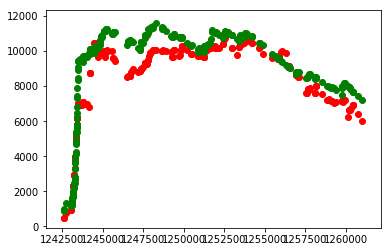

In [52]:
plt.scatter(plotX, ynew2, color='r')
plt.scatter(plotX, label, color='g')
plt.show()